# Анализ финансовых рядов.
Самой популярной криптовалютой является Bitcoin, стоимость которого уже превысила $15k. Однако, в мире существуют еще несколько тысяч альтернативных криптовалют, большая часть из которых ничего особенного из себя не представляют и даже динамика их цен совпадает с флагманским биткоином. 
- Задача найти криптовалюты, которые не будут попадать в кластер биткоина на разных временных промежутках

Установка библиотеки cryptocompare

In [2]:
import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm
import random

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import cryptocompare

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_73634/1836415664.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/Users/alsukurmakaeva/miniconda3/envs/dqual_alpha_nlp/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
name_tikers_all = cryptocompare.get_coin_list(format=True)

In [4]:
name_tikers_all

['BTCD',
 'CRAIG',
 'XBS',
 'XPY',
 'PRC',
 'YBC',
 'DANK',
 'GIVE',
 'KOBO',
 'DT',
 'CETI',
 'SUP',
 'XPD',
 'GEO',
 'CHASH',
 'NXTI',
 'WOLF',
 'XDP',
 '2015',
 '42',
 'AC',
 'ACOIN',
 'AERO',
 'ALF',
 'AEGIS',
 'AMERICANCOIN',
 'ALIEN',
 'ARCH',
 'AURORAC',
 'AXR',
 'BETACOIN',
 'BEAN',
 'BLU',
 'BOST',
 'BQC',
 'MOONC',
 'ZET',
 'SXC',
 'QTL',
 'ENRG',
 'QRK',
 'RIC',
 'DGC',
 'LIMX',
 'BTB',
 'CAIX',
 'BTMK',
 'BUK',
 'CACH',
 'CANN',
 'CAP',
 'CASH',
 'CATC',
 'CCN',
 'CINNI',
 'CXC',
 'CLAM',
 'CLR',
 'CMC',
 'CNC',
 'CNL',
 'COMM',
 'COOL',
 'CRACK',
 'CRYPT',
 'CSC',
 'DEM',
 'DIAM',
 'DRKC',
 'DSB',
 'DEVCOIN',
 'EFL',
 'ELC',
 'EMD',
 'EXCL',
 'EXE',
 'EZC',
 'FLAP',
 'FC2',
 'FFC',
 'FIBRE',
 'FRC',
 'FLT',
 'FRK',
 'FRAC',
 'FSTC',
 'GLOBAL',
 'GLX',
 'GLYPH',
 'GML',
 'GUE',
 'HAL',
 'HBN',
 'HUC',
 'HVC',
 'HYP',
 'ICB',
 'IFC',
 'IXC',
 'JBS',
 'JKC',
 'JUDGE',
 'KDC',
 'KEYC',
 'LK7',
 'LKY',
 'LSD',
 'LTB',
 'LTCD',
 'LTCX',
 'LXC',
 'LYC',
 'MAX',
 'MEC',
 'MEDIT',


Посмотрим, какое количество торгующих тикеров есть 

In [5]:
len(name_tikers_all)

8425

Выберем 100 рандомных тикеров и убедимся в том, что BTC есть в этом списке. В случае, если нет, добавим самостоятельно.

In [6]:
name_tikers = random.sample(name_tikers_all, 100)

In [7]:
'BTC' in name_tikers

False

In [8]:
name_tikers.append('BTC')

Скачаем цены закрытия для имеющихся криптовалют по трем разным временным промежуткам:
- За последние 3 дня с часовой частотой 

In [9]:
data = pd.DataFrame()

In [10]:
first_l = [np.nan for i in range(60)]

for tiker in name_tikers:
    data[tiker] = first_l

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_73634/3540488009.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[tiker] = first_l


In [29]:
bad_tikers = []
for tiker in tqdm(name_tikers):
    print(tiker)
    crypto_data = cryptocompare.get_historical_price_hour(tiker, currency='USD', limit=3*24)
    try:
        for i in range(3*24):
            time.sleep(0.100)
            data[tiker][i] = crypto_data[i]['close']
    except Exception:
        bad_tikers.append(tiker) 
        continue

  0%|                                                   | 0/101 [00:00<?, ?it/s]

ALCE


  1%|▍                                          | 1/101 [00:00<00:42,  2.35it/s]

[ERROR] CCCAGG market does not exist for this coin pair (ALCE-USD)
METM


  2%|▊                                          | 2/101 [00:08<08:29,  5.15s/it]

MAN


  3%|█▎                                         | 3/101 [00:16<10:28,  6.41s/it]

APL


  4%|█▋                                         | 4/101 [00:24<11:22,  7.04s/it]

PRES


  5%|██▏                                        | 5/101 [00:25<07:25,  4.64s/it]

[ERROR] CCCAGG market does not exist for this coin pair (PRES-USD)
RYCN


  6%|██▌                                        | 6/101 [00:25<05:03,  3.19s/it]

[ERROR] CCCAGG market does not exist for this coin pair (RYCN-USD)
DAWGS


  7%|██▉                                        | 7/101 [00:25<03:34,  2.28s/it]

[ERROR] CCCAGG market does not exist for this coin pair (DAWGS-USD)
YFX


  8%|███▍                                       | 8/101 [00:26<02:36,  1.68s/it]

[ERROR] CCCAGG market does not exist for this coin pair (YFX-USD)
AAG


  9%|███▊                                       | 9/101 [00:26<01:59,  1.30s/it]

[ERROR] CCCAGG market does not exist for this coin pair (AAG-USD)
OF


 10%|████▏                                     | 10/101 [00:34<05:04,  3.34s/it]

BUSDC


 11%|████▌                                     | 11/101 [00:42<07:07,  4.75s/it]

BLST


 12%|████▉                                     | 12/101 [00:43<05:03,  3.41s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BLST-USD)
INXT


 13%|█████▍                                    | 13/101 [00:51<07:02,  4.80s/it]

UHP


 14%|█████▊                                    | 14/101 [00:51<05:04,  3.50s/it]

[ERROR] CCCAGG market does not exist for this coin pair (UHP-USD)
BLOCKS


 15%|██████▏                                   | 15/101 [00:51<03:38,  2.54s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BLOCKS-USD)
NPT


 16%|██████▋                                   | 16/101 [00:52<02:40,  1.89s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NPT-USD)
KUBOS


 17%|███████                                   | 17/101 [00:52<01:59,  1.43s/it]

[ERROR] CCCAGG market does not exist for this coin pair (KUBOS-USD)
NBOX


 18%|███████▍                                  | 18/101 [00:52<01:31,  1.11s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NBOX-USD)
BITM


 19%|███████▉                                  | 19/101 [01:00<04:15,  3.11s/it]

SWACH


 20%|████████▎                                 | 20/101 [01:08<06:07,  4.54s/it]

1SG


 21%|████████▋                                 | 21/101 [01:16<07:22,  5.54s/it]

WAIF


 22%|█████████▏                                | 22/101 [01:16<05:13,  3.97s/it]

[ERROR] CCCAGG market does not exist for this coin pair (WAIF-USD)
U8D


 23%|█████████▌                                | 23/101 [01:17<03:45,  2.89s/it]

[ERROR] CCCAGG market does not exist for this coin pair (U8D-USD)
MAHA


 24%|█████████▉                                | 24/101 [01:17<02:45,  2.14s/it]

[ERROR] CCCAGG market does not exist for this coin pair (MAHA-USD)
SPRT


 25%|██████████▍                               | 25/101 [01:17<02:02,  1.62s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SPRT-USD)
DEBT


 26%|██████████▊                               | 26/101 [01:25<04:22,  3.50s/it]

MINA


 27%|███████████▏                              | 27/101 [01:33<05:54,  4.80s/it]

BLK


 28%|███████████▋                              | 28/101 [01:41<06:56,  5.70s/it]

LHC


 29%|████████████                              | 29/101 [01:49<07:36,  6.35s/it]

DAC


 30%|████████████▍                             | 30/101 [01:57<08:02,  6.80s/it]

NRFB


 31%|████████████▉                             | 31/101 [01:57<05:41,  4.88s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NRFB-USD)
BLZ


 32%|█████████████▎                            | 32/101 [02:05<06:40,  5.81s/it]

SNY


 33%|█████████████▋                            | 33/101 [02:05<04:43,  4.17s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SNY-USD)
CZZ


 34%|██████████████▏                           | 34/101 [02:06<03:22,  3.02s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CZZ-USD)
LBLOCK


 35%|██████████████▌                           | 35/101 [02:06<02:26,  2.22s/it]

[ERROR] CCCAGG market does not exist for this coin pair (LBLOCK-USD)
BP


 36%|██████████████▉                           | 36/101 [02:06<01:48,  1.67s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BP-USD)
DMT


 37%|███████████████▍                          | 37/101 [02:14<03:46,  3.55s/it]

CLEG


 38%|███████████████▊                          | 38/101 [02:15<02:43,  2.59s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CLEG-USD)
BSPM


 39%|████████████████▏                         | 39/101 [02:23<04:21,  4.22s/it]

TSX


 40%|████████████████▋                         | 40/101 [02:23<03:07,  3.07s/it]

[ERROR] CCCAGG market does not exist for this coin pair (TSX-USD)
PROOF


 41%|█████████████████                         | 41/101 [02:24<02:15,  2.26s/it]

[ERROR] CCCAGG market does not exist for this coin pair (PROOF-USD)
GM


 42%|█████████████████▍                        | 42/101 [02:24<01:39,  1.69s/it]

[ERROR] CCCAGG market does not exist for this coin pair (GM-USD)
EDG


 43%|█████████████████▉                        | 43/101 [02:32<03:26,  3.56s/it]

MOOO


 44%|██████████████████▎                       | 44/101 [02:32<02:28,  2.61s/it]

[ERROR] CCCAGG market does not exist for this coin pair (MOOO-USD)
TIKTOKEN


 45%|██████████████████▋                       | 45/101 [02:33<01:48,  1.93s/it]

[ERROR] CCCAGG market does not exist for this coin pair (TIKTOKEN-USD)
KRUGERCOIN


 46%|███████████████████▏                      | 46/101 [02:33<01:20,  1.46s/it]

[ERROR] CCCAGG market does not exist for this coin pair (KRUGERCOIN-USD)
CRE


 47%|███████████████████▌                      | 47/101 [02:33<01:02,  1.16s/it]

[ERROR] CCCAGG market does not exist for this coin pair (CRE-USD)
QRX


 48%|███████████████████▉                      | 48/101 [02:34<00:47,  1.10it/s]

[ERROR] CCCAGG market does not exist for this coin pair (QRX-USD)
BLS


 49%|████████████████████▍                     | 49/101 [02:34<00:38,  1.36it/s]

[ERROR] CCCAGG market does not exist for this coin pair (BLS-USD)
LPK


 50%|████████████████████▊                     | 50/101 [02:42<02:27,  2.89s/it]

MCAP


 50%|█████████████████████▏                    | 51/101 [02:50<03:39,  4.40s/it]

BLOCKSTAMP


 51%|█████████████████████▌                    | 52/101 [02:58<04:27,  5.45s/it]

MGX


 52%|██████████████████████                    | 53/101 [03:06<04:57,  6.19s/it]

NOAH


 53%|██████████████████████▍                   | 54/101 [03:14<05:16,  6.73s/it]

ZCC


 54%|██████████████████████▊                   | 55/101 [03:14<03:41,  4.82s/it]

[ERROR] CCCAGG market does not exist for this coin pair (ZCC-USD)
QISWAP


 55%|███████████████████████▎                  | 56/101 [03:14<02:37,  3.51s/it]

[ERROR] CCCAGG market does not exist for this coin pair (QISWAP-USD)
INST


 56%|███████████████████████▋                  | 57/101 [03:22<03:32,  4.82s/it]

JEM


 57%|████████████████████████                  | 58/101 [03:23<02:30,  3.49s/it]

[ERROR] CCCAGG market does not exist for this coin pair (JEM-USD)
WOLVERINU


 58%|████████████████████████▌                 | 59/101 [03:23<01:47,  2.55s/it]

[ERROR] CCCAGG market does not exist for this coin pair (WOLVERINU-USD)
SALT


 59%|████████████████████████▉                 | 60/101 [03:31<02:49,  4.14s/it]

FRECNX


 60%|█████████████████████████▎                | 61/101 [03:39<03:31,  5.28s/it]

RIMBIT


 61%|█████████████████████████▊                | 62/101 [03:39<02:28,  3.80s/it]

[ERROR] CCCAGG market does not exist for this coin pair (RIMBIT-USD)
RVO


 62%|██████████████████████████▏               | 63/101 [03:40<01:45,  2.77s/it]

[ERROR] CCCAGG market does not exist for this coin pair (RVO-USD)
JTX


 63%|██████████████████████████▌               | 64/101 [03:40<01:15,  2.04s/it]

[ERROR] CCCAGG market does not exist for this coin pair (JTX-USD)
VIC


 64%|███████████████████████████               | 65/101 [03:48<02:16,  3.79s/it]

TOKC


 65%|███████████████████████████▍              | 66/101 [03:56<02:55,  5.01s/it]

AEN


 66%|███████████████████████████▊              | 67/101 [04:04<03:20,  5.89s/it]

NOIZ


 67%|████████████████████████████▎             | 68/101 [04:11<03:33,  6.48s/it]

AFFC


 68%|████████████████████████████▋             | 69/101 [04:19<03:41,  6.93s/it]

RAPDOGE


 69%|█████████████████████████████             | 70/101 [04:20<02:33,  4.96s/it]

[ERROR] CCCAGG market does not exist for this coin pair (RAPDOGE-USD)
KWS


 70%|█████████████████████████████▌            | 71/101 [04:20<01:47,  3.57s/it]

[ERROR] CCCAGG market does not exist for this coin pair (KWS-USD)
SNE


 71%|█████████████████████████████▉            | 72/101 [04:21<01:16,  2.64s/it]

[ERROR] CCCAGG market does not exist for this coin pair (SNE-USD)
BTSG


 72%|██████████████████████████████▎           | 73/101 [04:21<00:54,  1.95s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BTSG-USD)
BIC


 73%|██████████████████████████████▊           | 74/101 [04:21<00:39,  1.47s/it]

[ERROR] CCCAGG market does not exist for this coin pair (BIC-USD)
QVT


 74%|███████████████████████████████▏          | 75/101 [04:29<01:28,  3.40s/it]

METACAT


 75%|███████████████████████████████▌          | 76/101 [04:30<01:02,  2.49s/it]

[ERROR] CCCAGG market does not exist for this coin pair (METACAT-USD)
CLOAK


 76%|████████████████████████████████          | 77/101 [04:37<01:38,  4.10s/it]

STARC


 77%|████████████████████████████████▍         | 78/101 [04:38<01:08,  2.98s/it]

[ERROR] CCCAGG market does not exist for this coin pair (STARC-USD)
42


 78%|████████████████████████████████▊         | 79/101 [04:38<00:48,  2.20s/it]

[ERROR] CCCAGG market does not exist for this coin pair (42-USD)
STAX


 79%|█████████████████████████████████▎        | 80/101 [04:39<00:34,  1.66s/it]

[ERROR] CCCAGG market does not exist for this coin pair (STAX-USD)
ECH


 80%|█████████████████████████████████▋        | 81/101 [04:46<01:10,  3.52s/it]

YOCO


 81%|██████████████████████████████████        | 82/101 [04:47<00:48,  2.56s/it]

[ERROR] CCCAGG market does not exist for this coin pair (YOCO-USD)
LQDN


 82%|██████████████████████████████████▌       | 83/101 [04:55<01:15,  4.18s/it]

MF1


 83%|██████████████████████████████████▉       | 84/101 [04:55<00:51,  3.04s/it]

[ERROR] CCCAGG market does not exist for this coin pair (MF1-USD)
BCPT


 84%|███████████████████████████████████▎      | 85/101 [05:03<01:12,  4.52s/it]

BON


 85%|███████████████████████████████████▊      | 86/101 [05:11<01:23,  5.54s/it]

GAIAPLATFORM


 86%|████████████████████████████████████▏     | 87/101 [05:11<00:56,  4.02s/it]

[ERROR] CCCAGG market does not exist for this coin pair (GAIAPLATFORM-USD)
HBC


 87%|████████████████████████████████████▌     | 88/101 [05:12<00:37,  2.91s/it]

[ERROR] CCCAGG market does not exist for this coin pair (HBC-USD)
DRIVECRYPTO


 88%|█████████████████████████████████████     | 89/101 [05:12<00:25,  2.14s/it]

[ERROR] CCCAGG market does not exist for this coin pair (DRIVECRYPTO-USD)
BNP


 89%|█████████████████████████████████████▍    | 90/101 [05:20<00:42,  3.86s/it]

BKRW


 90%|█████████████████████████████████████▊    | 91/101 [05:28<00:50,  5.07s/it]

ARMR


 91%|██████████████████████████████████████▎   | 92/101 [05:36<00:53,  5.93s/it]

EMAR


 92%|██████████████████████████████████████▋   | 93/101 [05:36<00:34,  4.26s/it]

[ERROR] CCCAGG market does not exist for this coin pair (EMAR-USD)
AE


 93%|███████████████████████████████████████   | 94/101 [05:44<00:37,  5.37s/it]

1ECO


 94%|███████████████████████████████████████▌  | 95/101 [05:45<00:23,  3.94s/it]

[ERROR] CCCAGG market does not exist for this coin pair (1ECO-USD)
INSN


 95%|███████████████████████████████████████▉  | 96/101 [05:45<00:14,  2.91s/it]

[ERROR] CCCAGG market does not exist for this coin pair (INSN-USD)
OGO


 96%|████████████████████████████████████████▎ | 97/101 [05:54<00:18,  4.55s/it]

ZAT


 97%|████████████████████████████████████████▊ | 98/101 [06:02<00:16,  5.58s/it]

NDR


 98%|█████████████████████████████████████████▏| 99/101 [06:02<00:08,  4.03s/it]

[ERROR] CCCAGG market does not exist for this coin pair (NDR-USD)
MOVE


 99%|████████████████████████████████████████▌| 100/101 [06:10<00:05,  5.20s/it]

BTC


100%|█████████████████████████████████████████| 101/101 [06:18<00:00,  3.75s/it]


In [30]:
data

ALCE      METM      MAN       APL  PRES  RYCN  DAWGS  YFX  AAG        OF  \
0    NaN  0.001913  0.03929  0.000442   NaN   NaN    NaN  NaN  NaN  0.000461   
1    NaN  0.001916  0.03928  0.000434   NaN   NaN    NaN  NaN  NaN  0.000462   
2    NaN  0.001934  0.03963  0.000434   NaN   NaN    NaN  NaN  NaN  0.000464   
3    NaN  0.001934  0.03954  0.000434   NaN   NaN    NaN  NaN  NaN  0.000465   
4    NaN  0.001924  0.03939  0.000429   NaN   NaN    NaN  NaN  NaN  0.000462   
5    NaN  0.001925  0.03963  0.000429   NaN   NaN    NaN  NaN  NaN  0.000462   
6    NaN  0.001929  0.04225  0.000429   NaN   NaN    NaN  NaN  NaN  0.000464   
7    NaN  0.001926  0.04154  0.000428   NaN   NaN    NaN  NaN  NaN  0.000463   
8    NaN  0.001927  0.04148  0.000428   NaN   NaN    NaN  NaN  NaN  0.000464   
9    NaN  0.001918  0.04168  0.000430   NaN   NaN    NaN  NaN  NaN  0.000462   
10   NaN  0.001918  0.04148  0.000430   NaN   NaN    NaN  NaN  NaN  0.000462   
11   NaN  0.001922  0.04112  0.000428   NaN   NaN    NaN  NaN  NaN  0.000463   
12   NaN  0.001915  0.04113  0.000425   NaN   NaN    NaN  NaN  NaN  0.000461   
13   NaN  0.001921  0.04051  0.000413   NaN   NaN    NaN  NaN  NaN  0.000462   
14   NaN  0.001925  0.04080  0.000422   NaN   NaN    NaN  NaN  NaN  0.000462   
15   NaN  0.001924  0.04088  0.000423   NaN   NaN    NaN  NaN  NaN  0.000462   
16   NaN  0.001922  0.04072  0.000418   NaN   NaN    NaN  NaN  NaN  0.000461   
17   NaN  0.001916  0.04048  0.000418   NaN   NaN    NaN  NaN  NaN  0.000459   
18   NaN  0.001920  0.04038  0.000419   NaN   NaN    NaN  NaN  NaN  0.000460   
19   NaN  0.001923  0.04014  0.000418   NaN   NaN    NaN  NaN  NaN  0.000460   
20   NaN  0.001919  0.03982  0.000431   NaN   NaN    NaN  NaN  NaN  0.000460   
21   NaN  0.001917  0.03994  0.000429   NaN   NaN    NaN  NaN  NaN  0.000460   
22   NaN  0.001917  0.03985  0.000429   NaN   NaN    NaN  NaN  NaN  0.000460   
23   NaN  0.001916  0.03983  0.000427   NaN   NaN    NaN  NaN  NaN  0.000460   
24   NaN  0.001918  0.03987  0.000425   NaN   NaN    NaN  NaN  NaN  0.000461   
25   NaN  0.001904  0.03974  0.000408   NaN   NaN    NaN  NaN  NaN  0.000460   
26   NaN  0.001902  0.03938  0.000405   NaN   NaN    NaN  NaN  NaN  0.000460   
27   NaN  0.001886  0.03900  0.000409   NaN   NaN    NaN  NaN  NaN  0.000458   
28   NaN  0.001890  0.03891  0.000412   NaN   NaN    NaN  NaN  NaN  0.000459   
29   NaN  0.001910  0.03925  0.000412   NaN   NaN    NaN  NaN  NaN  0.000463   
30   NaN  0.001914  0.03937  0.000407   NaN   NaN    NaN  NaN  NaN  0.000463   
31   NaN  0.001909  0.03916  0.000421   NaN   NaN    NaN  NaN  NaN  0.000462   
32   NaN  0.001910  0.03919  0.000408   NaN   NaN    NaN  NaN  NaN  0.000462   
33   NaN  0.001925  0.03960  0.000407   NaN   NaN    NaN  NaN  NaN  0.000465   
34   NaN  0.001924  0.03968  0.000435   NaN   NaN    NaN  NaN  NaN  0.000464   
35   NaN  0.001922  0.03995  0.000435   NaN   NaN    NaN  NaN  NaN  0.000464   
36   NaN  0.001919  0.03963  0.000434   NaN   NaN    NaN  NaN  NaN  0.000463   
37   NaN  0.001920  0.03833  0.000435   NaN   NaN    NaN  NaN  NaN  0.000463   
38   NaN  0.001920  0.03793  0.000421   NaN   NaN    NaN  NaN  NaN  0.000463   
39   NaN  0.001921  0.03792  0.000421   NaN   NaN    NaN  NaN  NaN  0.000463   
40   NaN  0.001926  0.03867  0.000421   NaN   NaN    NaN  NaN  NaN  0.000466   
41   NaN  0.001923  0.03946  0.000421   NaN   NaN    NaN  NaN  NaN  0.000465   
42   NaN  0.001925  0.03929  0.000449   NaN   NaN    NaN  NaN  NaN  0.000465   
43   NaN  0.001917  0.03865  0.000440   NaN   NaN    NaN  NaN  NaN  0.000463   
44   NaN  0.001922  0.03909  0.000441   NaN   NaN    NaN  NaN  NaN  0.000464   
45   NaN  0.001924  0.03887  0.000441   NaN   NaN    NaN  NaN  NaN  0.000464   
46   NaN  0.001926  0.03892  0.000441   NaN   NaN    NaN  NaN  NaN  0.000465   
47   NaN  0.001922  0.03913  0.000441   NaN   NaN    NaN  NaN  NaN  0.000464   
48   NaN  0.001929  0.03921  0.000440   NaN   NaN    NaN  NaN  NaN  0.000465   
49  

<AxesSubplot: >

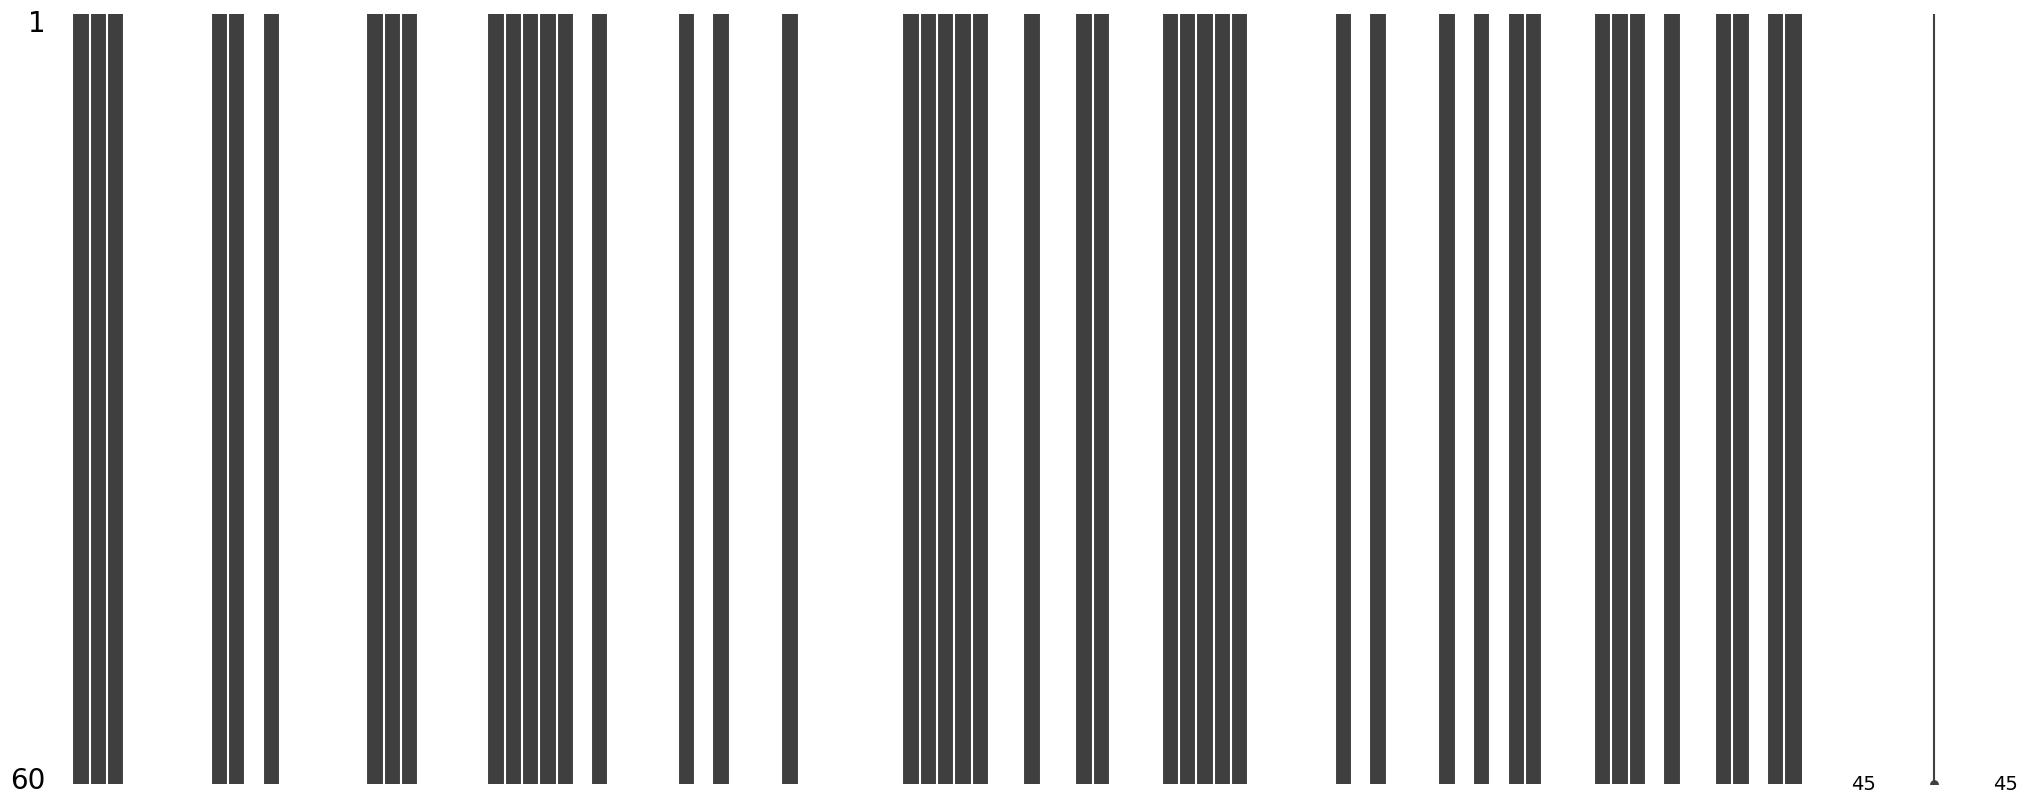

In [31]:
msno.matrix(data)

In [32]:
missing_values = ((data.isna().sum() / len(data)) * 100).sort_values(ascending=False)
missing_values

ALCE       100.0
YOCO       100.0
RAPDOGE    100.0
BP         100.0
CLEG       100.0
           ...  
FRECNX       0.0
VIC          0.0
TOKC         0.0
AEN          0.0
BTC          0.0
Length: 101, dtype: float64

In [33]:
len(bad_tikers)

56

In [34]:
for bad_tik in bad_tikers:
    data.drop(bad_tik, axis=1, inplace=True)

In [35]:
data

METM      MAN       APL        OF  BUSDC    INXT      BITM  SWACH  \
0   0.001913  0.03929  0.000442  0.000461  2.169  0.8030  0.000023    0.0   
1   0.001916  0.03928  0.000434  0.000462  2.171  0.8037  0.000023    0.0   
2   0.001934  0.03963  0.000434  0.000464  2.180  0.8069  0.000023    0.0   
3   0.001934  0.03954  0.000434  0.000465  2.183  0.8083  0.000023    0.0   
4   0.001924  0.03939  0.000429  0.000462  2.172  0.8041  0.000023    0.0   
5   0.001925  0.03963  0.000429  0.000462  2.173  0.8044  0.000023    0.0   
6   0.001929  0.04225  0.000429  0.000464  2.180  0.8070  0.000023    0.0   
7   0.001926  0.04154  0.000428  0.000463  2.178  0.8062  0.000023    0.0   
8   0.001927  0.04148  0.000428  0.000464  2.179  0.8068  0.000023    0.0   
9   0.001918  0.04168  0.000430  0.000462  2.170  0.8035  0.000023    0.0   
10  0.001918  0.04148  0.000430  0.000462  2.169  0.8031  0.000023    0.0   
11  0.001922  0.04112  0.000428  0.000463  2.174  0.8048  0.000023    0.0   
12  0.001915  0.04113  0.000425  0.000461  2.166  0.8020  0.000023    0.0   
13  0.001921  0.04051  0.000413  0.000462  2.170  0.8035  0.000023    0.0   
14  0.001925  0.04080  0.000422  0.000462  2.173  0.8046  0.000023    0.0   
15  0.001924  0.04088  0.000423  0.000462  2.172  0.8040  0.000023    0.0   
16  0.001922  0.04072  0.000418  0.000461  2.168  0.8025  0.000023    0.0   
17  0.001916  0.04048  0.000418  0.000459  2.156  0.7982  0.000023    0.0   
18  0.001920  0.04038  0.000419  0.000460  2.161  0.7999  0.000023    0.0   
19  0.001923  0.04014  0.000418  0.000460  2.163  0.8009  0.000023    0.0   
20  0.001919  0.03982  0.000431  0.000460  2.162  0.8005  0.000023    0.0   
21  0.001917  0.03994  0.000429  0.000460  2.163  0.8006  0.000023    0.0   
22  0.001917  0.03985  0.000429  0.000460  2.163  0.8007  0.000023    0.0   
23  0.001916  0.03983  0.000427  0.000460  2.164  0.8010  0.000023    0.0   
24  0.001918  0.03987  0.000425  0.000461  2.166  0.8020  0.000023    0.0   
25  0.001904  0.03974  0.000408  0.000460  2.160  0.7998  0.000023    0.0   
26  0.001902  0.03938  0.000405  0.000460  2.161  0.7999  0.000023    0.0   
27  0.001886  0.03900  0.000409  0.000458  2.155  0.7977  0.000023    0.0   
28  0.001890  0.03891  0.000412  0.000459  2.157  0.7985  0.000023    0.0   
29  0.001910  0.03925  0.000412  0.000463  2.174  0.8048  0.000023    0.0   
30  0.001914  0.03937  0.000407  0.000463  2.178  0.8062  0.000023    0.0   
31  0.001909  0.03916  0.000421  0.000462  2.172  0.8040  0.000023    0.0   
32  0.001910  0.03919  0.000408  0.000462  2.173  0.8044  0.000023    0.0   
33  0.001925  0.03960  0.000407  0.000465  2.184  0.8087  0.000023    0.0   
34  0.001924  0.03968  0.000435  0.000464  2.183  0.8080  0.000023    0.0   
35  0.001922  0.03995  0.000435  0.000464  2.180  0.8071  0.000023    0.0   
36  0.001919  0.03963  0.000434  0.000463  2.175  0.8052  0.000023    0.0   
37  0.001920  0.03833  0.000435  0.000463  2.178  0.8064  0.000023    0.0   
38  0.001920  0.03793  0.000421  0.000463  2.176  0.8058  0.000023    0.0   
39  0.001921  0.03792  0.000421  0.000463  2.177  0.8060  0.000023    0.0   
40  0.001926  0.03867  0.000421  0.000466  2.188  0.8101  0.000023    0.0   
41  0.001923  0.03946  0.000421  0.000465  2.184  0.8085  0.000023    0.0   
42  0.001925  0.03929  0.000449  0.000465  2.186  0.8092  0.000023    0.0   
43  0.001917  0.03865  0.000440  0.000463  2.178  0.8062  0.000023    0.0   
44  0.001922  0.03909  0.000441  0.000464  2.182  0.8077  0.000023    0.0   
45  0.001924  0.03887  0.000441  0.000464  2.181  0.8074  0.000023    0.0   
46  0.001926  0.03892  0.000441  0.000465  2.186  0.8091  0.000023    0.0   
47  0.001922  0.03913  0.000441  0.000464  2.179  0.8069  0.000023    0.0   
48  0.001929  0.03921  0.000440  0.000465  2.185  0.8088  0.000023    0.0   
49  0.001955  0.03932  0.000433  0.000469  2.207  0.8170  0.000023    0.0   
50  0.001960  0.03927  0.000426  0.000470  2.210  0.8182  0.000024    0.0   
51  

<AxesSubplot: >

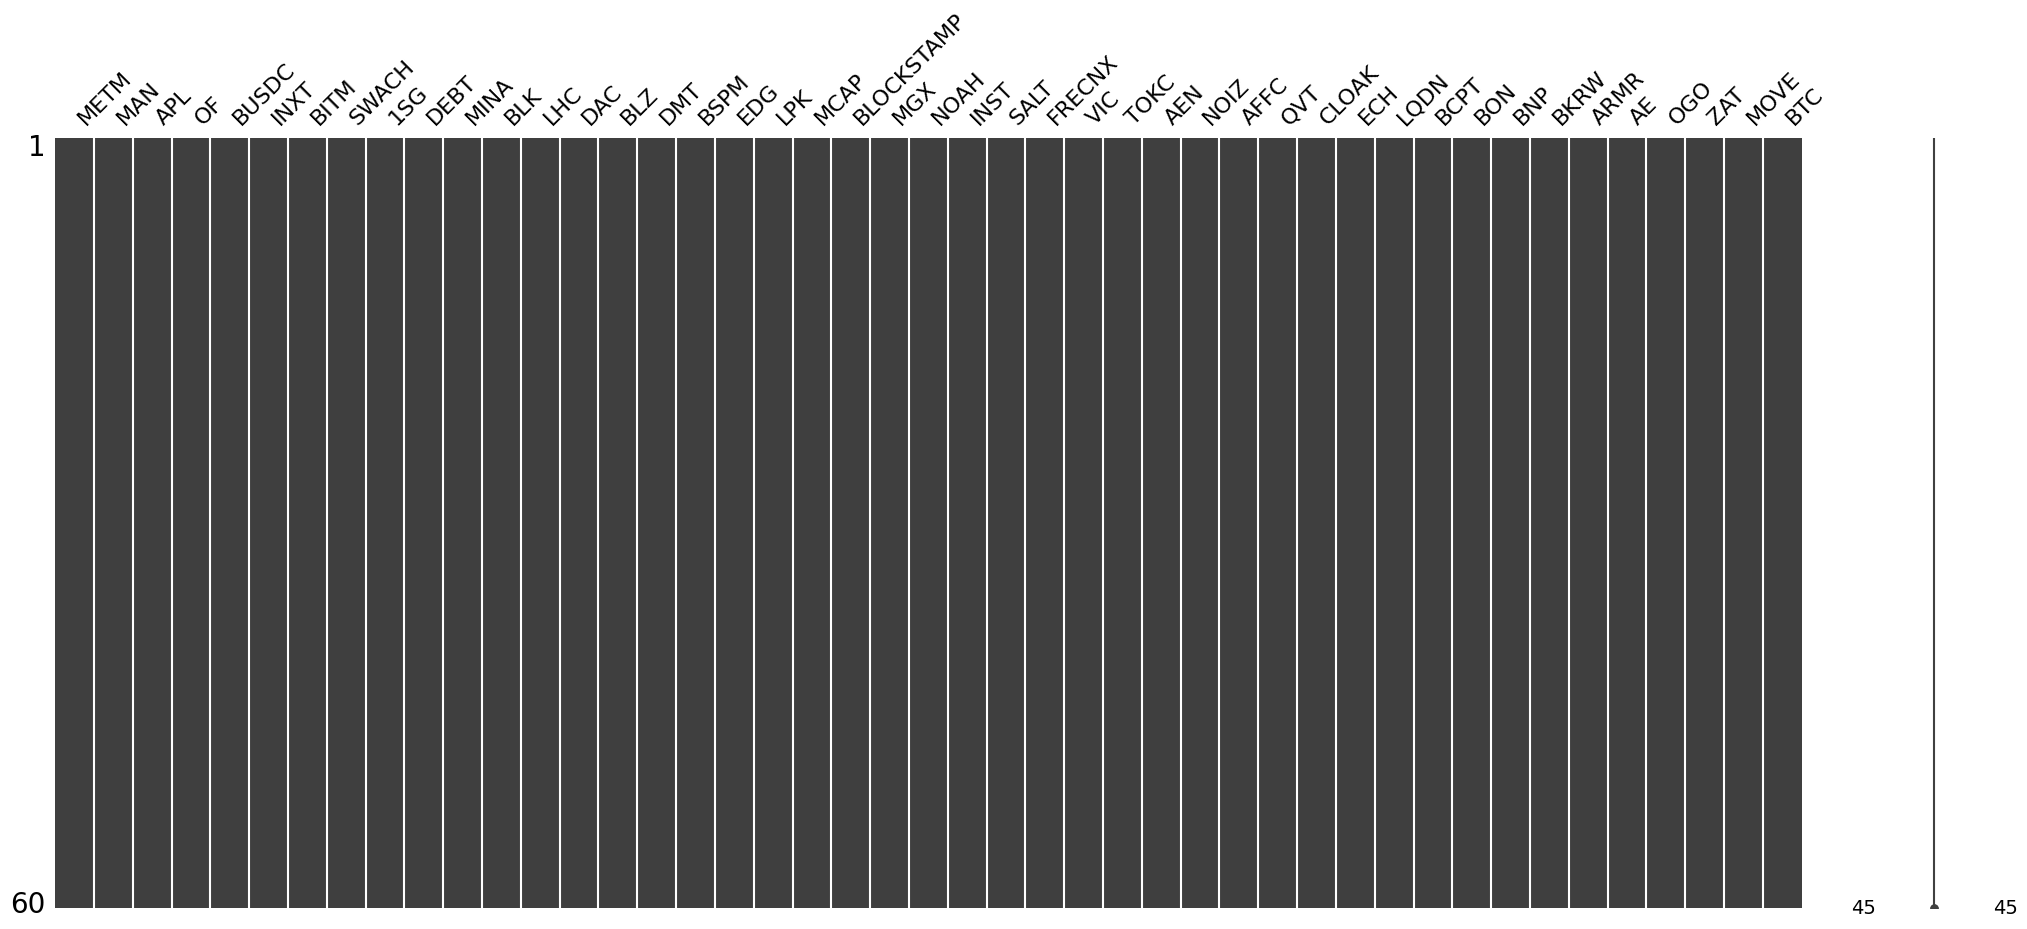

In [36]:
msno.matrix(data)

In [37]:
data.shape

(60, 45)

/var/folders/84/q1qfkkn11dn0bkqq_3fg56040000gn/T/ipykernel_73634/1234264003.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,5))


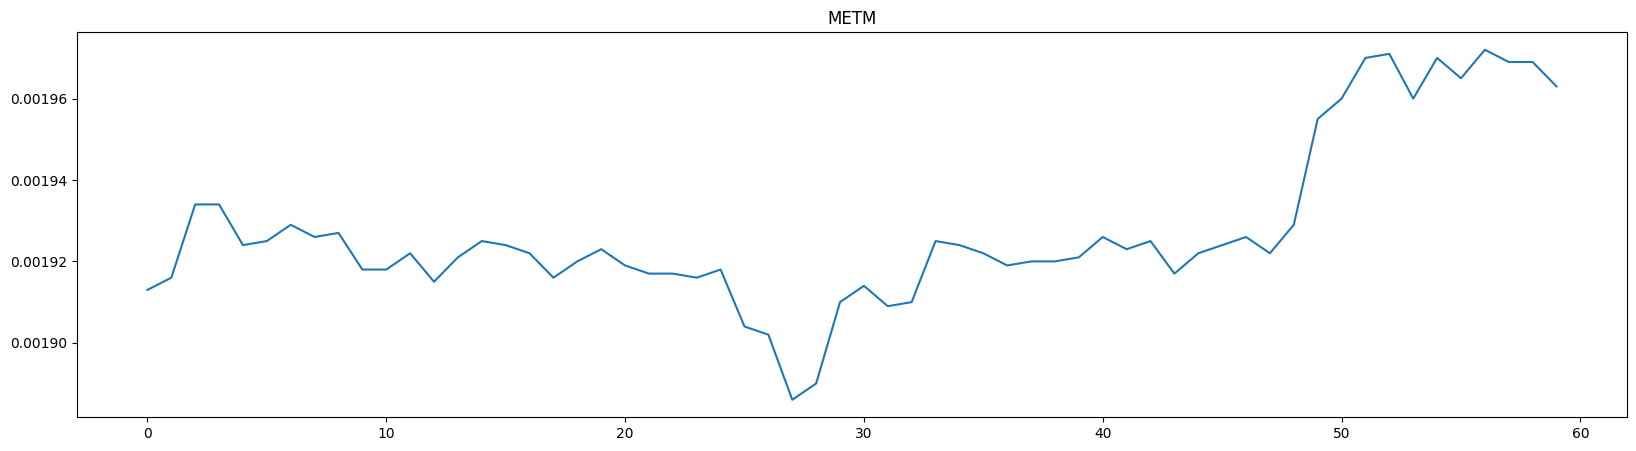

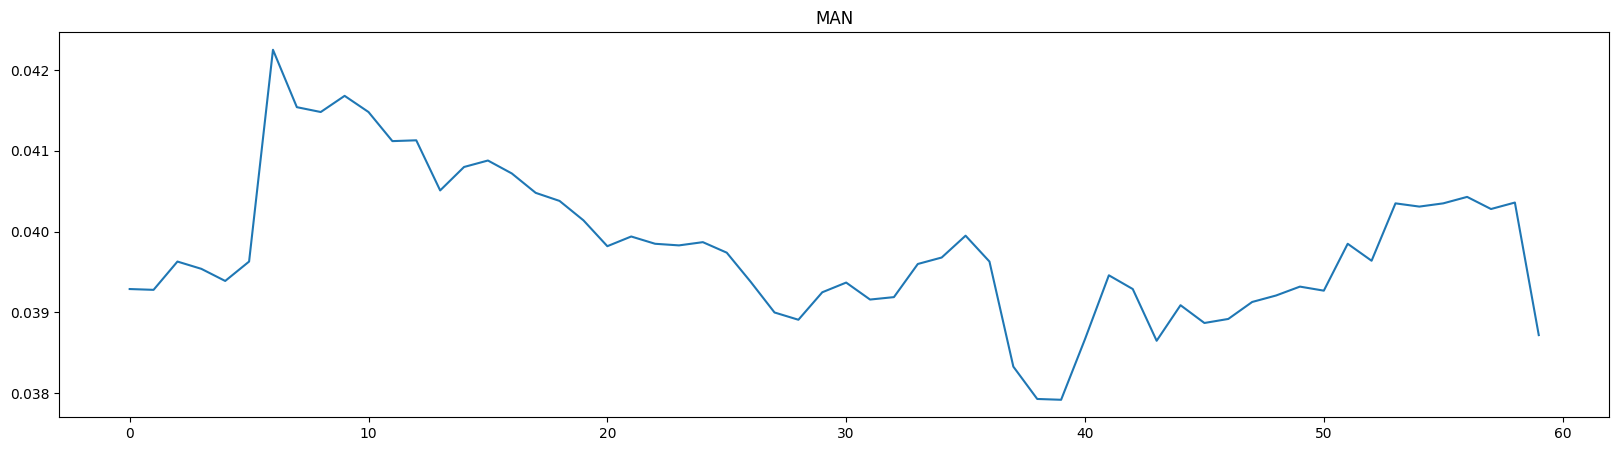

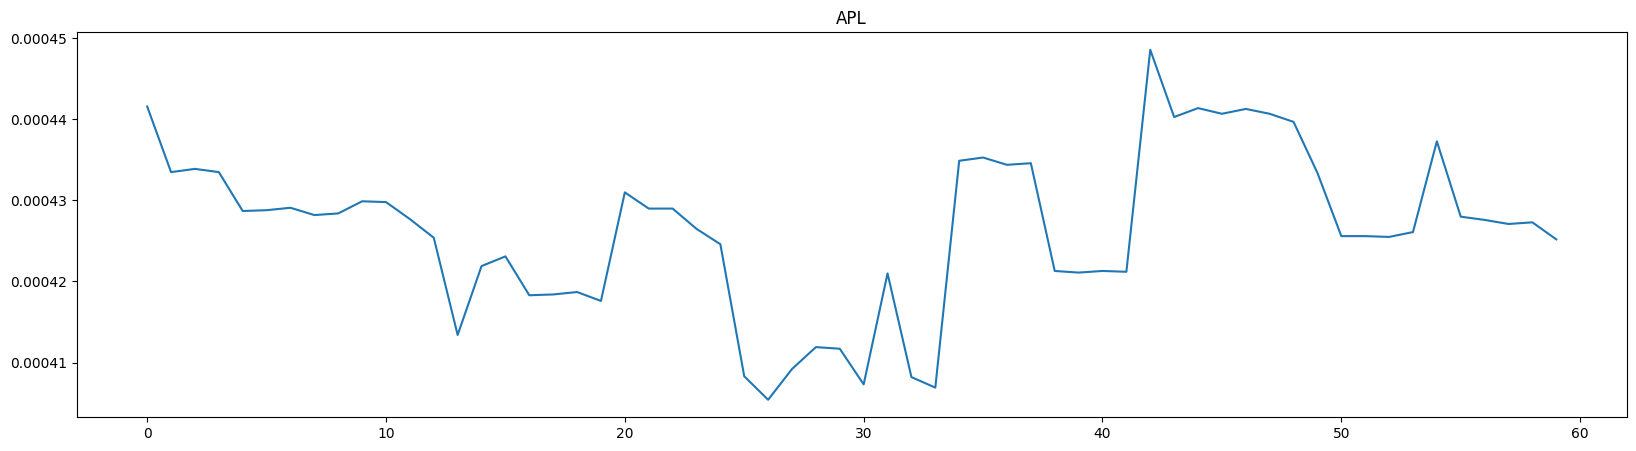

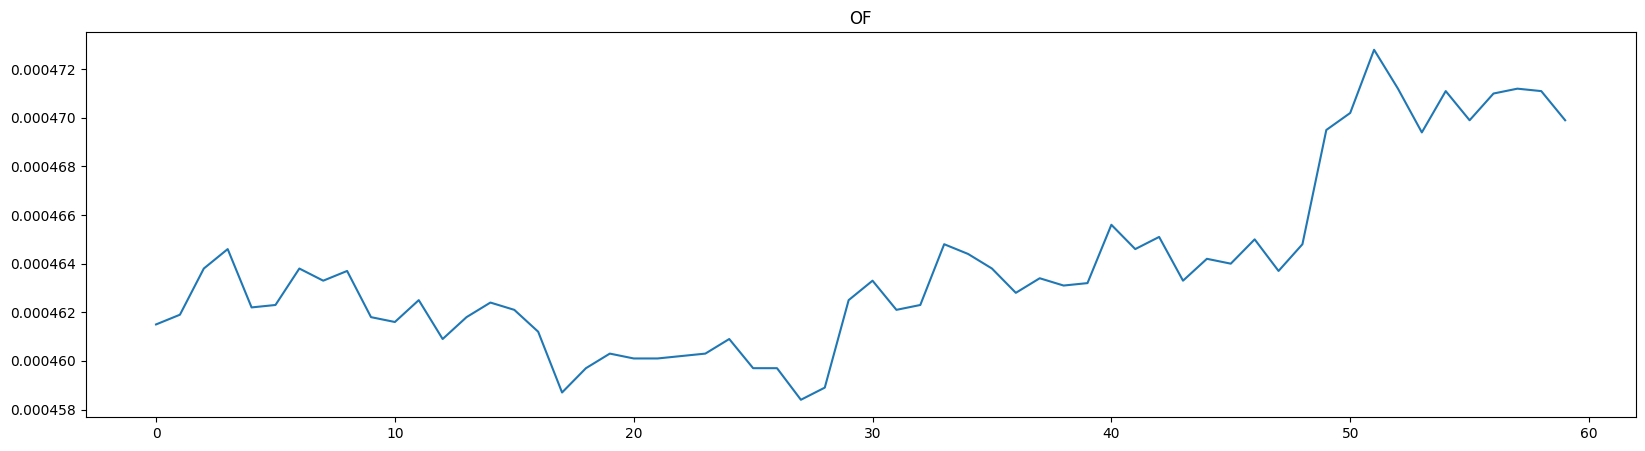

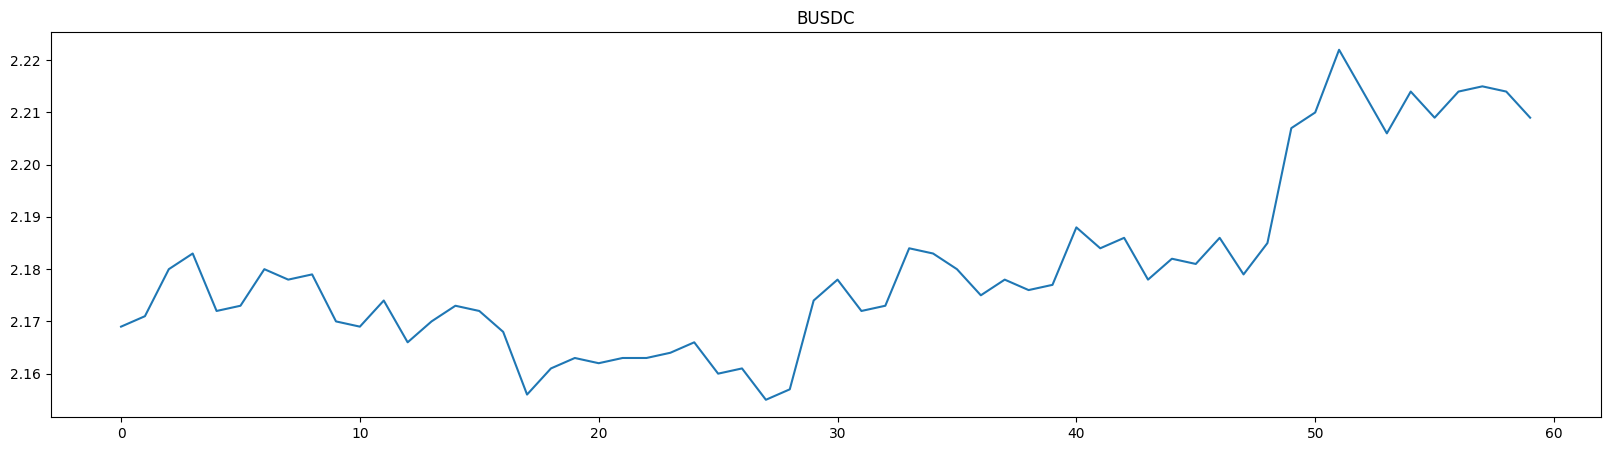

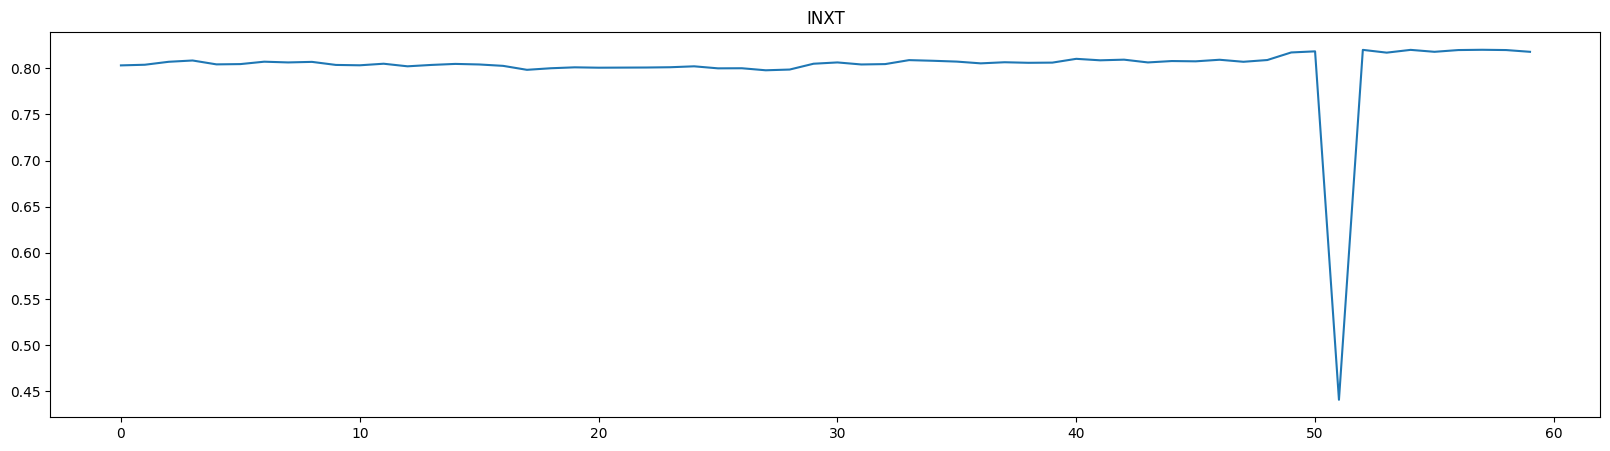

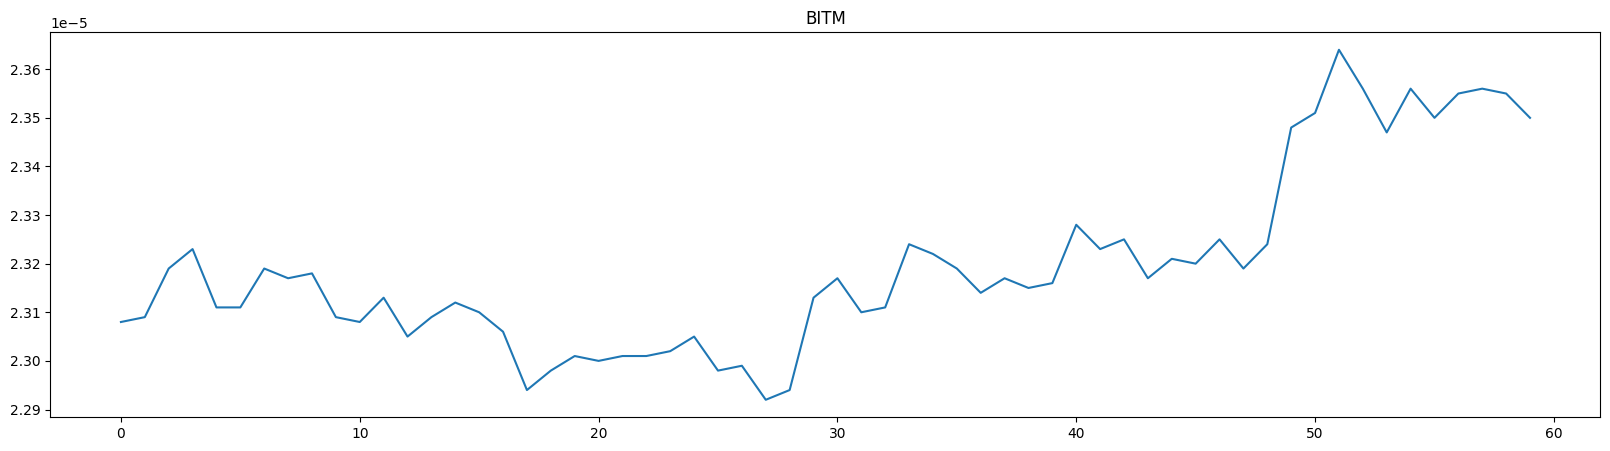

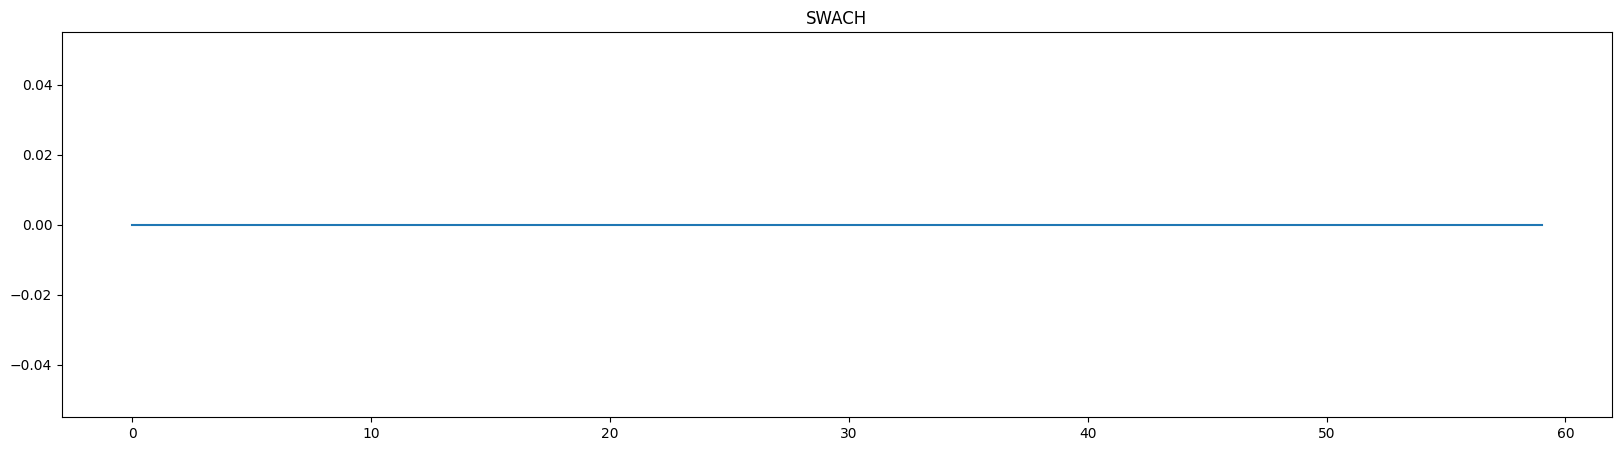

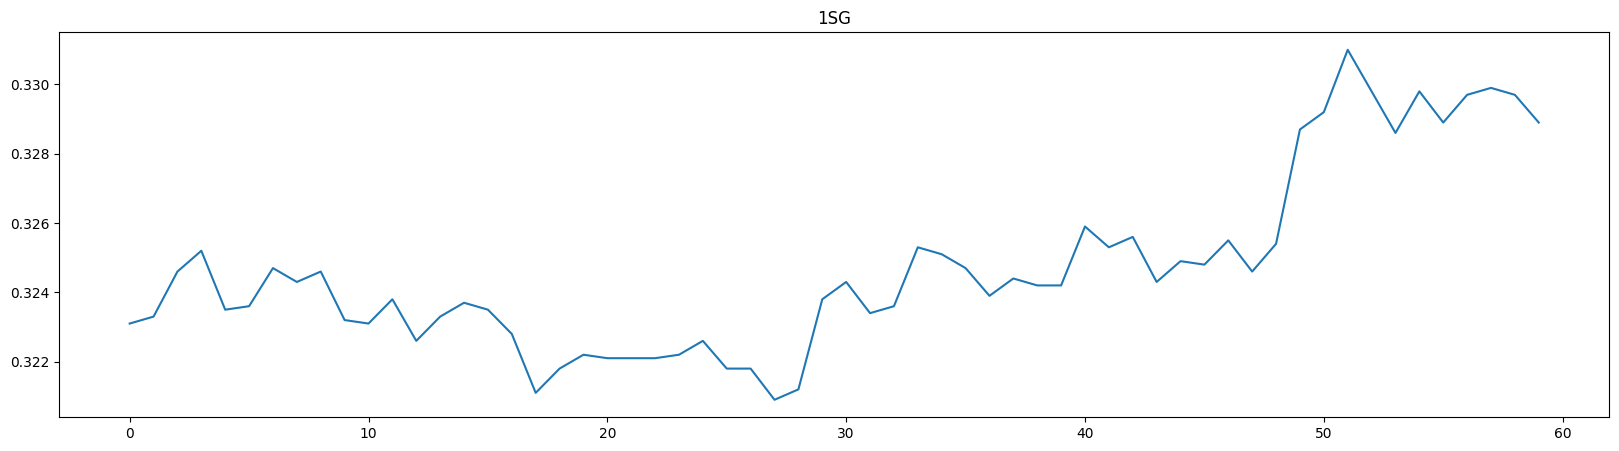

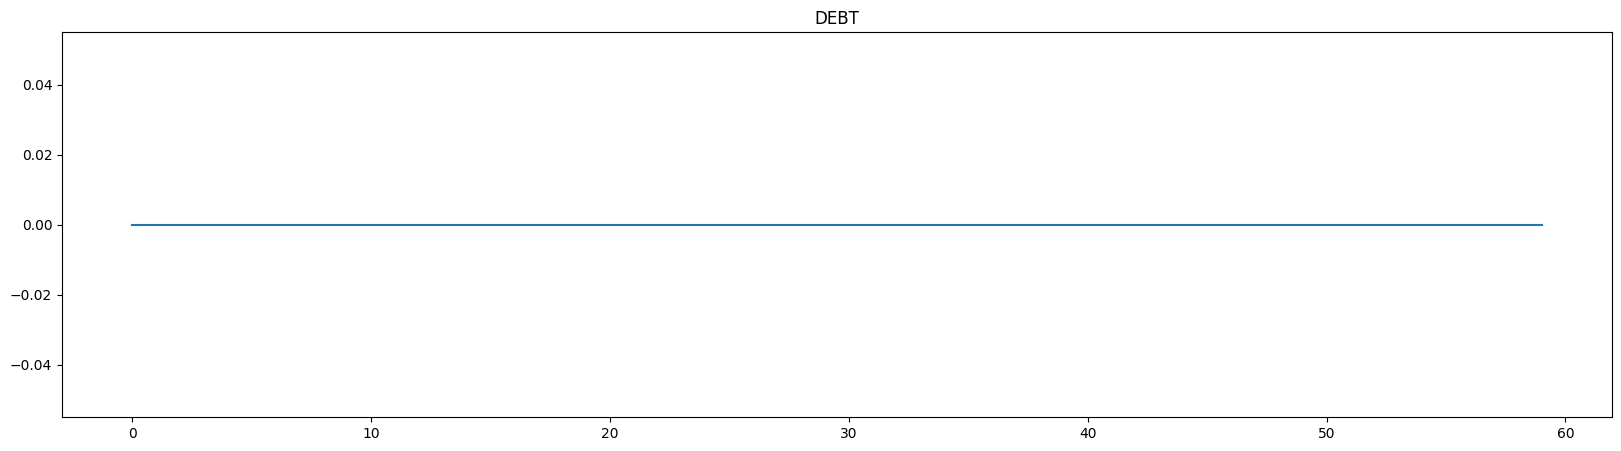

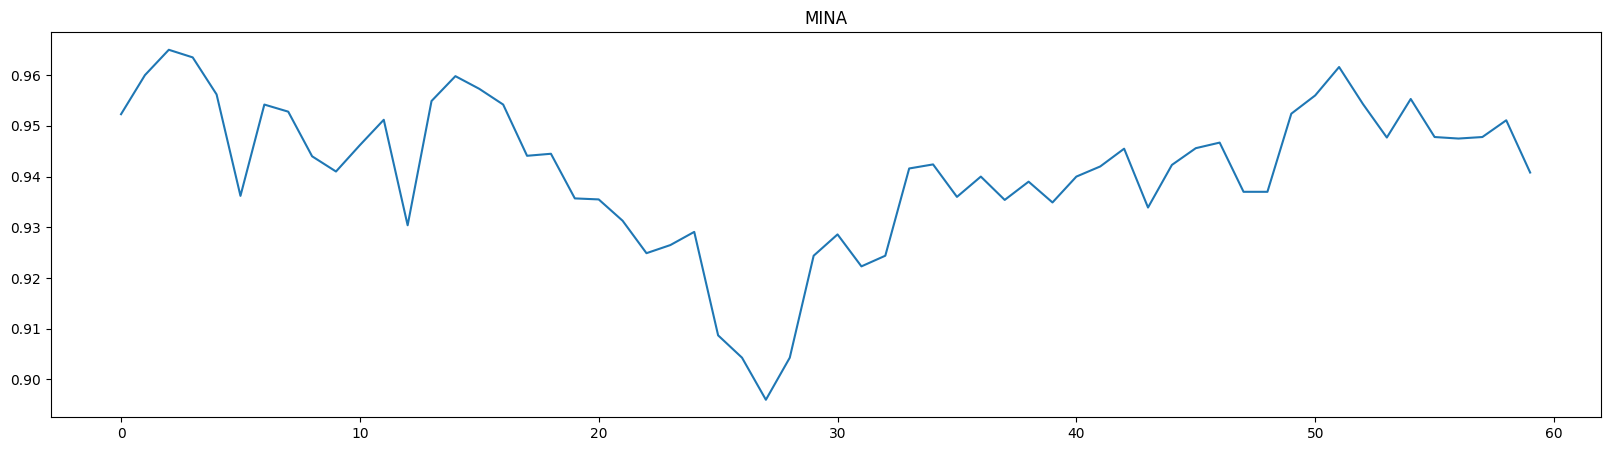

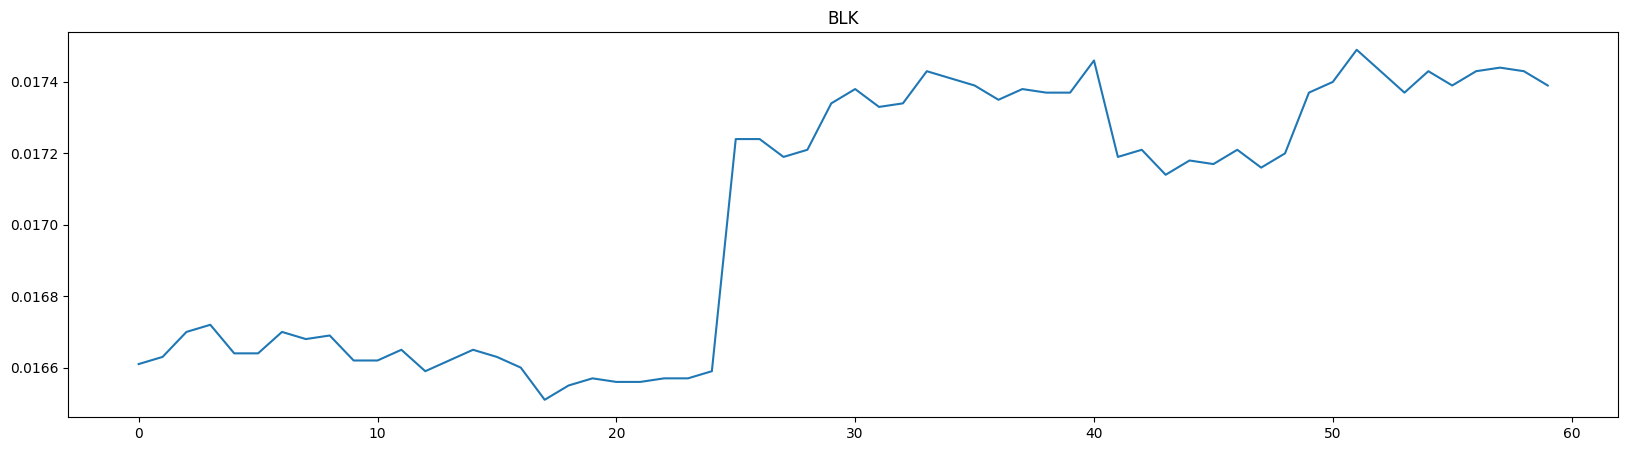

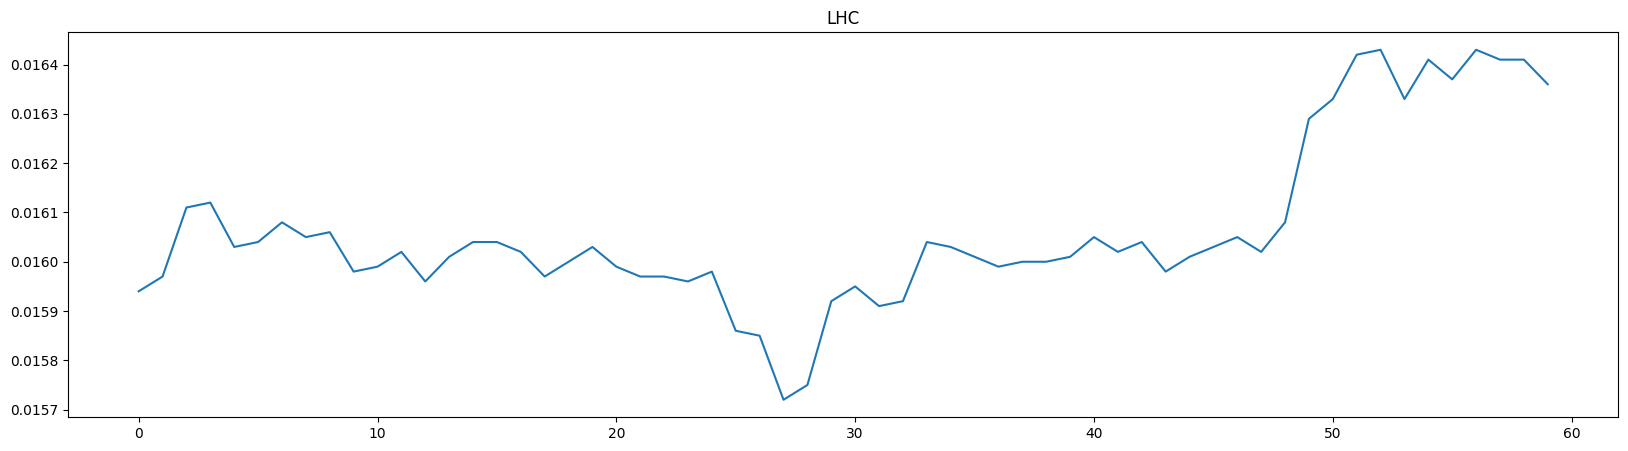

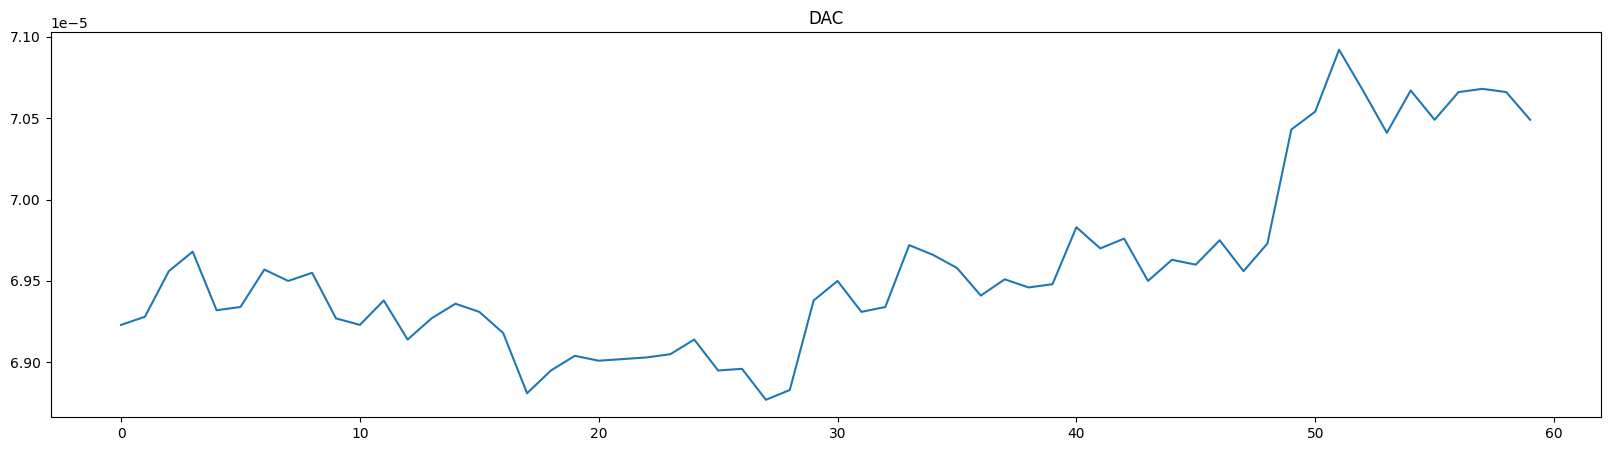

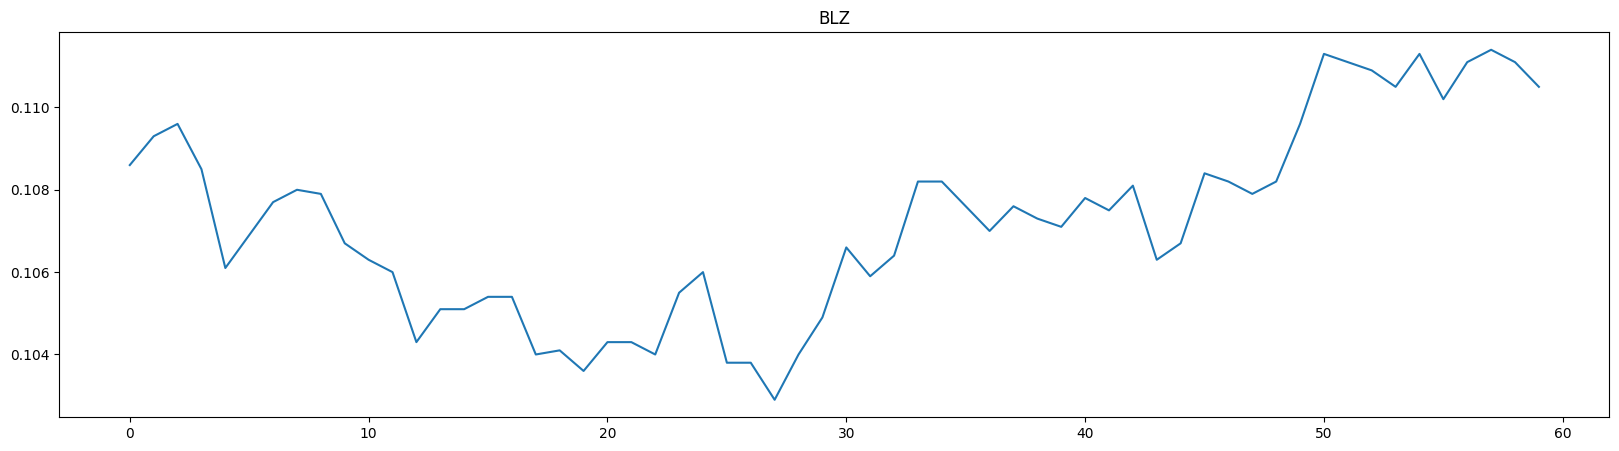

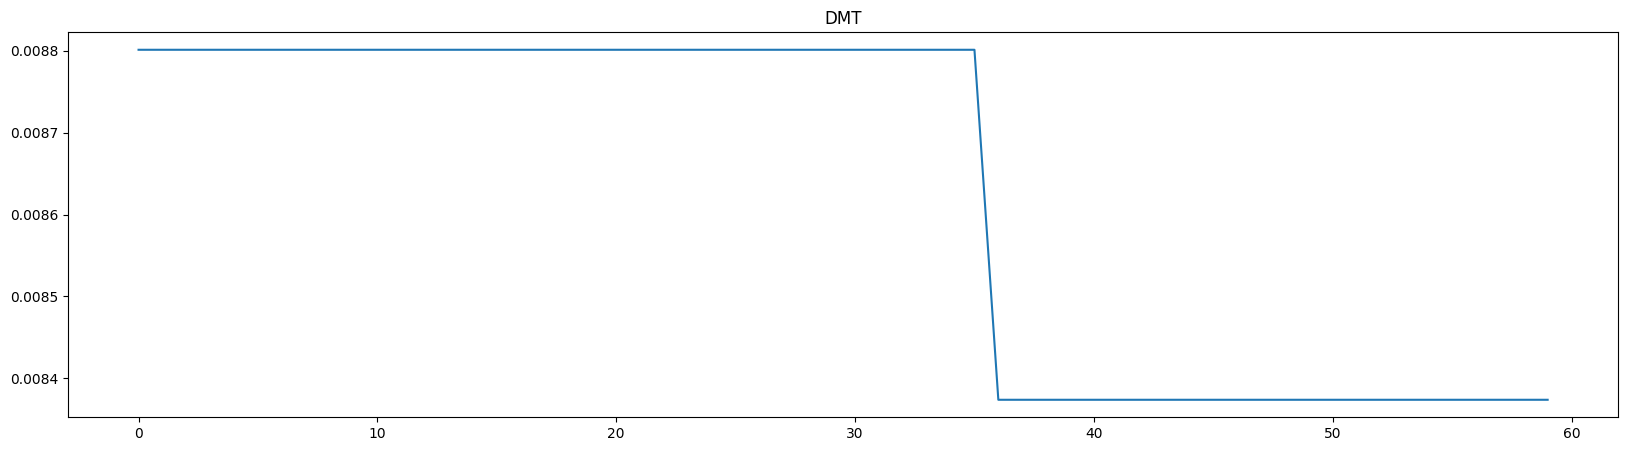

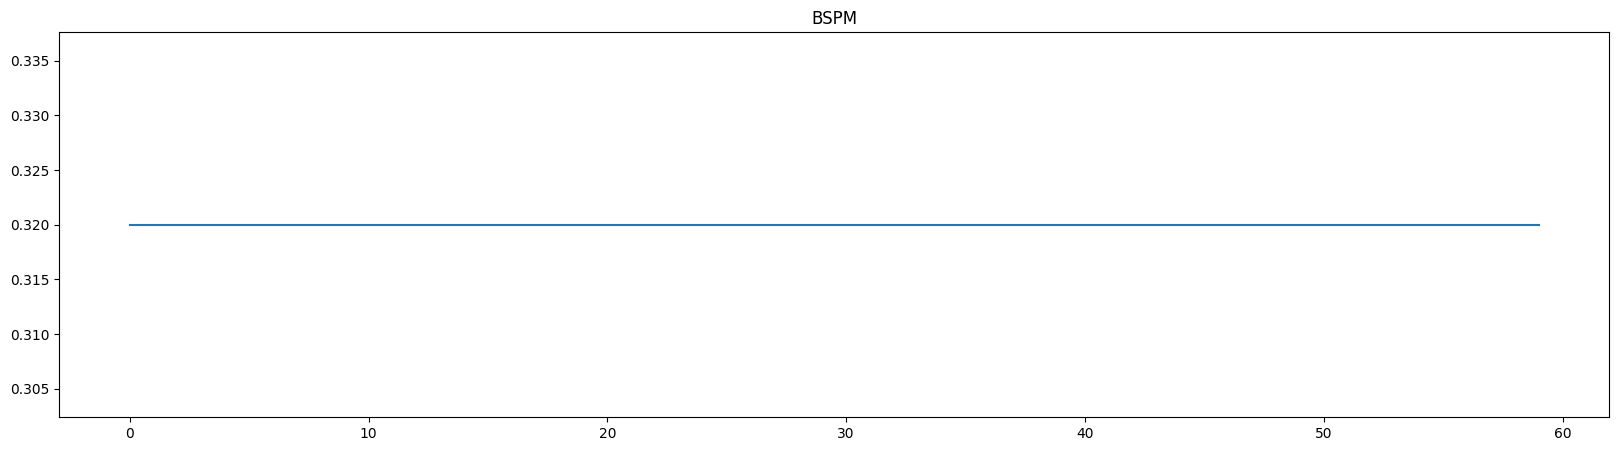

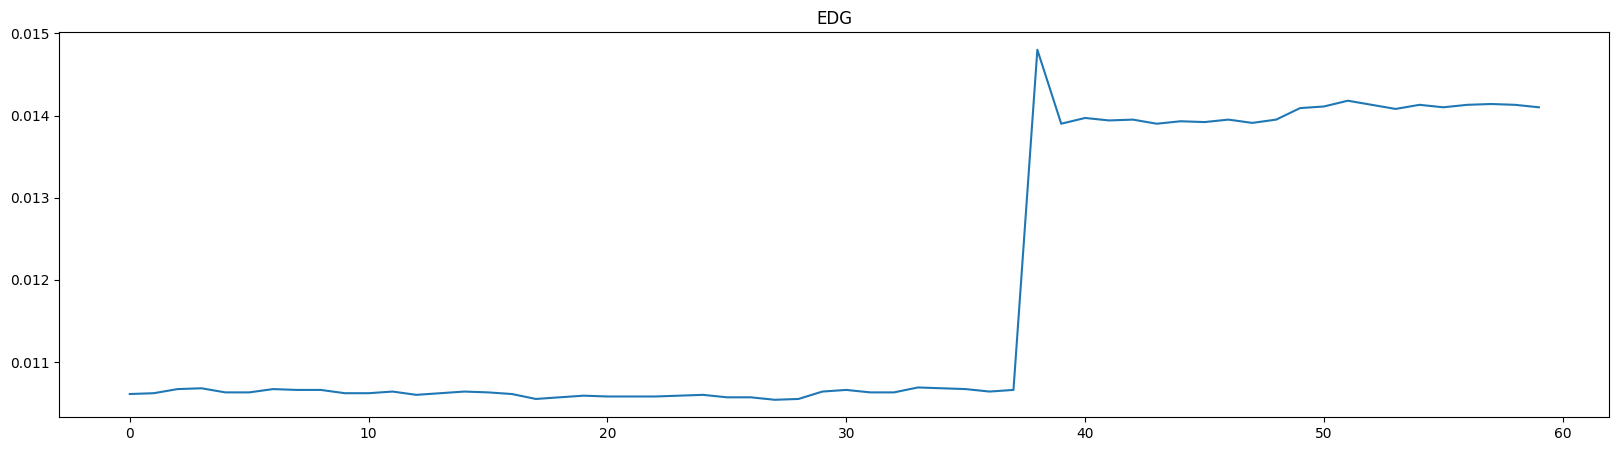

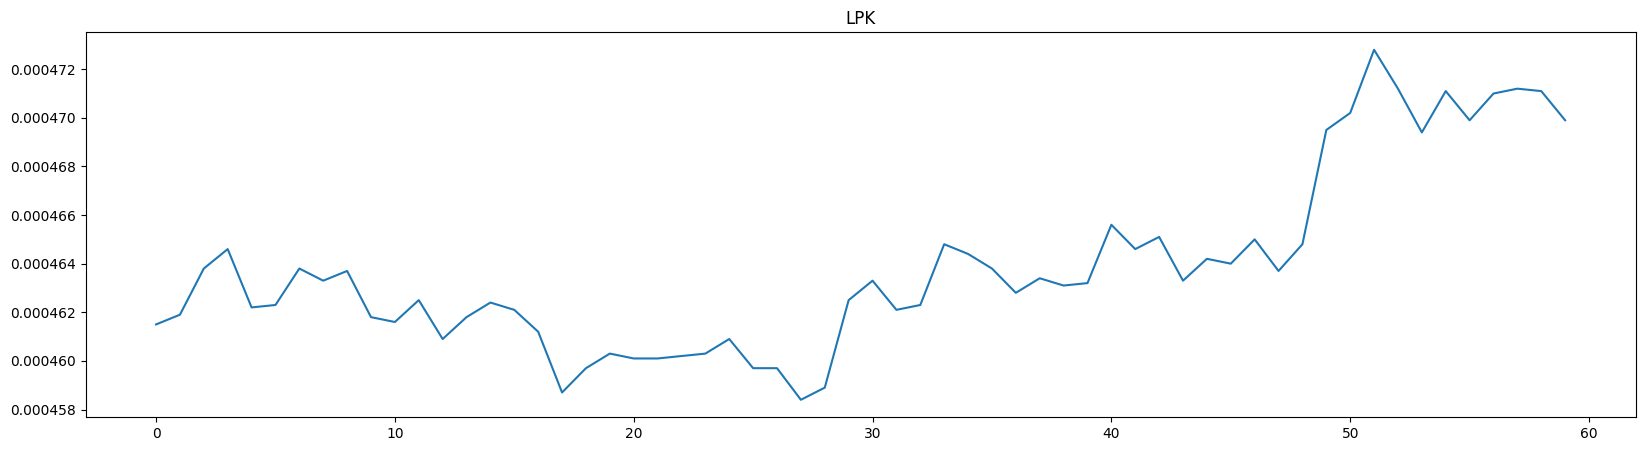

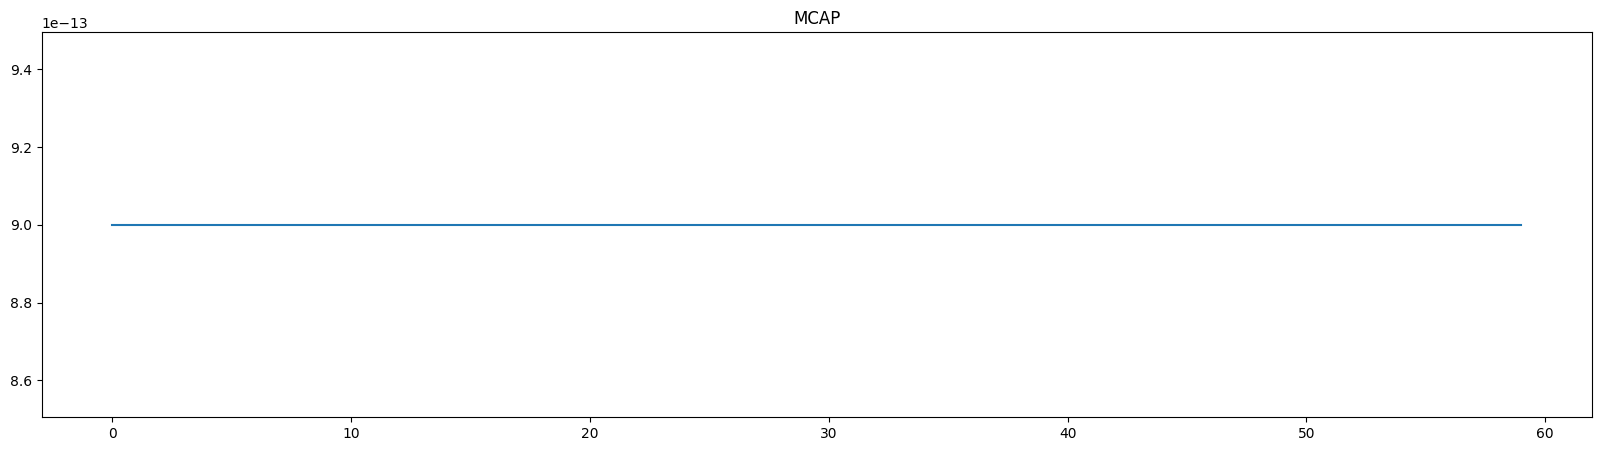

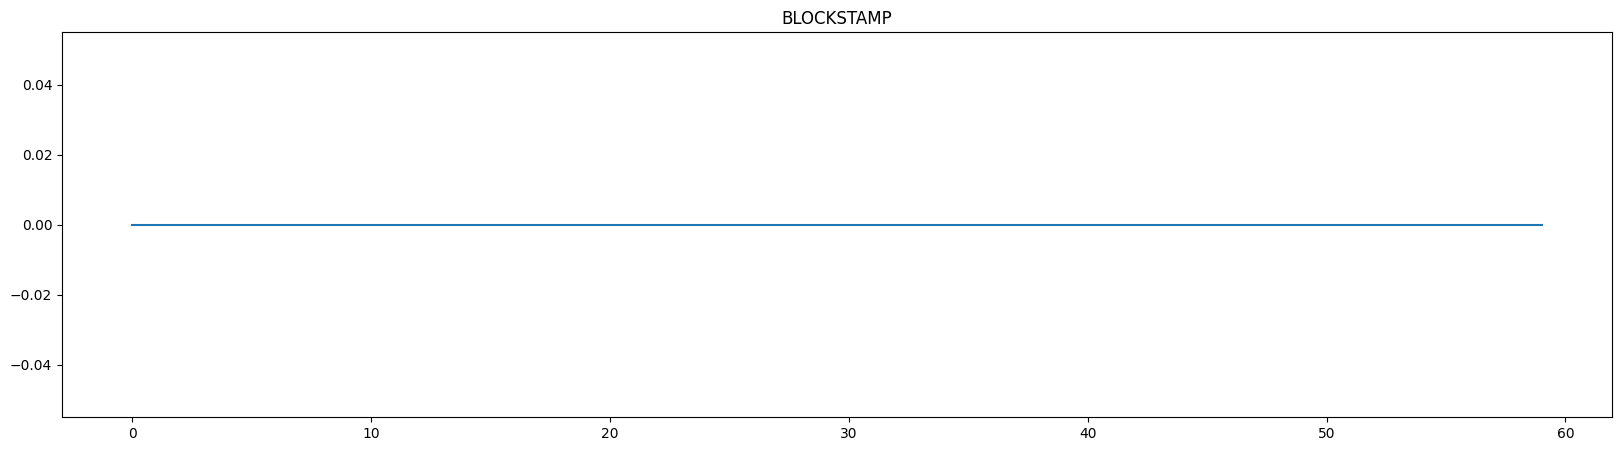

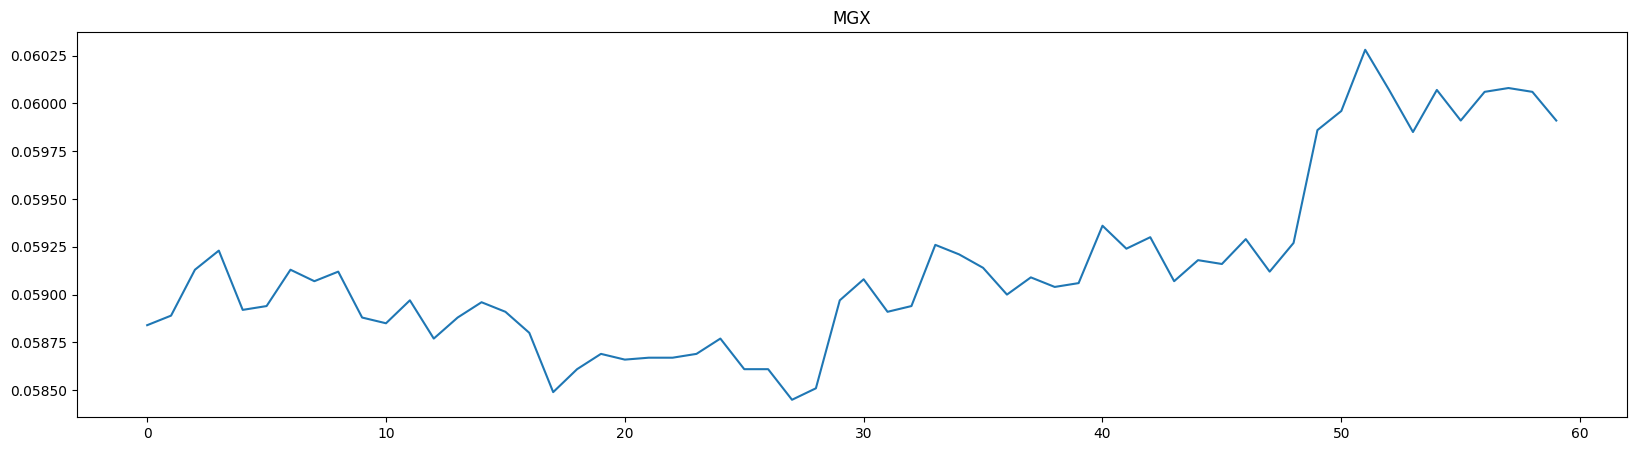

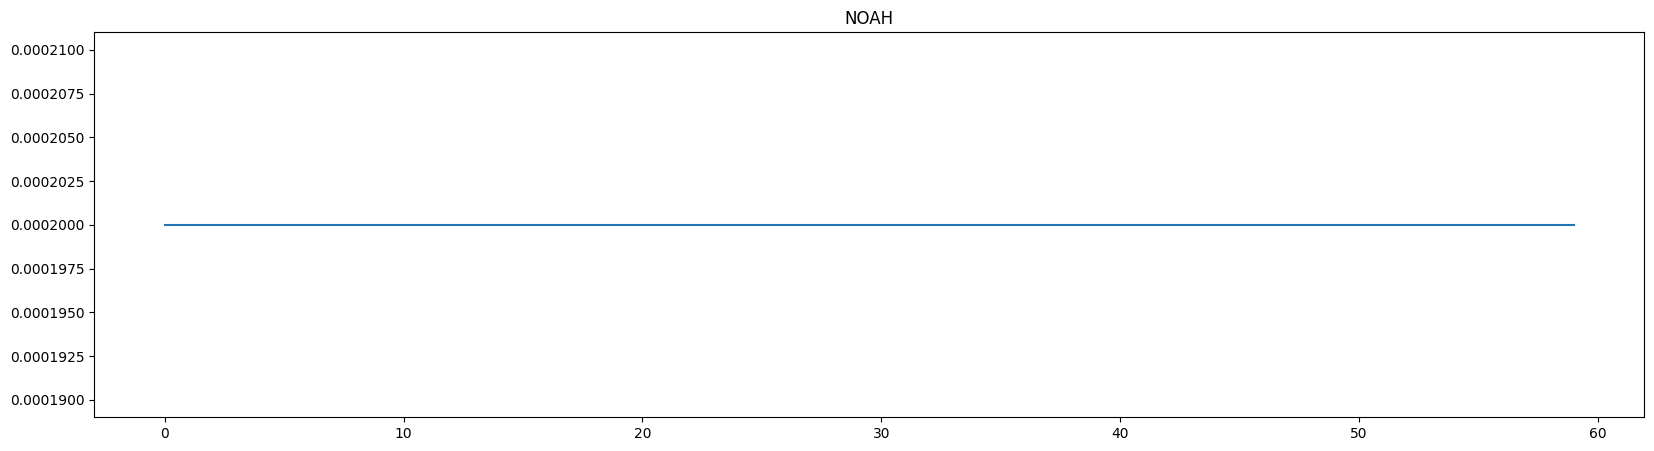

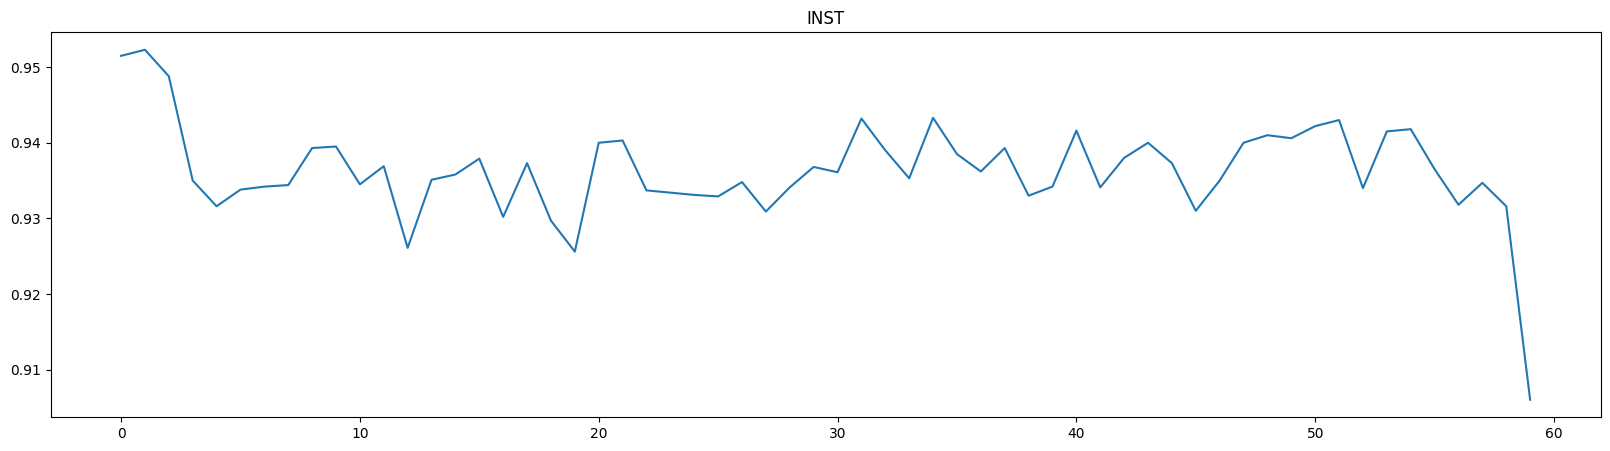

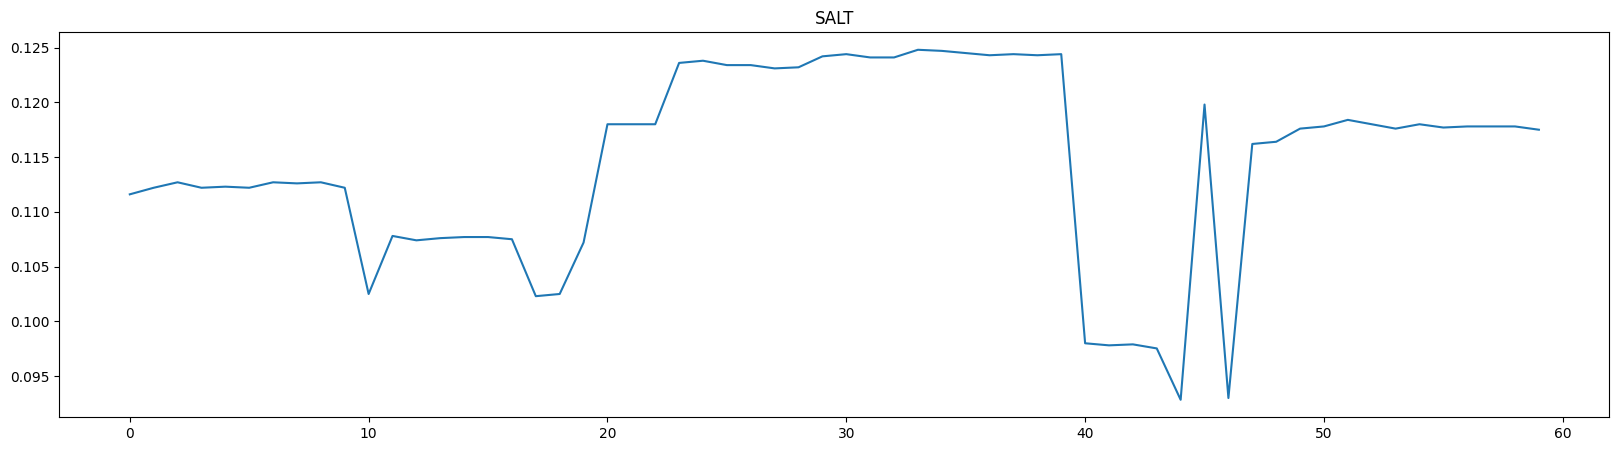

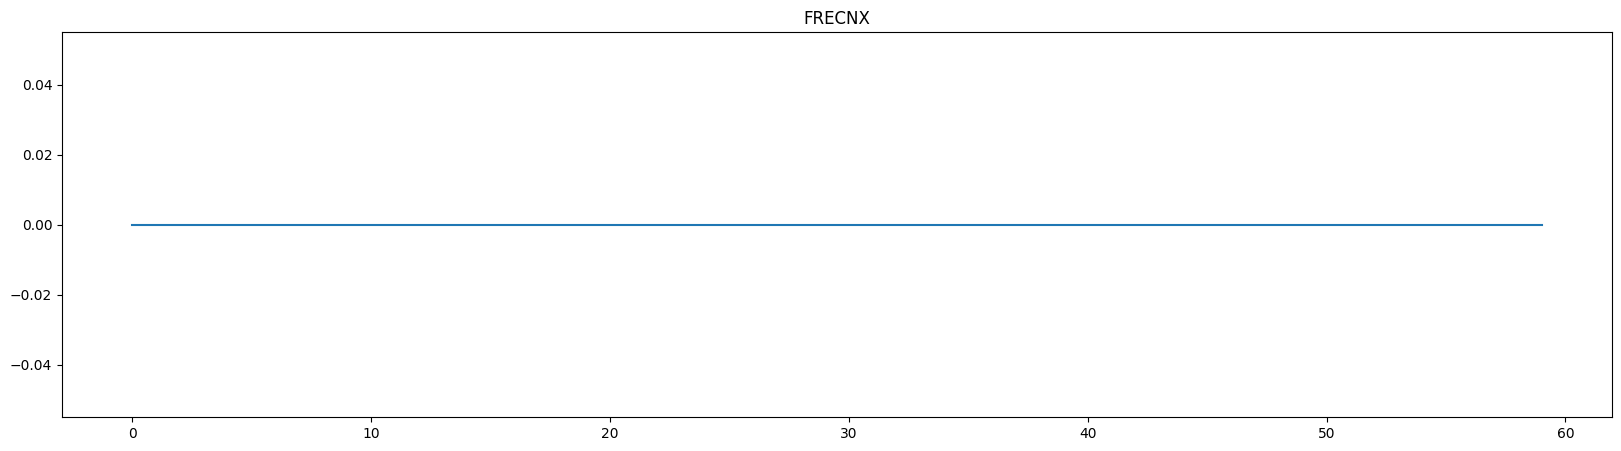

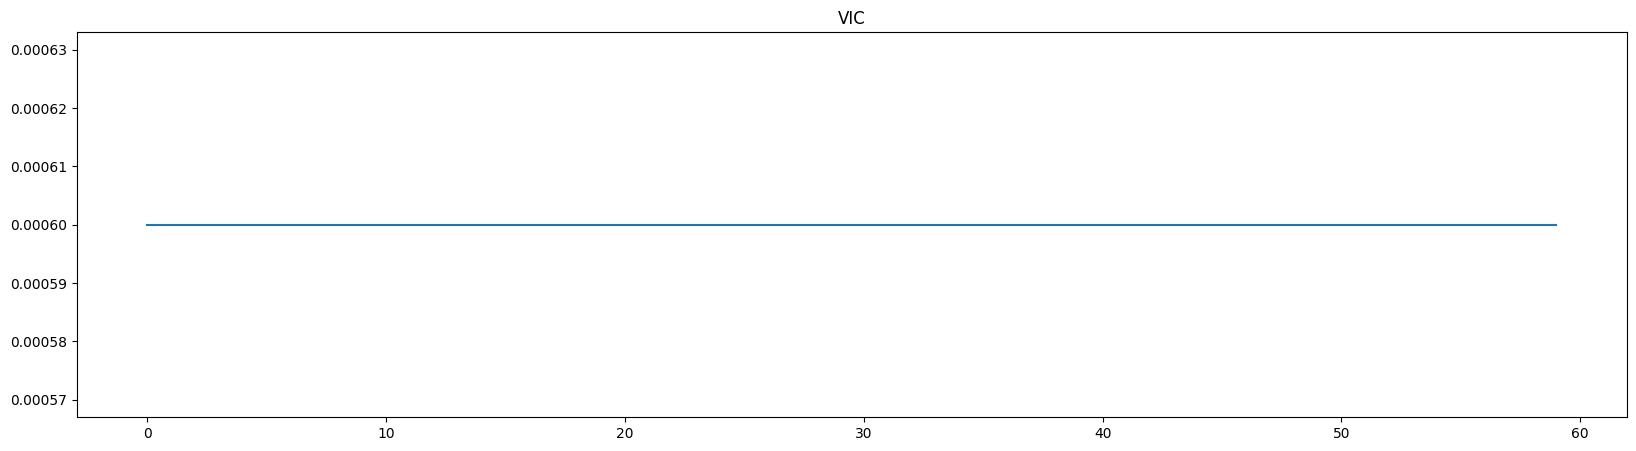

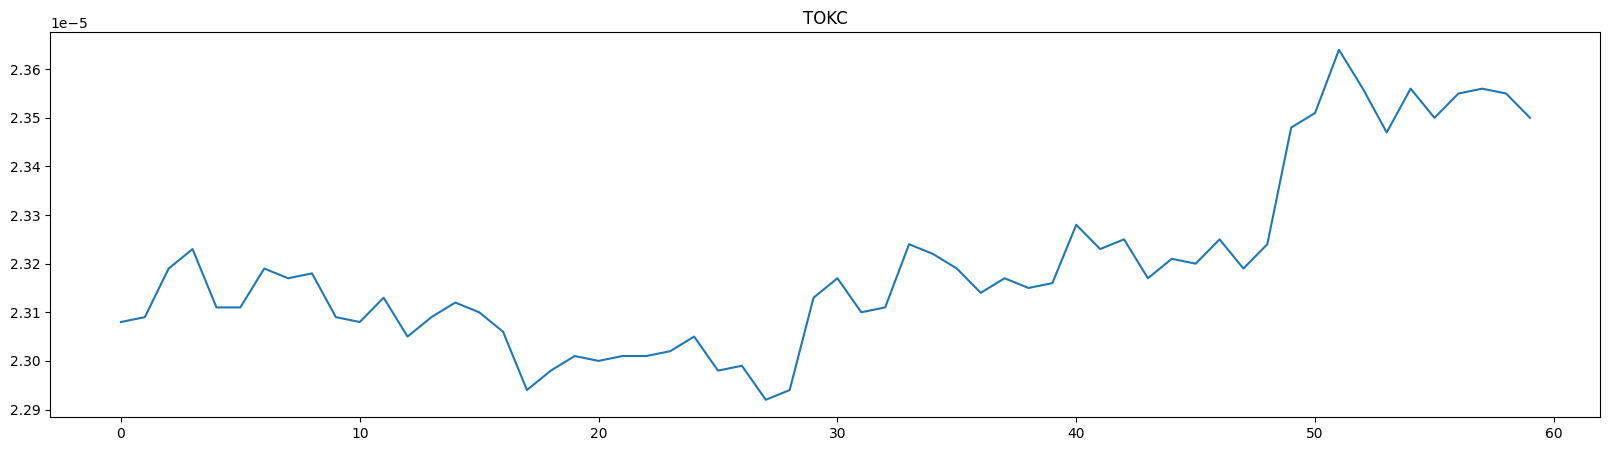

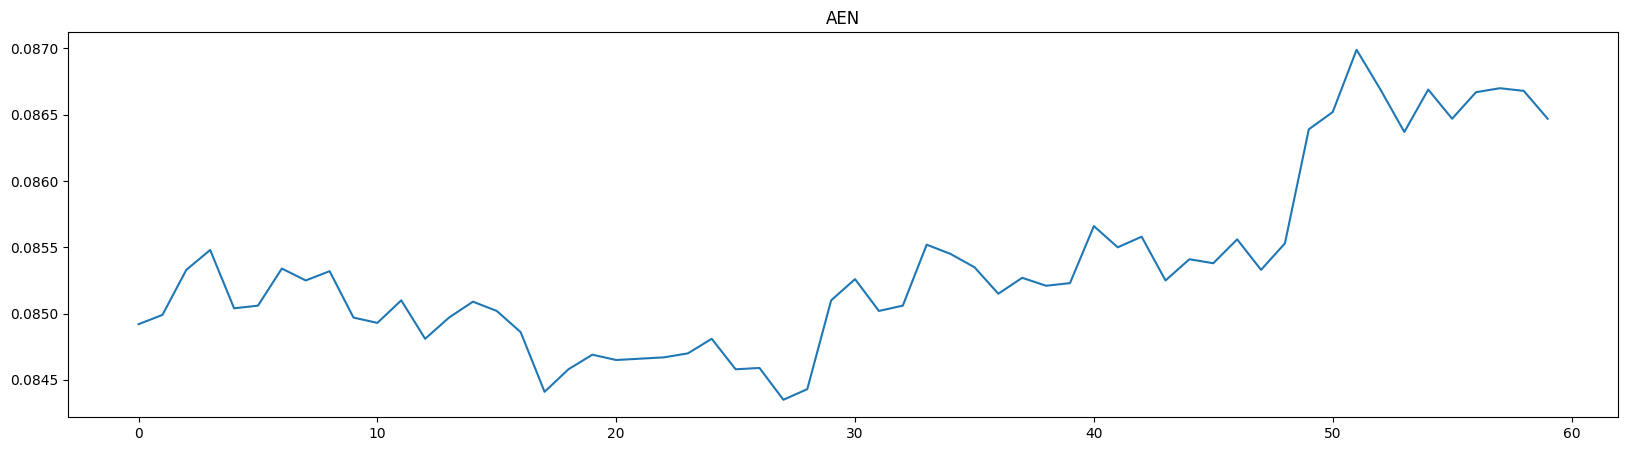

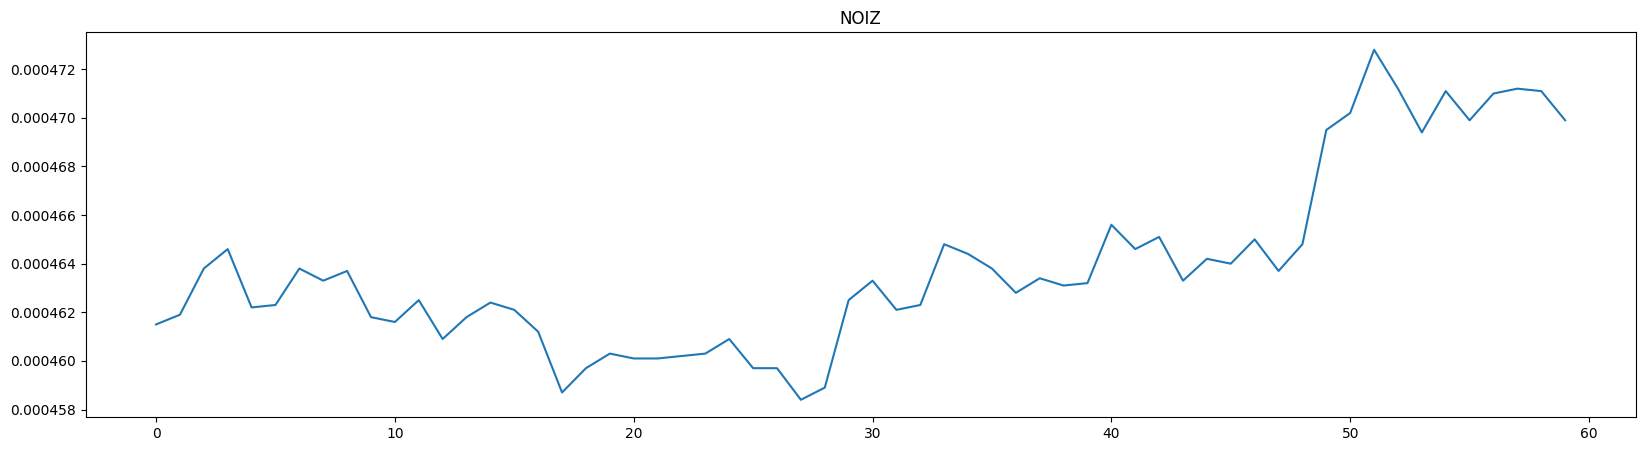

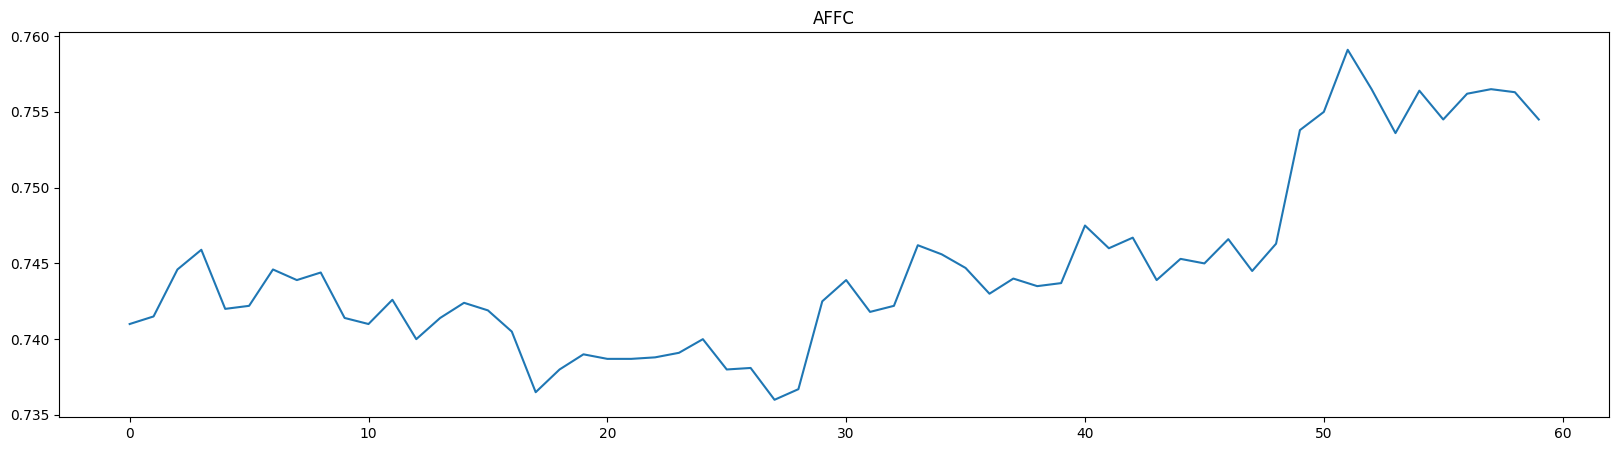

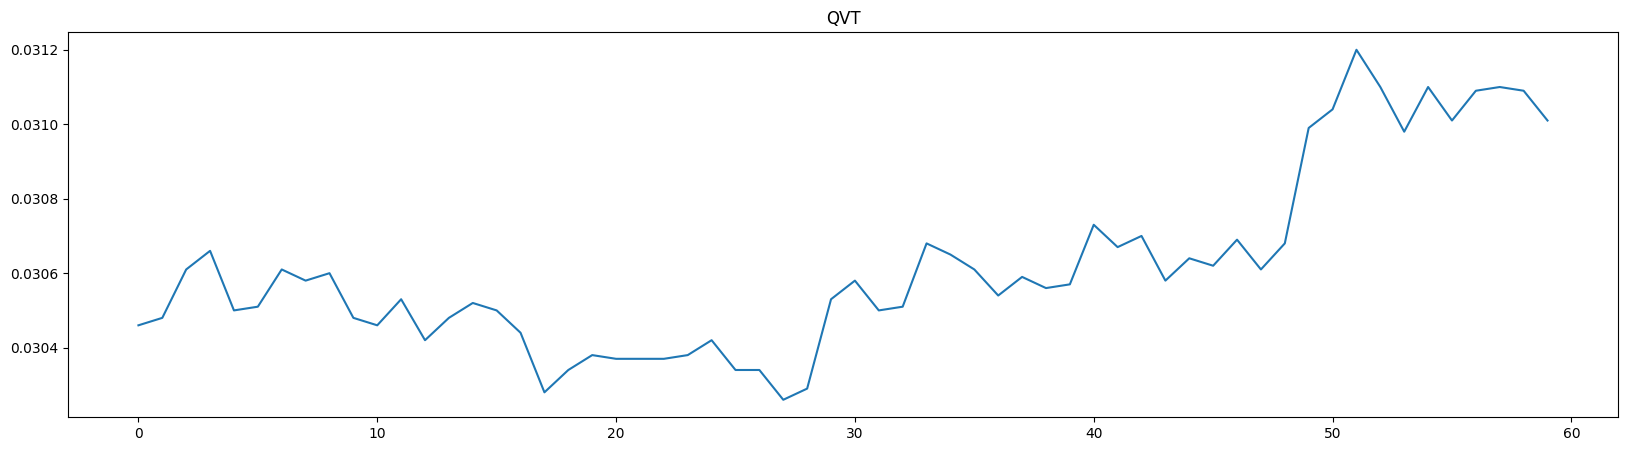

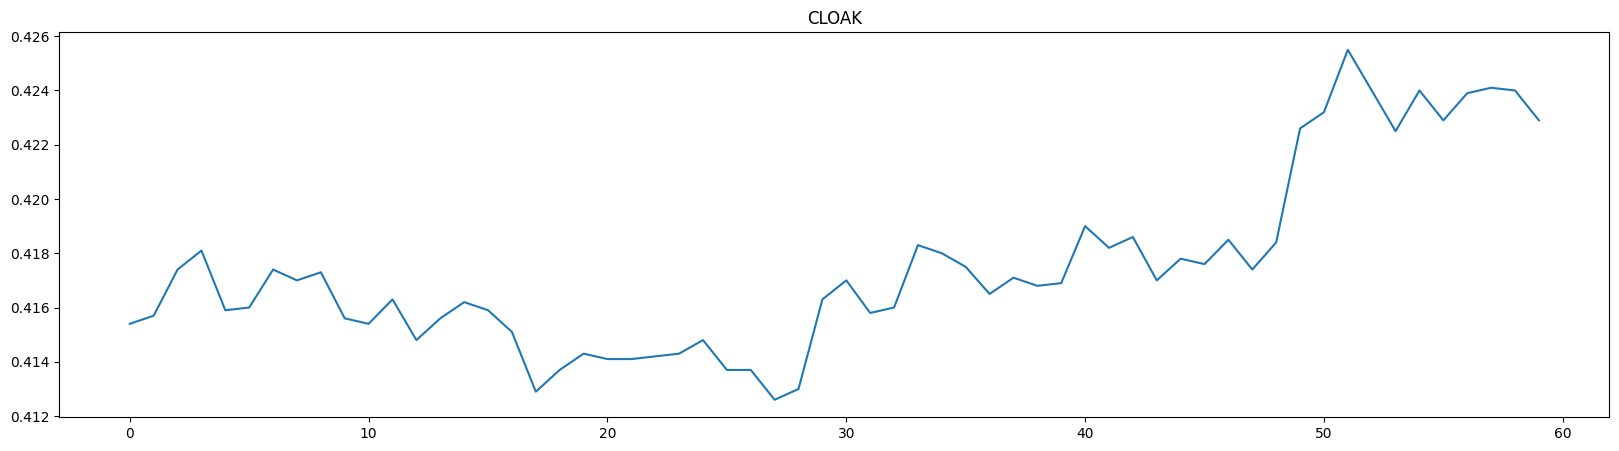

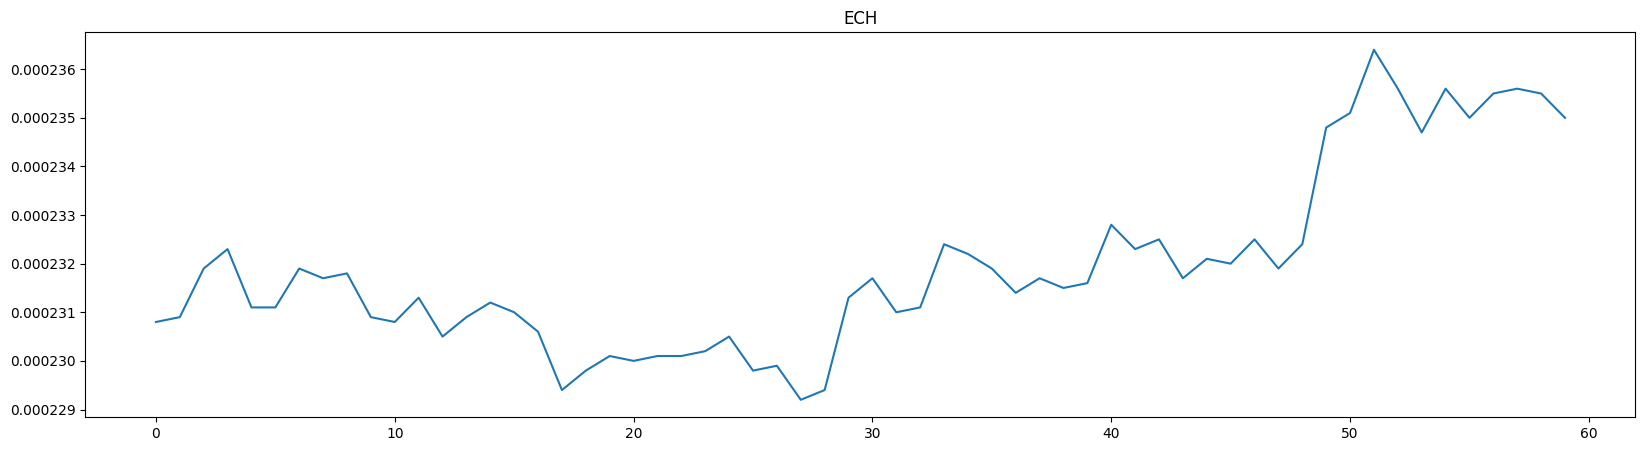

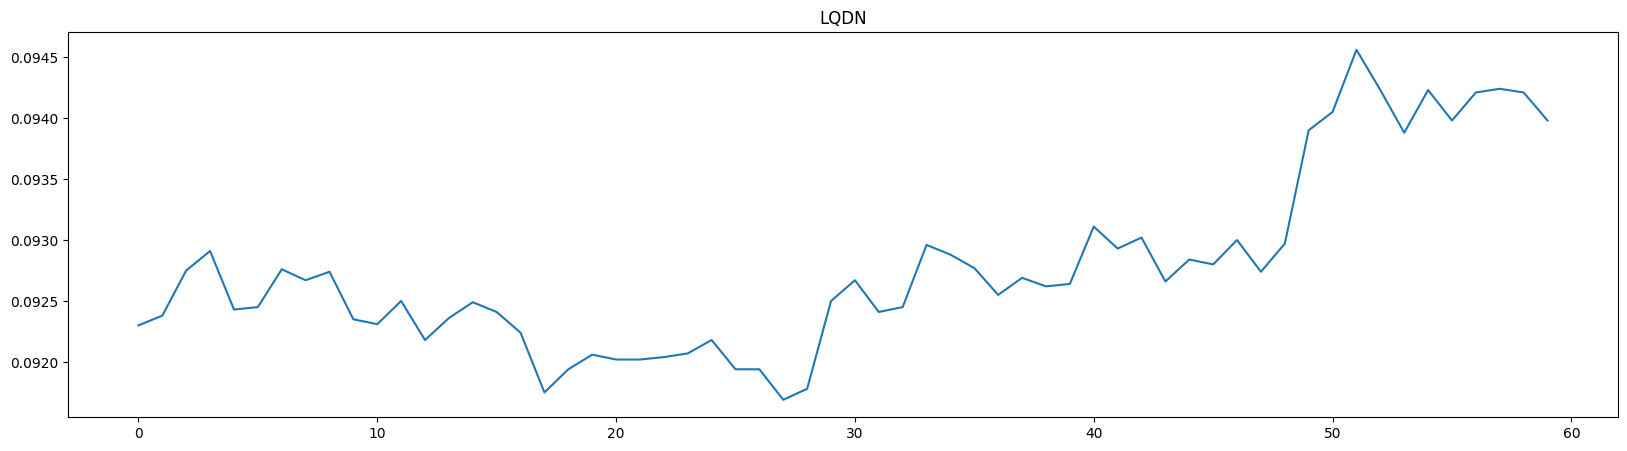

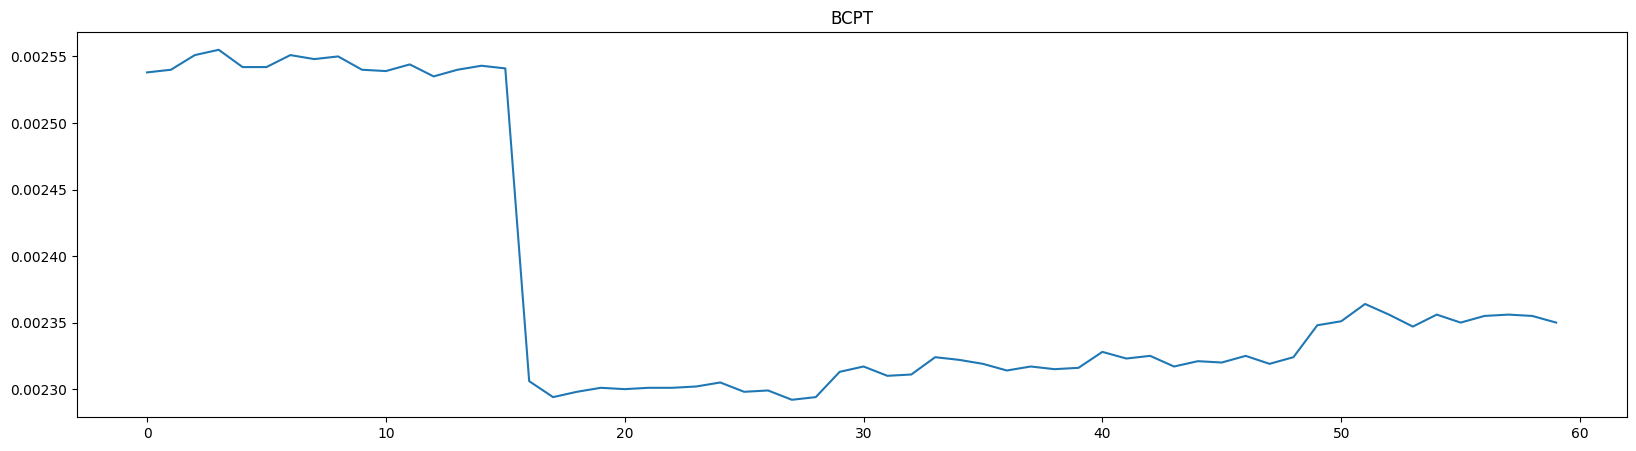

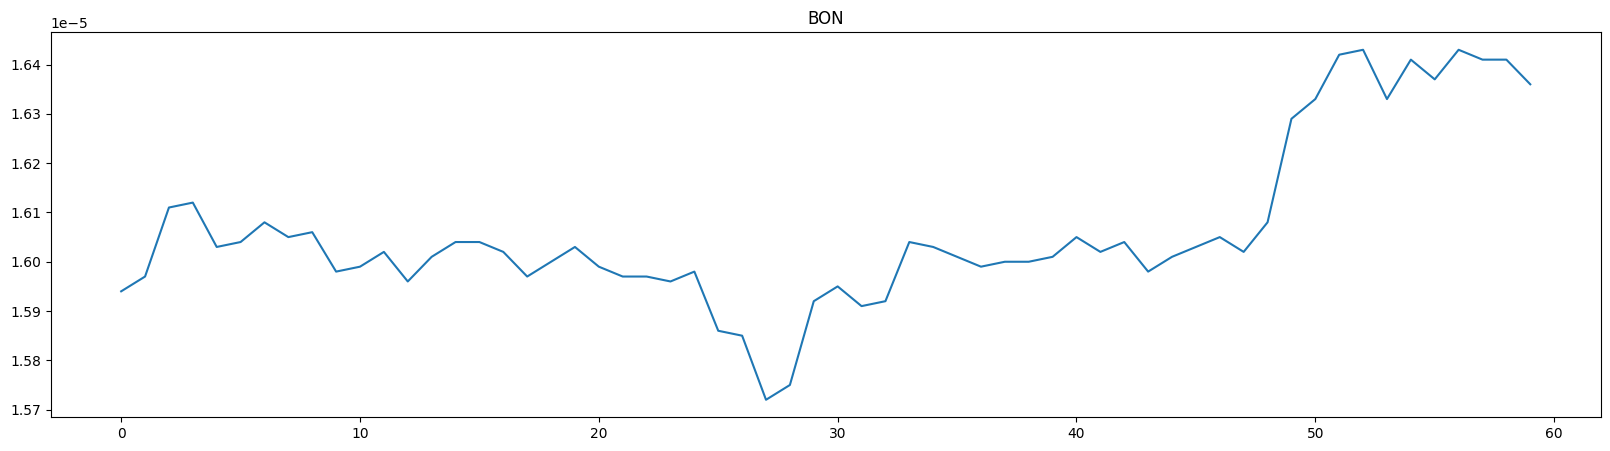

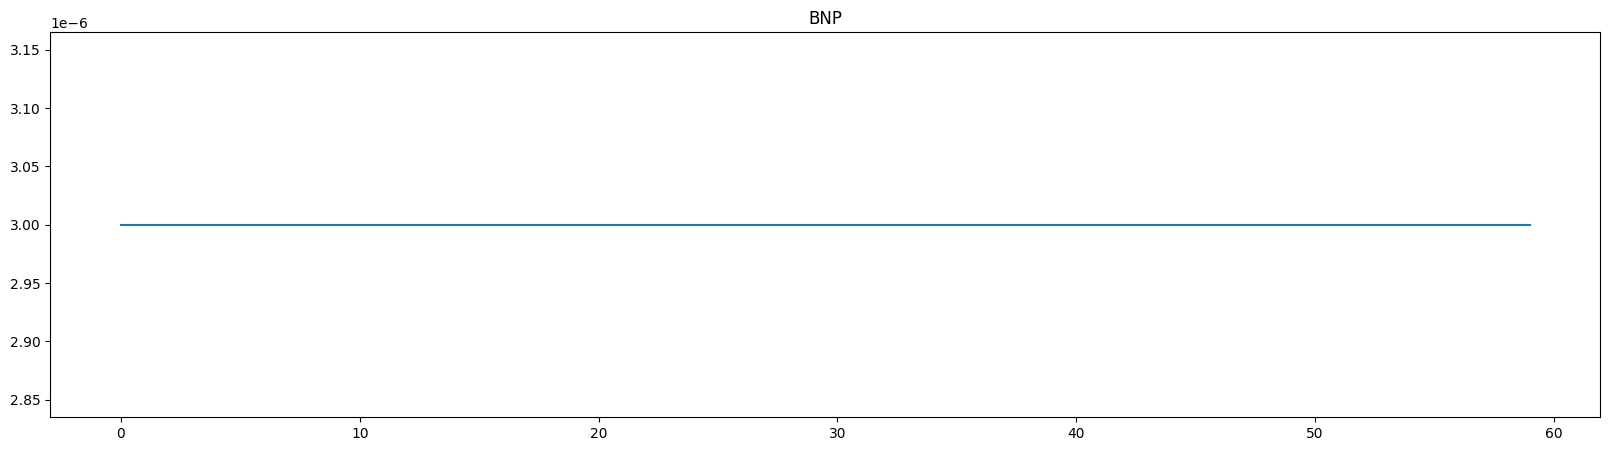

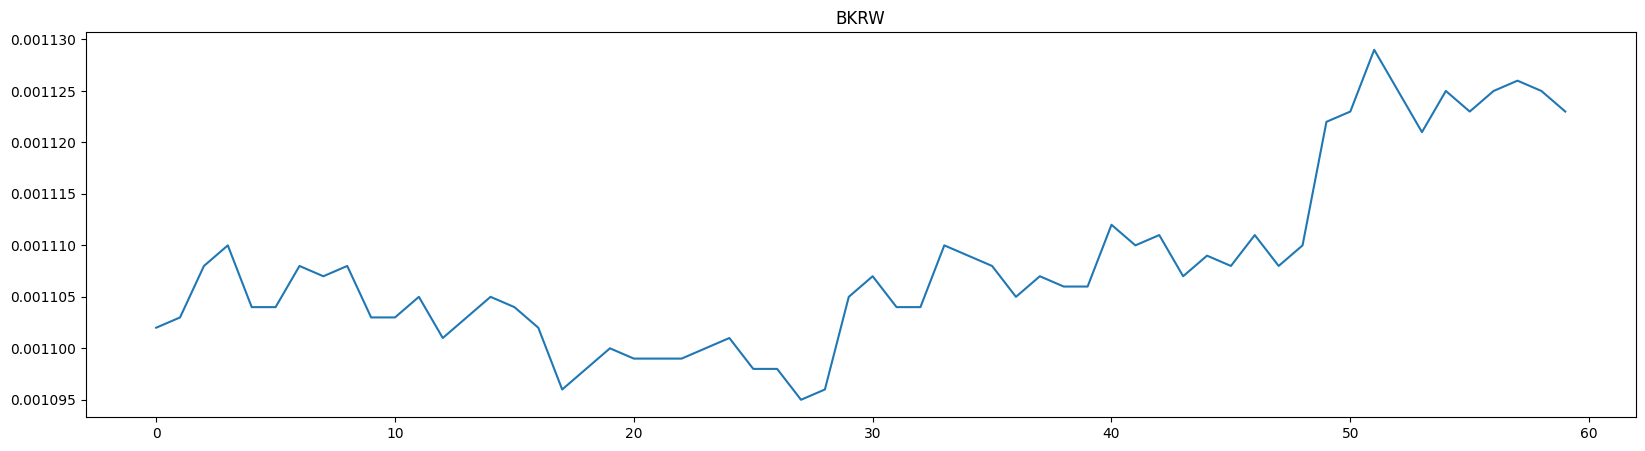

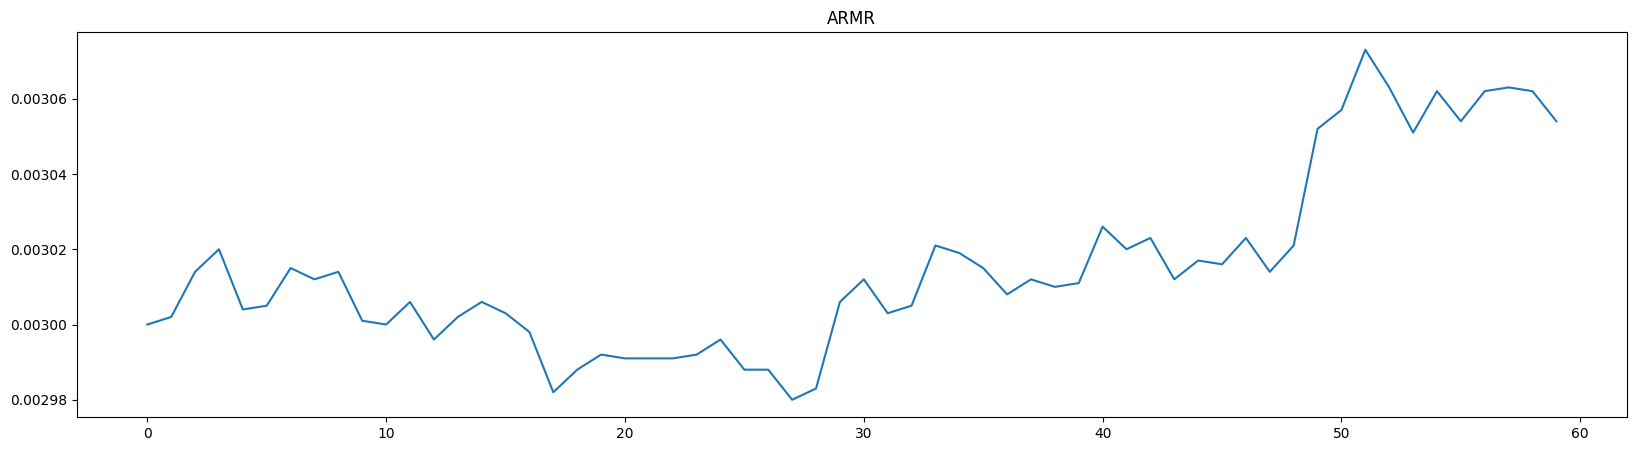

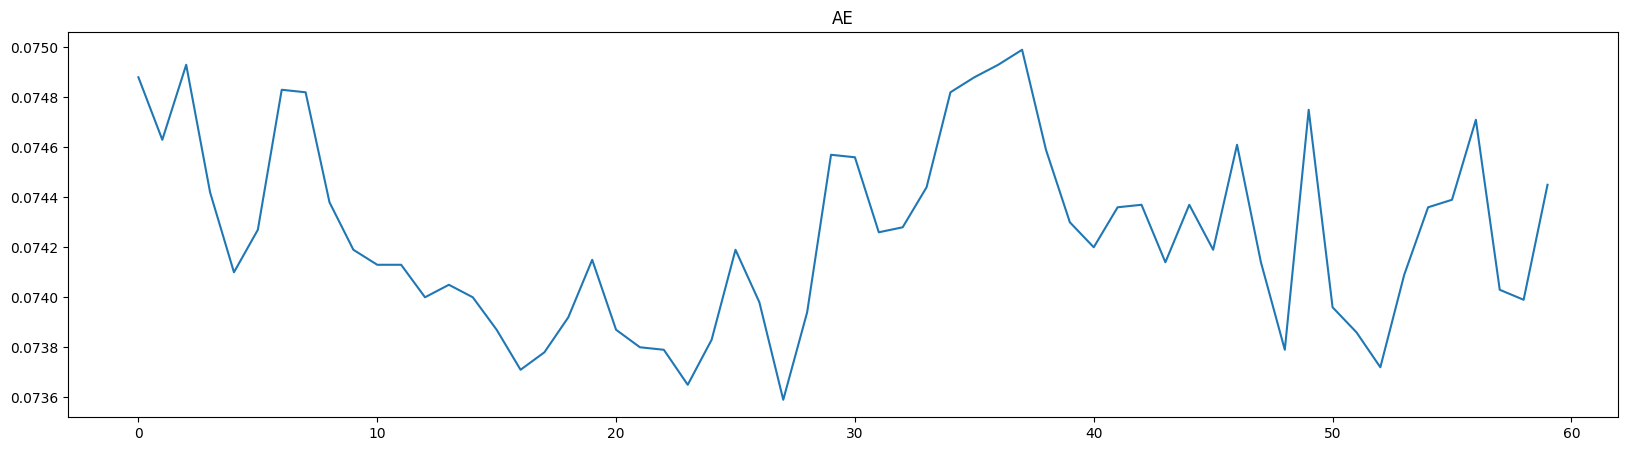

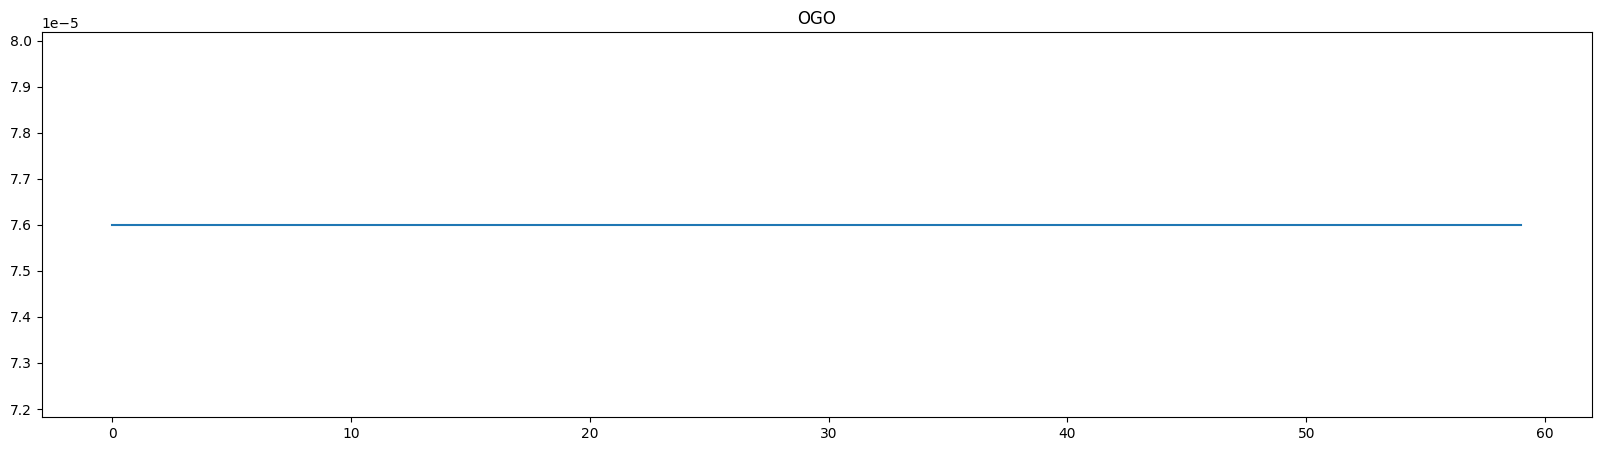

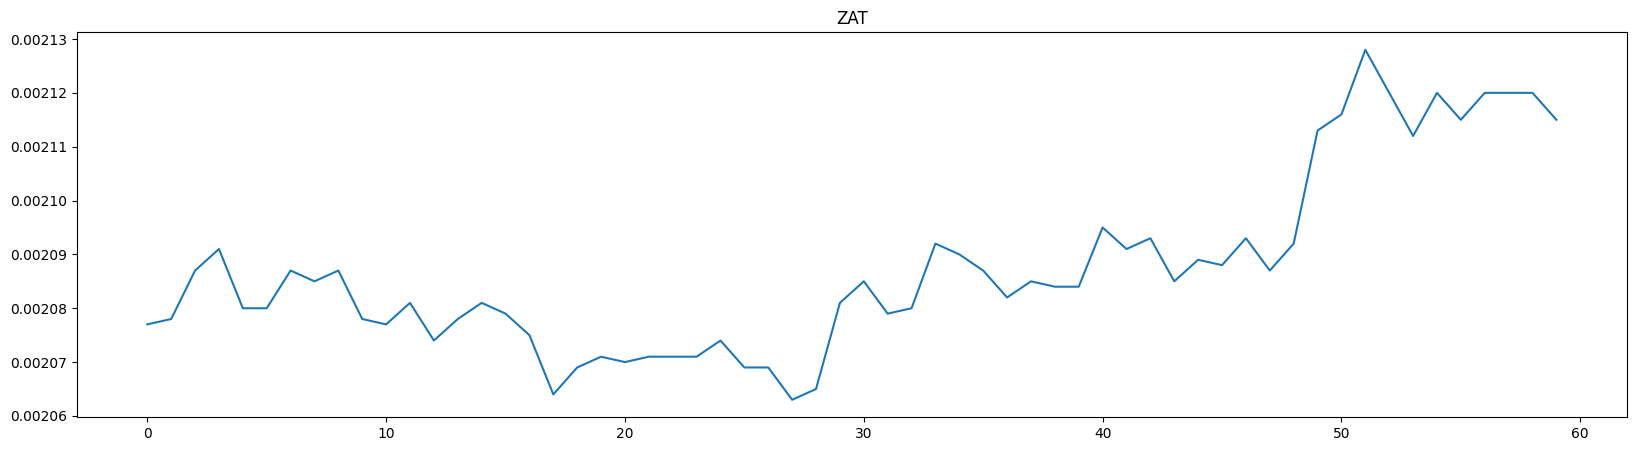

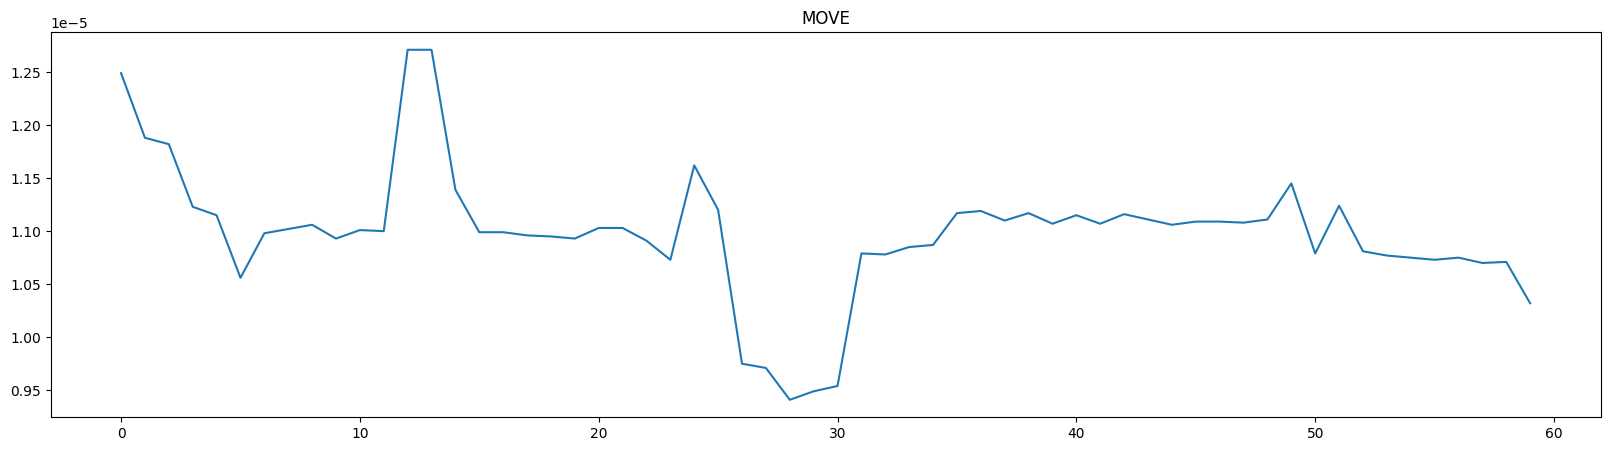

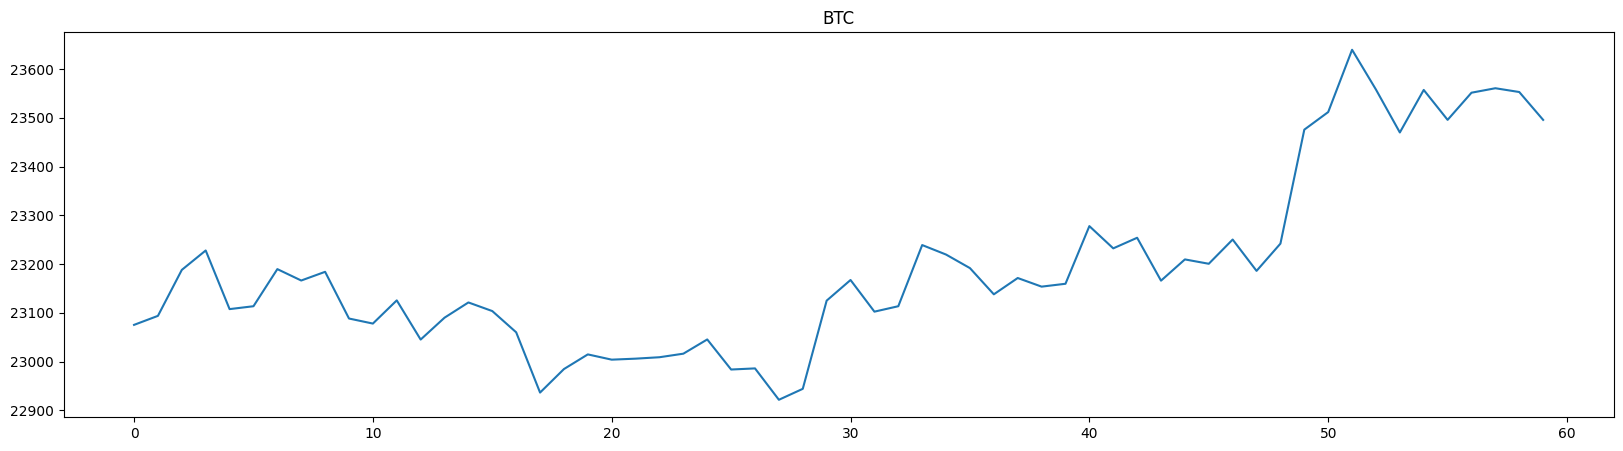

In [38]:
for col in data.columns:
    plt.figure(figsize=(20,5))
    plt.title(col)
    plt.plot(data[col]) 

In [136]:
# data = data.drop('cluster', axis=1)

## Scaling everything

In [39]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(data.iloc[:,:]) 

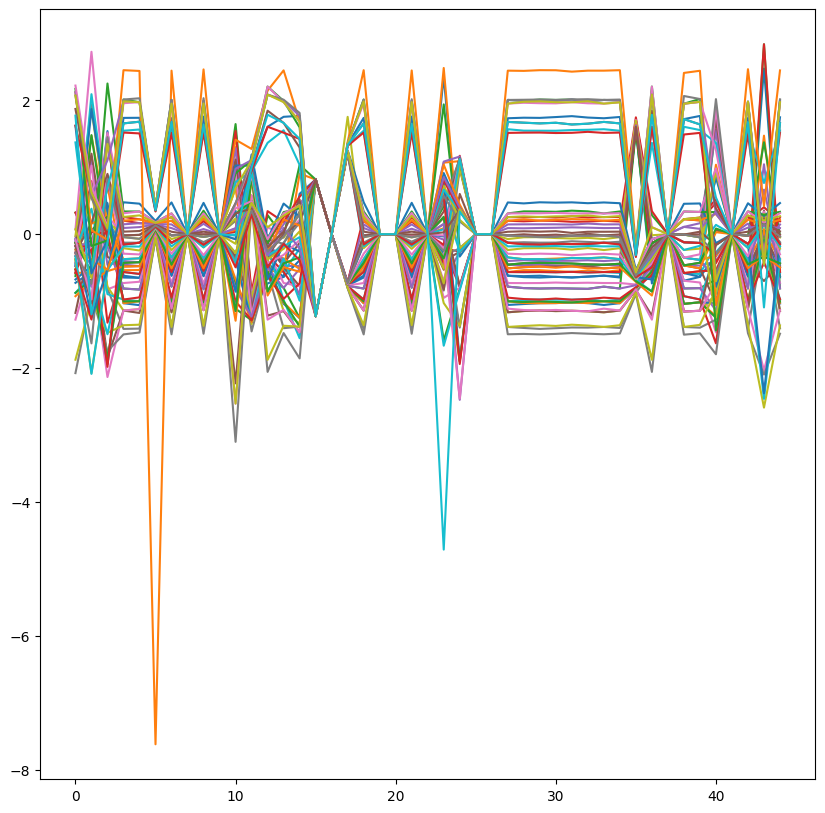

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(tickers_scaled.T);

In [41]:
tickers_scaled[0]

array([-7.26639895e-01, -5.64198789e-01,  1.54012007e+00, -6.47221525e-01,
       -6.52022290e-01,  4.73995491e-02, -6.19740814e-01,  0.00000000e+00,
       -6.26650128e-01,  0.00000000e+00,  7.71049623e-01, -1.17402830e+00,
       -7.36241527e-01, -6.37488456e-01,  6.03154152e-01,  8.16496581e-01,
       -5.55111512e-17, -7.65325105e-01, -6.47221525e-01,  2.01948392e-28,
        0.00000000e+00, -6.48975822e-01, -5.42101086e-20,  2.35811354e+00,
       -3.34117916e-01,  0.00000000e+00, -2.16840434e-19, -6.19740814e-01,
       -6.41422314e-01, -6.47221525e-01, -6.36954541e-01, -6.45837765e-01,
       -6.33444108e-01, -6.19740814e-01, -6.47122303e-01,  1.57446393e+00,
       -7.36241527e-01,  4.23516474e-22, -6.95597616e-01, -6.37391785e-01,
        1.71783735e+00,  2.71050543e-20, -6.29964646e-01,  2.47466110e+00,
       -6.44483773e-01])

In [42]:
tickers_scaled[1]

array([-5.76817236e-01, -5.75308709e-01,  7.18136374e-01, -5.37600377e-01,
       -5.35416217e-01,  6.22229375e-02, -5.65057801e-01,  0.00000000e+00,
       -5.48481713e-01,  0.00000000e+00,  1.30067336e+00, -1.11840912e+00,
       -5.56182458e-01, -5.46244879e-01,  9.05090676e-01,  8.16496581e-01,
       -5.55111512e-17, -7.59316271e-01, -5.37600377e-01,  2.01948392e-28,
        0.00000000e+00, -5.41529494e-01, -5.42101086e-20,  2.48240195e+00,
       -2.65690080e-01,  0.00000000e+00, -2.16840434e-19, -5.65057801e-01,
       -5.37246996e-01, -5.37600377e-01, -5.51724227e-01, -5.62771815e-01,
       -5.42081977e-01, -5.65057801e-01, -5.37517961e-01,  1.59451654e+00,
       -5.56182458e-01,  4.23516474e-22, -5.80622803e-01, -5.53062111e-01,
        1.03741590e+00,  2.71050543e-20, -5.69293893e-01,  1.47153123e+00,
       -5.43295517e-01])

### 2 version of scaling

In [139]:
fm = data.mean(axis=1)
data = data.apply(lambda x: x - fm, axis=0)
W_abs = data.abs().sum(axis=1)
data = data.div(np.where(W_abs == 0, 1e-6, W_abs), axis='index')
data

GREXIT     BITCM       INK       CMA      TLOS      FUND  \
timestep                                                                   
1.673827e+09 -0.015721 -0.015721 -0.015721 -0.015721 -0.015717 -0.015712   
1.673914e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015711   
1.674000e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015712   
1.674086e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015711   
1.674173e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015709   
1.674259e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015709   
1.674346e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015710   
1.674432e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015713   
1.674518e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015714 -0.015710   
1.674605e+09 -0.015718 -0.015718 -0.015718 -0.015718 -0.015715 -0.015710   
1.674691e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015712   
1.674778e+09 -0.015720 -0.015721 -0.015721 -0.015721 -0.015717 -0.015712   
1.674864e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015711   
1.674950e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015709   
1.675037e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015709   
1.675123e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015710   
1.675210e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015711   
1.675296e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015717 -0.015712   
1.675382e+09 -0.015721 -0.015721 -0.015721 -0.015721 -0.015718 -0.015712   
1.675469e+09 -0.015722 -0.015722 -0.015722 -0.015722 -0.015718 -0.015711   
1.675555e+09 -0.015721 -0.015721 -0.015721 -0.015721 -0.015717 -0.015711   
1.675642e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015716 -0.015710   
1.675728e+09 -0.015720 -0.015720 -0.015720 -0.015721 -0.015717 -0.015711   
1.675814e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015715 -0.015710   
1.675901e+09 -0.015720 -0.015720 -0.015720 -0.015720 -0.015716 -0.015712   
1.675987e+09 -0.015719 -0.015719 -0.015719 -0.015719 -0.015715 -0.015711   
1.676074e+09 -0.015718 -0.015718 -0.015718 -0.015718 -0.015714 -0.015710   
1.676160e+09 -0.015717 -0.015717 -0.015717 -0.015717 -0.015713 -0.015708   
1.676246e+09 -0.015718 -0.015718 -0.015718 -0.015718 -0.015714 -0.015710   

                  KUMA      URAC      ACHC       XCG  ...       ADT      DANK  \
timestep                                              ...                       
1.673827e+09 -0.015721 -0.015721 -0.015721 -0.015721  ... -0.015721 -0.015720   
1.673914e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.674000e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.674086e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.674173e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015717   
1.674259e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015716   
1.674346e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015717   
1.674432e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.674518e+09 -0.015717 -0.015717 -0.015717 -0.015717  ... -0.015717 -0.015717   
1.674605e+09 -0.015718 -0.015718 -0.015718 -0.015718  ... -0.015718 -0.015718   
1.674691e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.674778e+09 -0.015721 -0.015721 -0.015721 -0.015721  ... -0.015721 -0.015720   
1.674864e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.674950e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.675037e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.675123e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015719   
1.675210e+09 -0.015719 -0.015719 -0.015719 -0.015719  ... -0.015719 -0.015718   
1.675296e+09 -0.015720 -0.015720 -0.015720 -0.015720  ... -0.015720 -0.015720   
1.675382e+09 -0.015721 -0.015721 -0.015

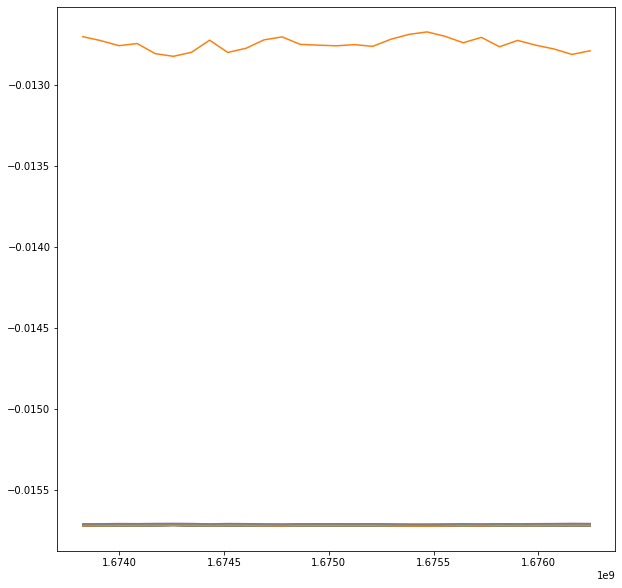

In [142]:
plt.figure(figsize=(10, 10))
plt.plot(data.iloc[:,:-1]);

## Basic KMeans

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 41.70it/s]


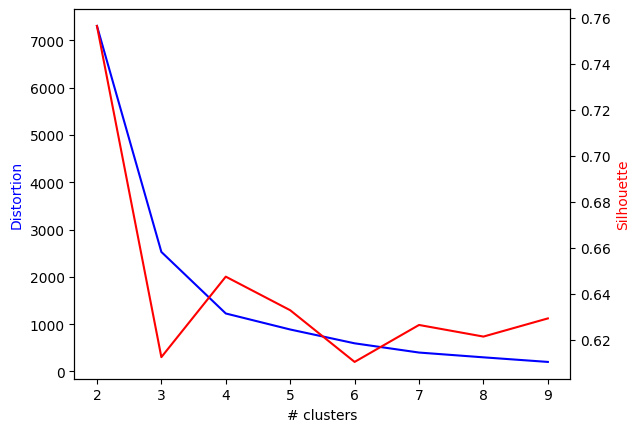

In [43]:
distortions = [] # Сумма кв расстояний от объектов до центра кластера, взвешенная по весам (при их наличии)
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(data, kmeanModel.labels_, metric="euclidean"))
    # silhouette_score считает насколько чисты кластеры
    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [53]:
n_clusters = 3
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=6, max_iter=10)
ts_kmeans.fit(data)

TimeSeriesKMeans(max_iter=10, n_jobs=6)

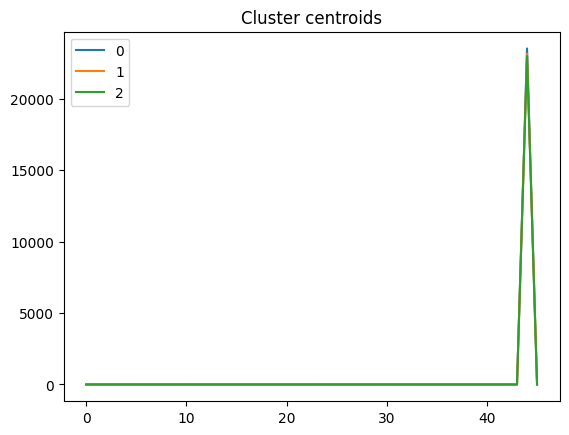

In [54]:
for cluster_number in range(n_clusters): # Построим усредненные ряды внутри каждого кластера
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids") # Быки и медведи
plt.legend()
plt.show()

In [55]:
# посмотрим наличие корреляции между полученными кластерами и биржевыми секторами
data['cluster'] = ts_kmeans.predict(data)
# pd.DataFrame(data.groupby('cluster').value_counts())

/Users/alsukurmakaeva/miniconda3/envs/dqual_alpha_nlp/lib/python3.10/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 60 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [56]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.shortName}\n{row.sector}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


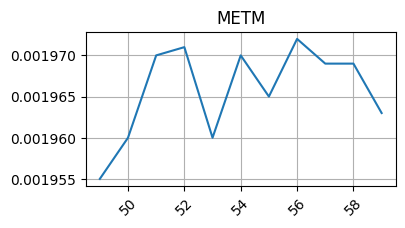

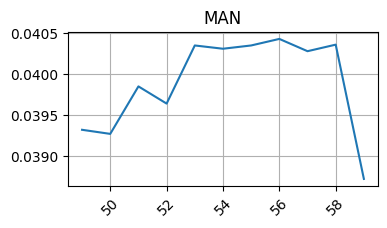

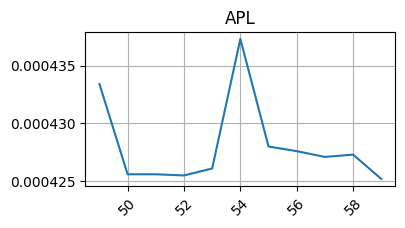

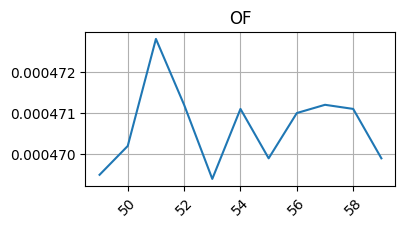

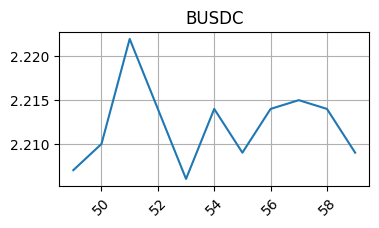

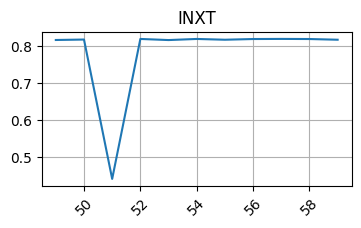

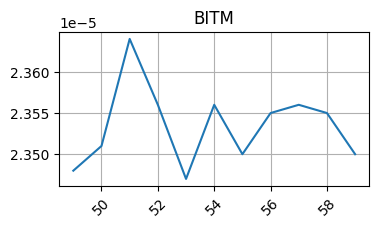

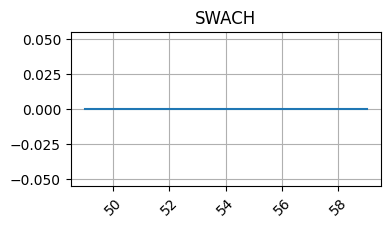

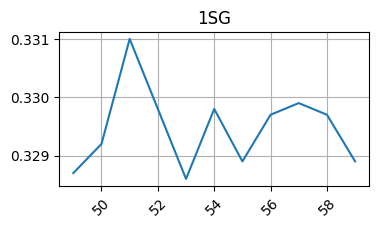

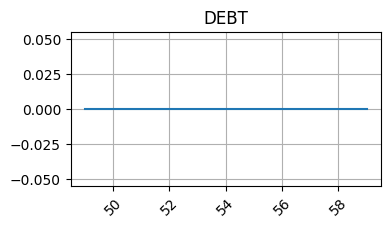

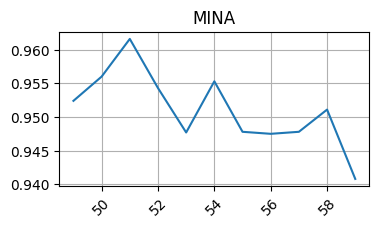

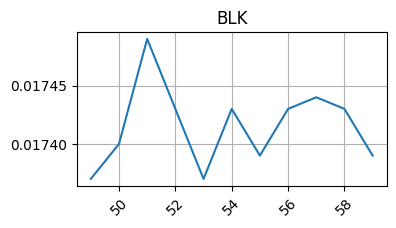

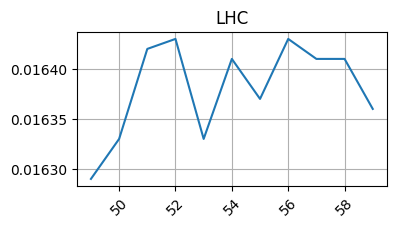

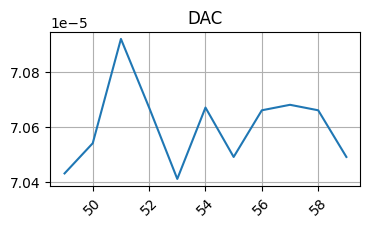

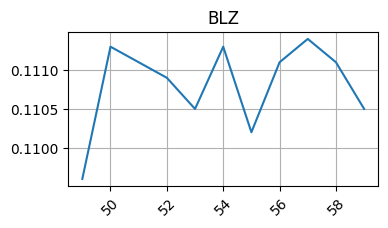

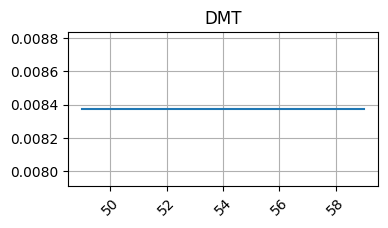

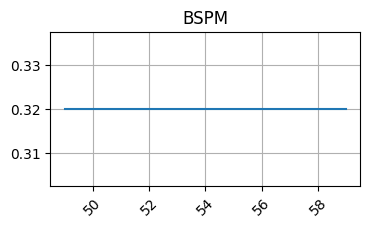

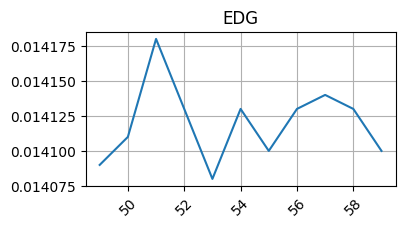

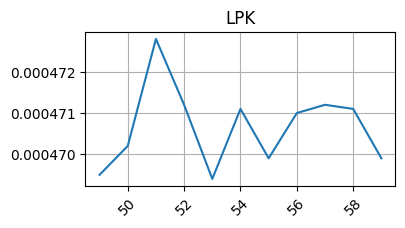

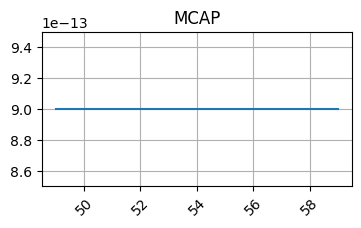

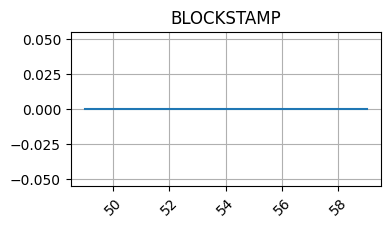

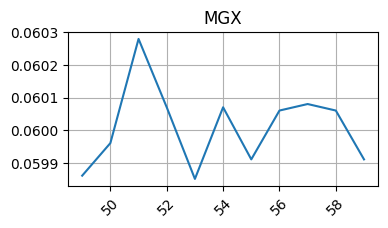

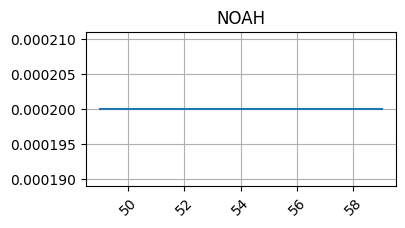

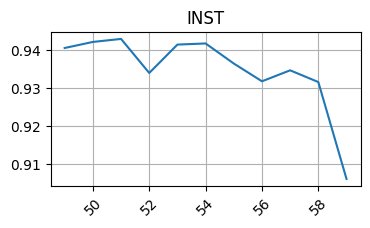

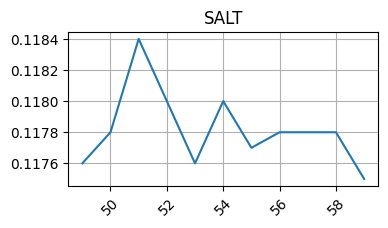

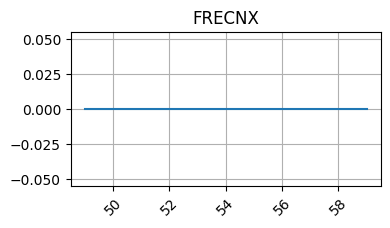

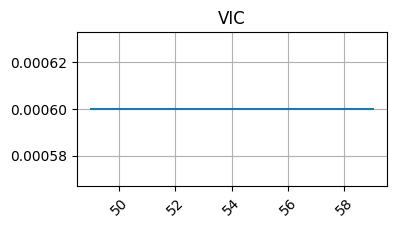

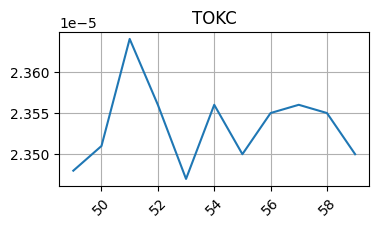

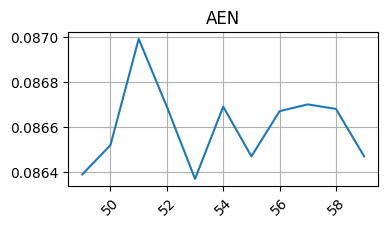

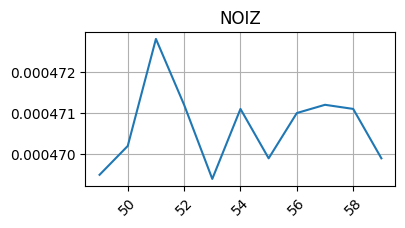

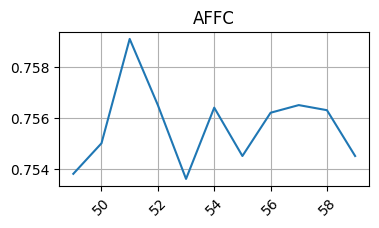

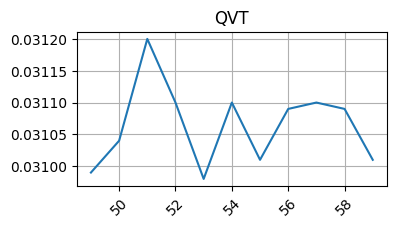

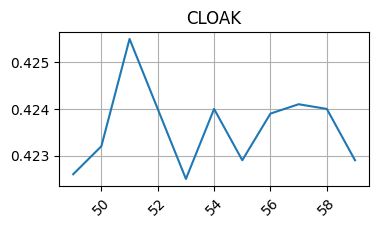

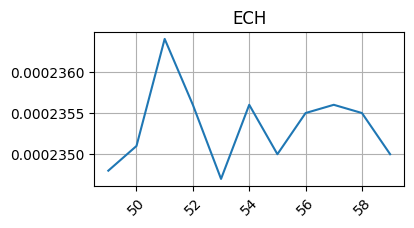

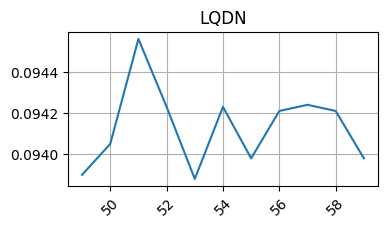

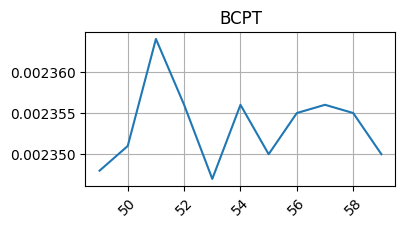

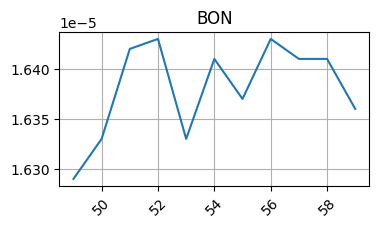

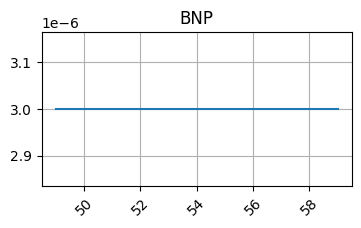

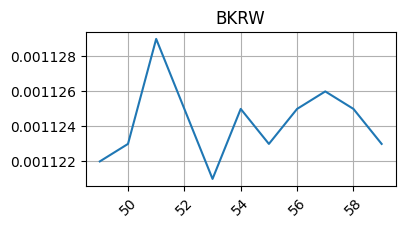

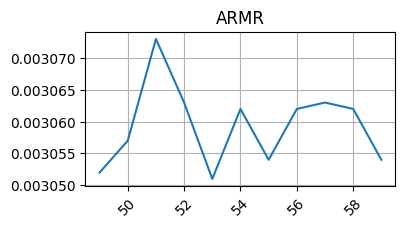

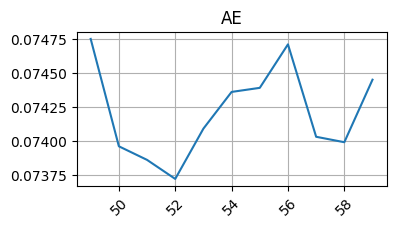

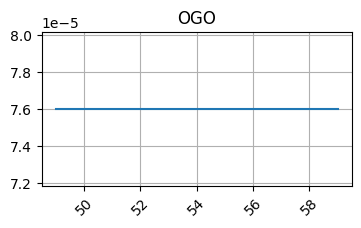

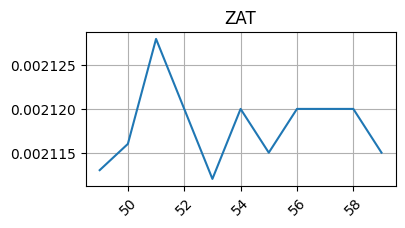

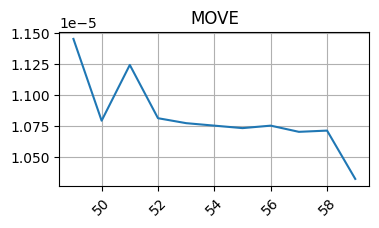

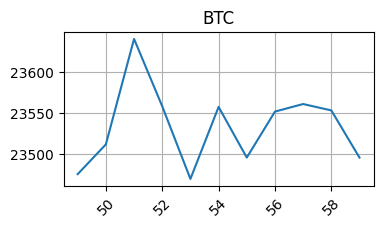

                          Cluster number: 1


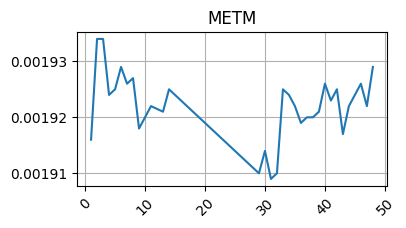

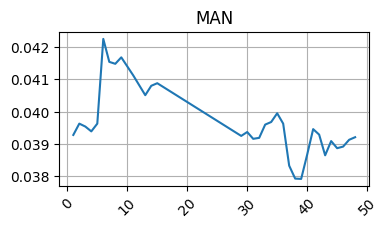

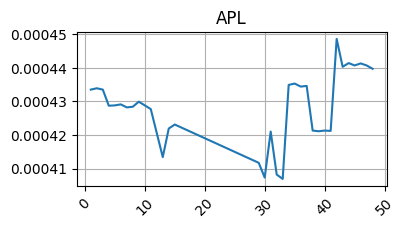

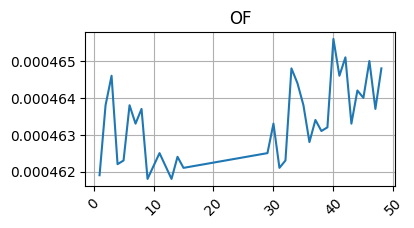

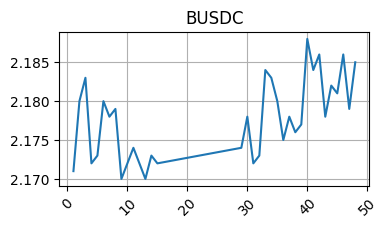

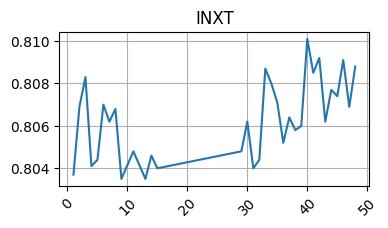

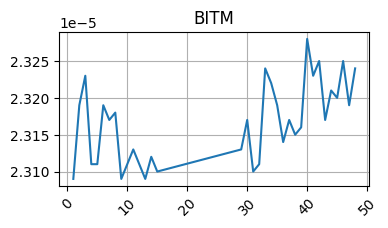

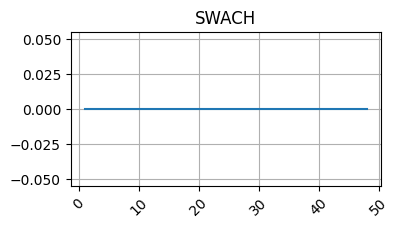

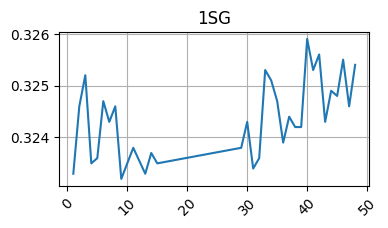

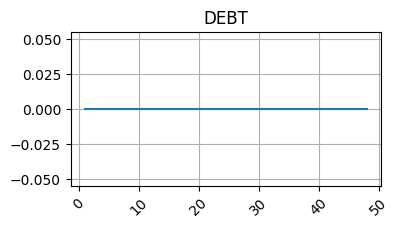

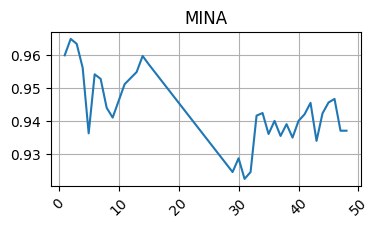

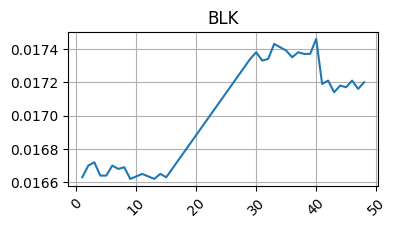

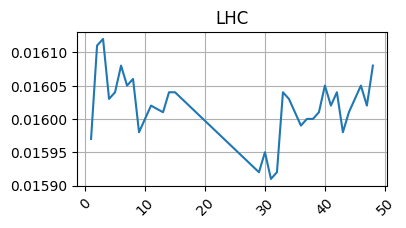

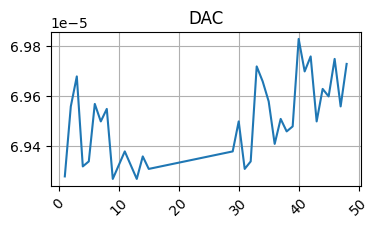

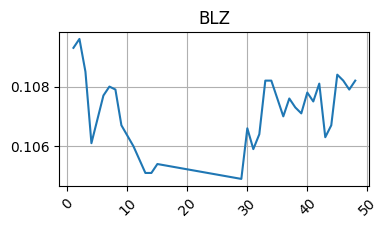

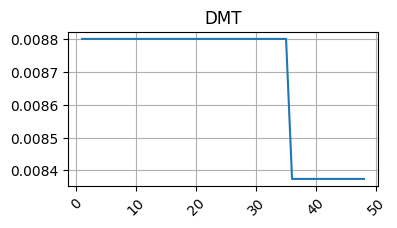

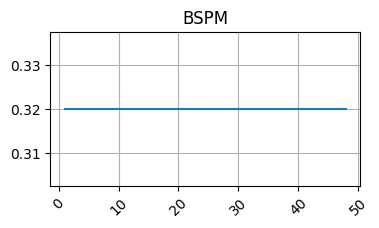

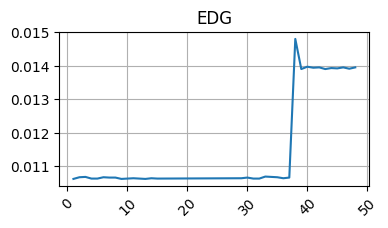

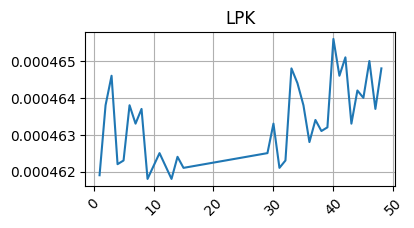

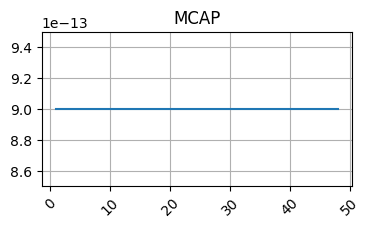

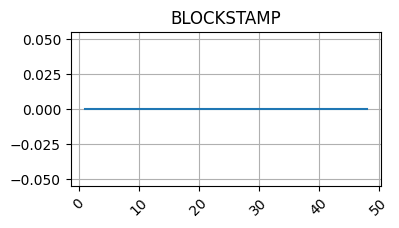

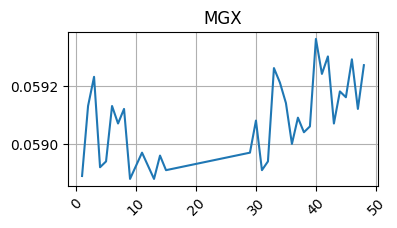

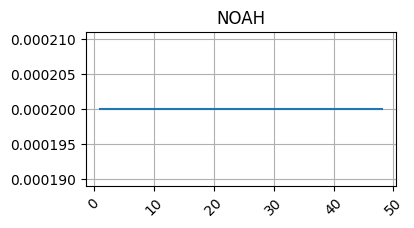

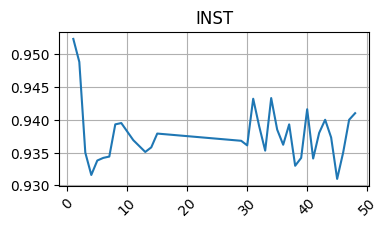

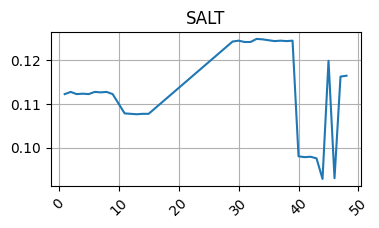

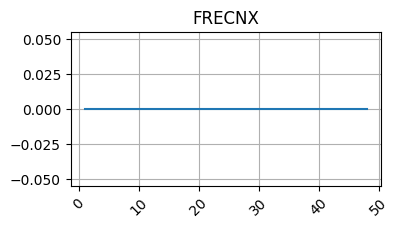

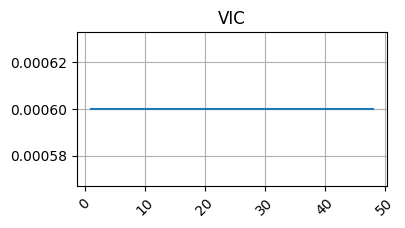

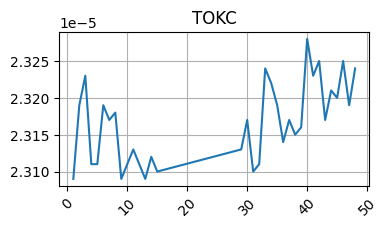

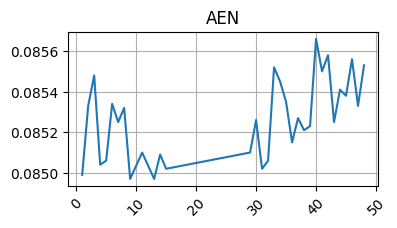

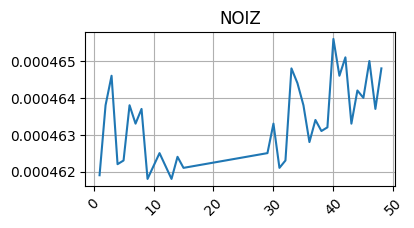

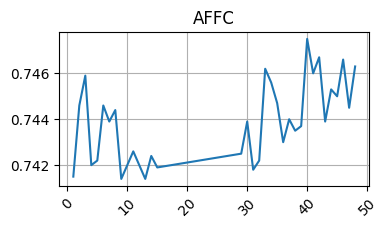

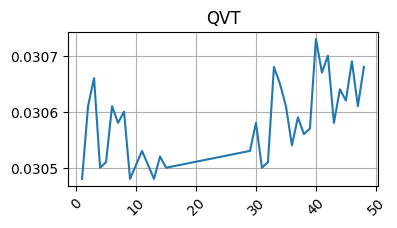

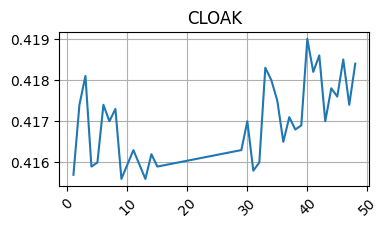

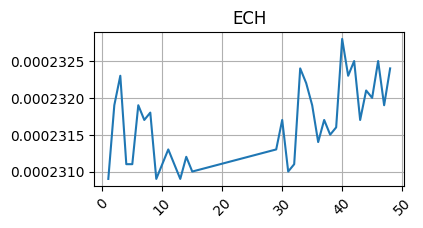

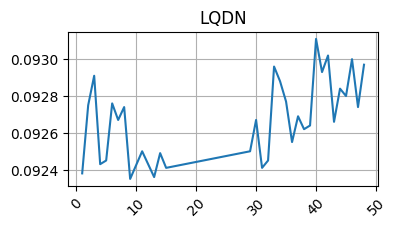

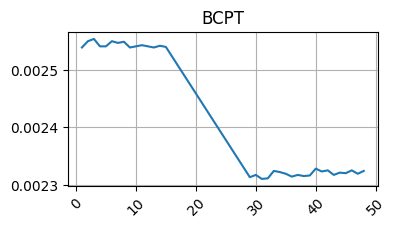

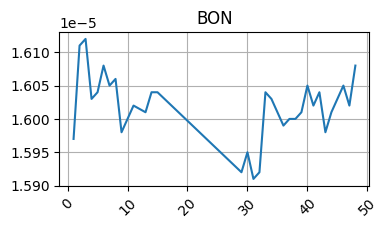

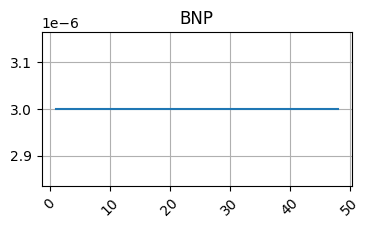

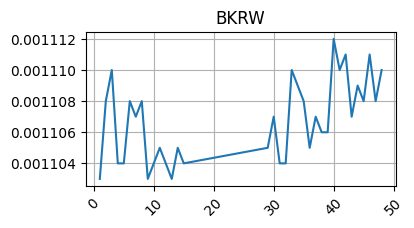

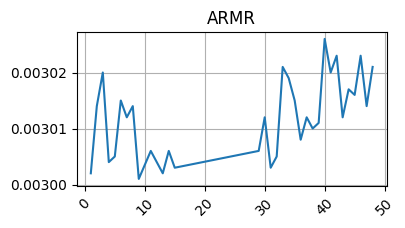

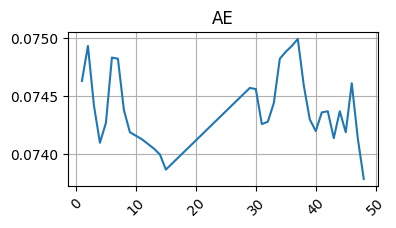

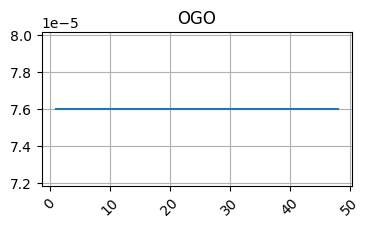

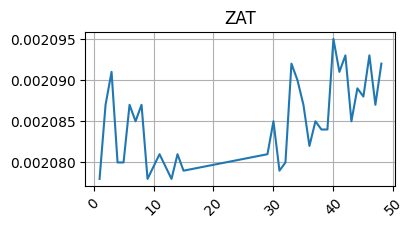

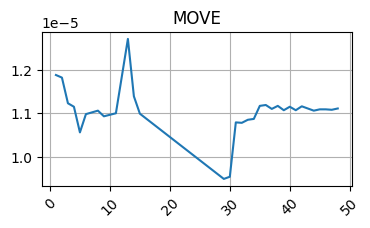

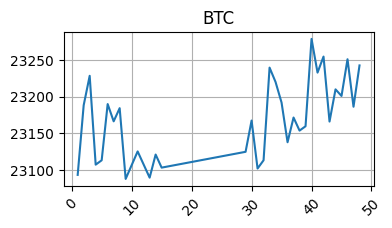

                          Cluster number: 2


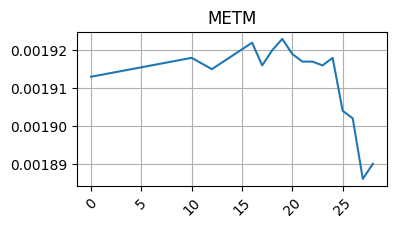

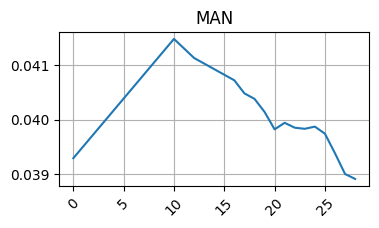

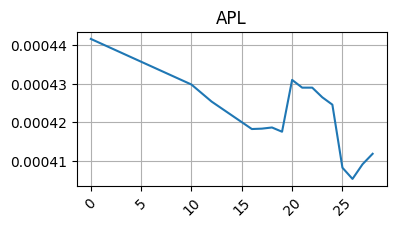

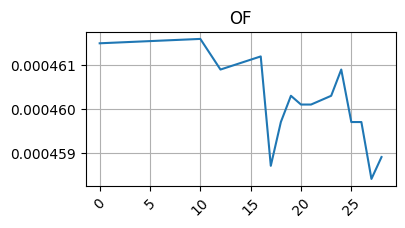

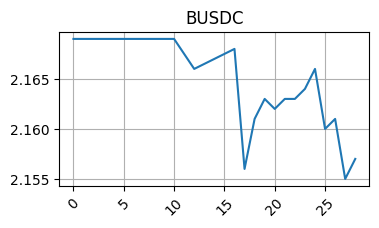

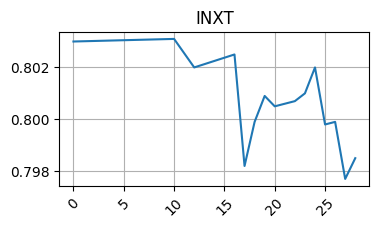

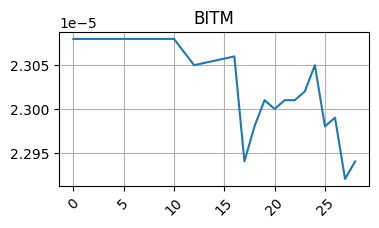

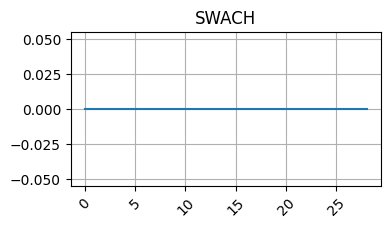

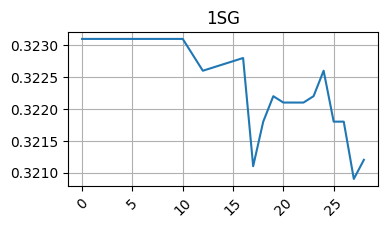

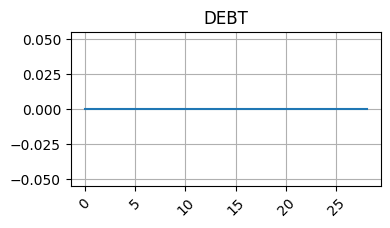

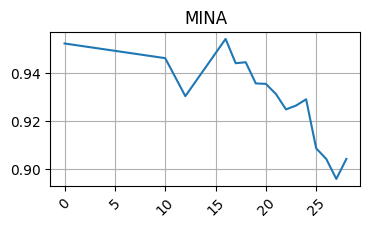

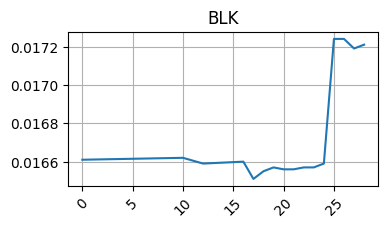

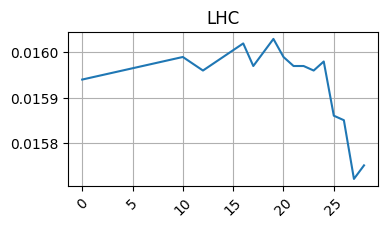

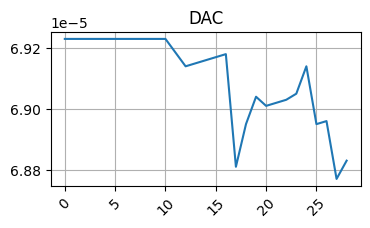

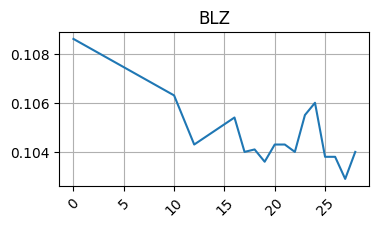

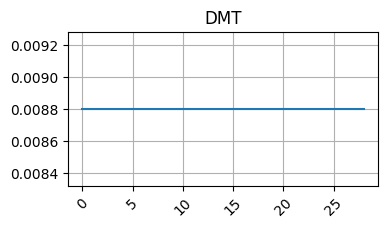

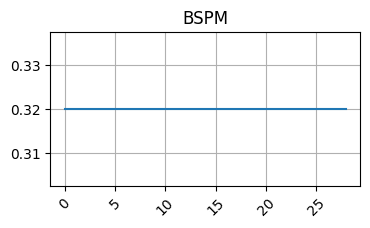

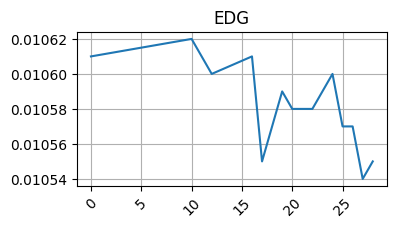

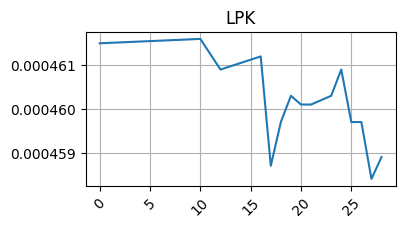

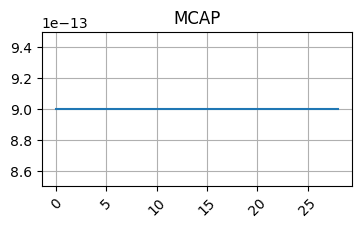

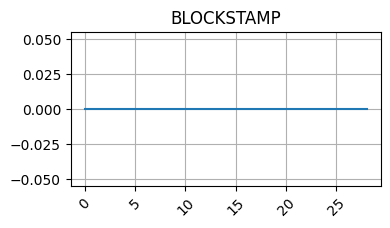

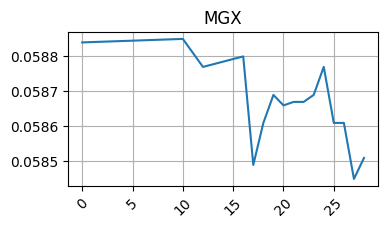

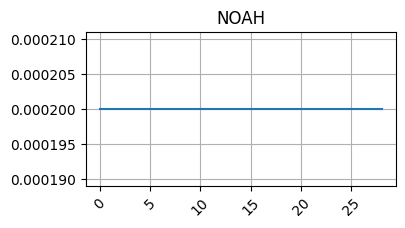

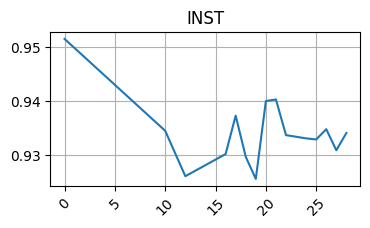

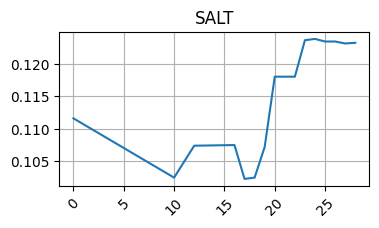

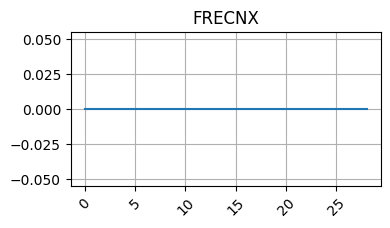

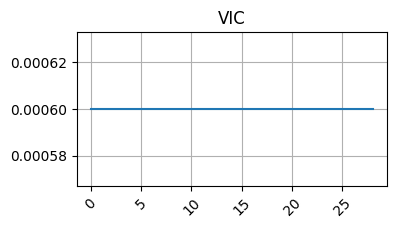

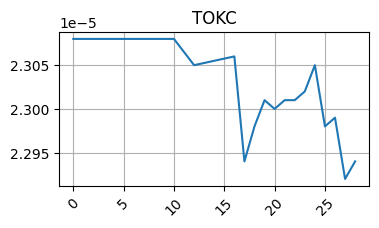

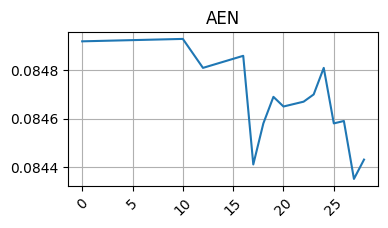

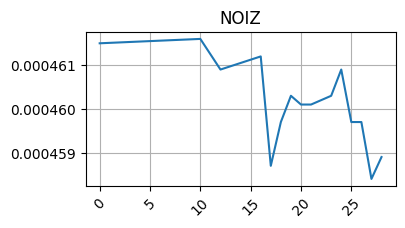

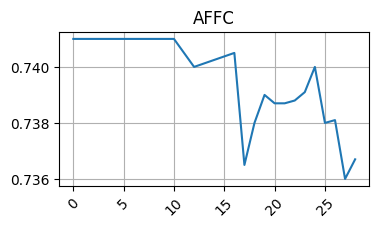

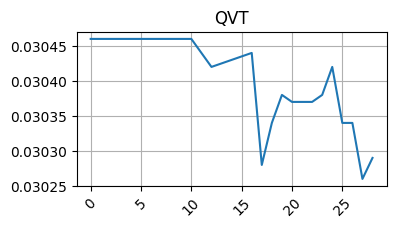

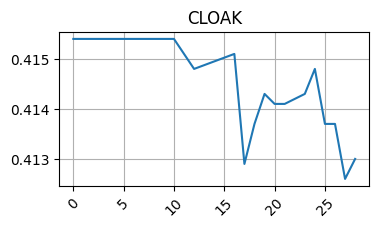

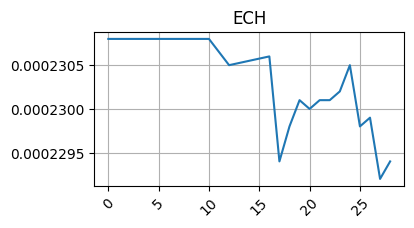

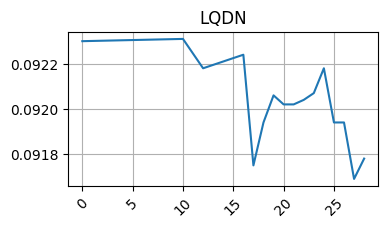

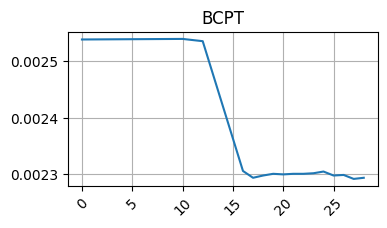

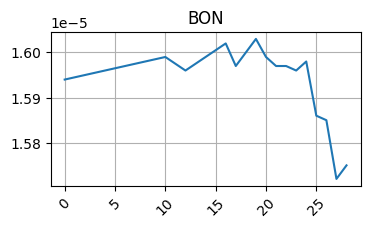

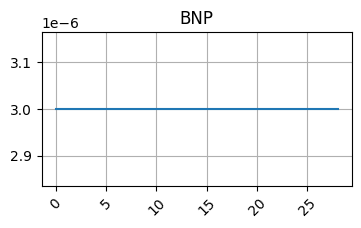

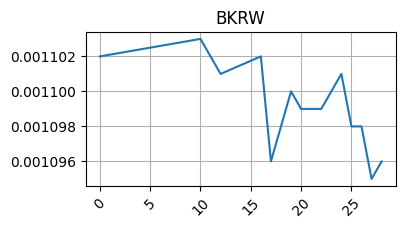

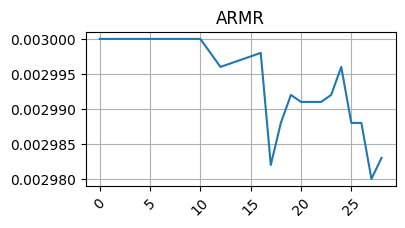

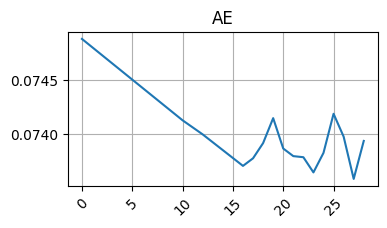

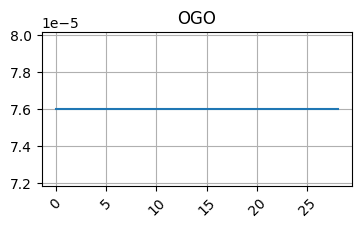

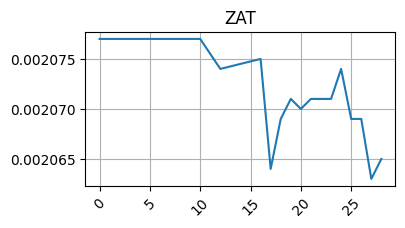

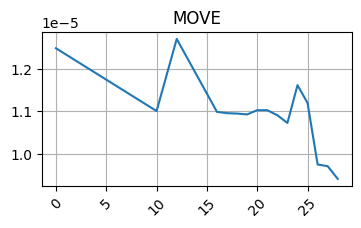

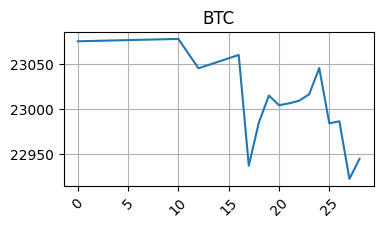

In [57]:
# TimeSeriesKMeans
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")

    df_cluster = data[data.cluster==cluster]
    
    for i in range(len(data.columns)):
        if data.columns[i] != 'cluster':
            plt.figure(figsize=(4,2))
            plt.plot(df_cluster[data.columns[i]])
            plt.xticks(rotation=45)
            plt.title(data.columns[i])
            plt.grid(True)
            plt.show()

## DTW

100%|█████████████████████████████████████████████| 8/8 [00:07<00:00,  1.05it/s]


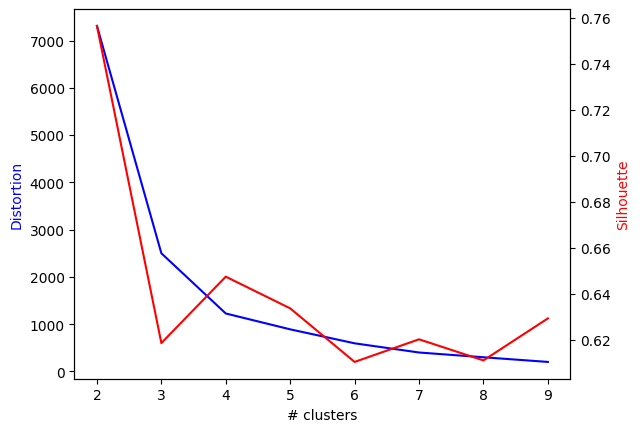

In [49]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(data.iloc[:, :-1], kmeanModel.labels_, metric="dtw"))
    
    # silhouette_score считает насколько чисты класстеры
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
    # Для metric="dtw" берем реализацию из tslearn:
    # https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.silhouette_score.html

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

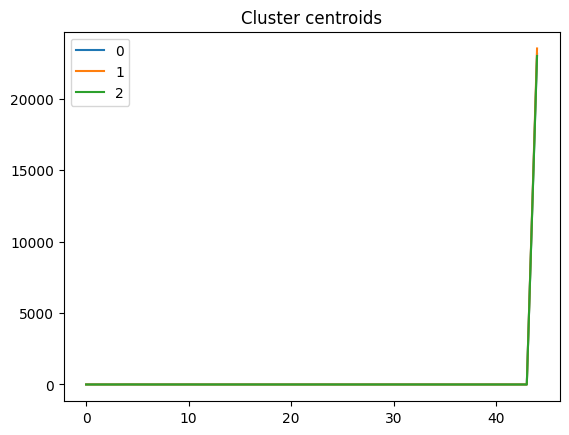

In [58]:
n_clusters = 3
ts_kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", n_jobs=6, max_iter=10,random_state=42)
ts_kmeans_dtw.fit(data.iloc[:, :-1])

for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans_dtw.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [59]:
data['cluster'] = ts_kmeans_dtw.predict(data.iloc[:, :-1])

/Users/alsukurmakaeva/miniconda3/envs/dqual_alpha_nlp/lib/python3.10/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 60 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


                          Cluster number: 0


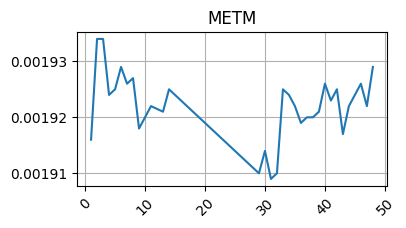

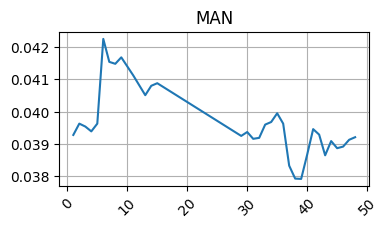

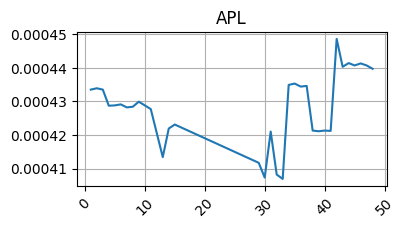

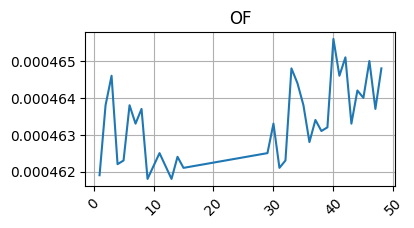

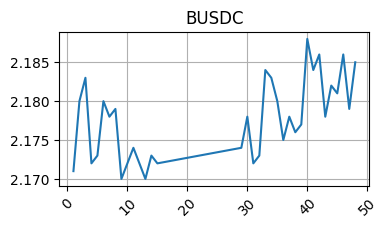

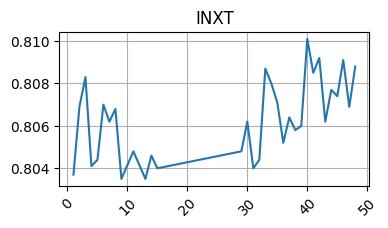

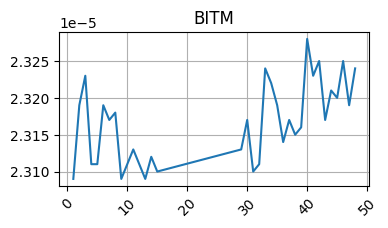

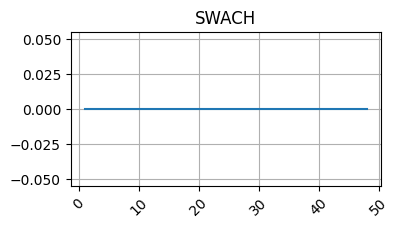

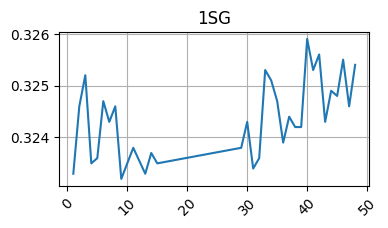

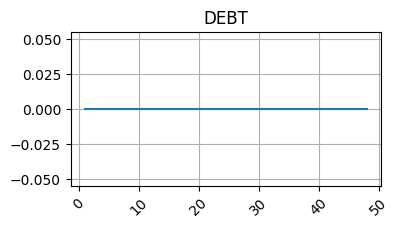

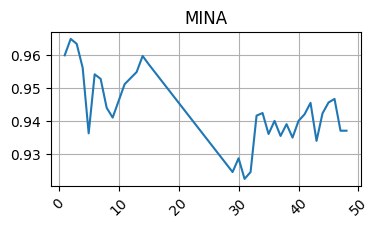

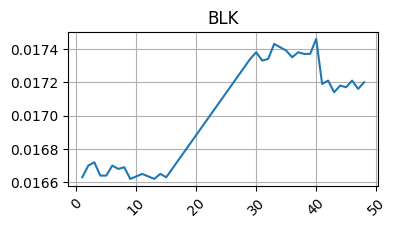

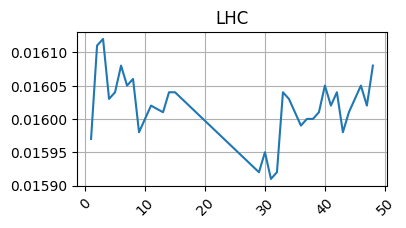

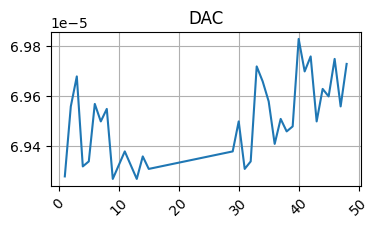

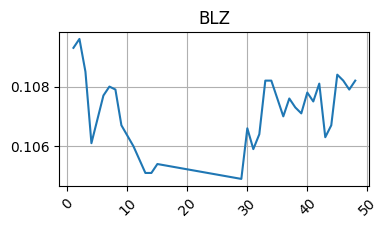

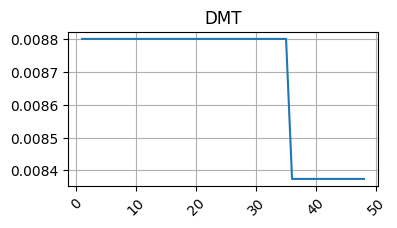

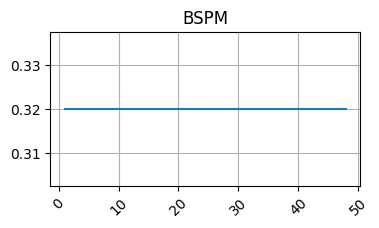

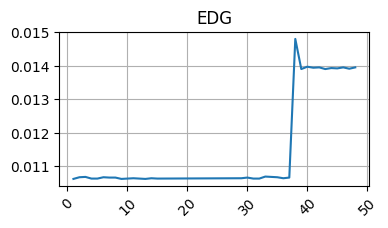

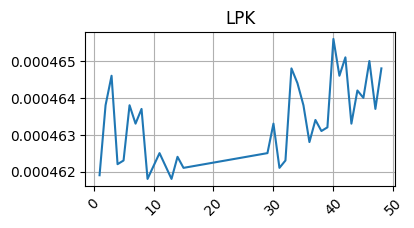

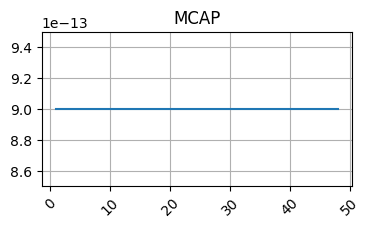

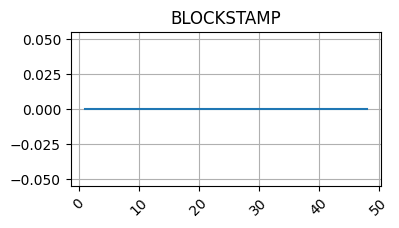

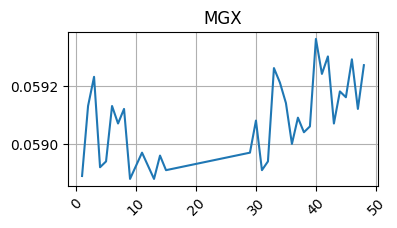

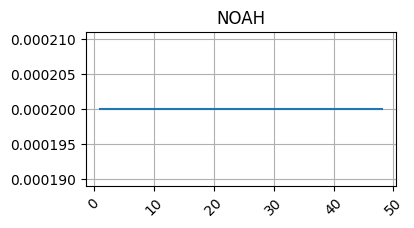

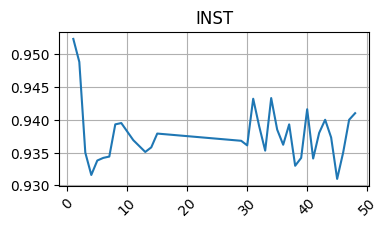

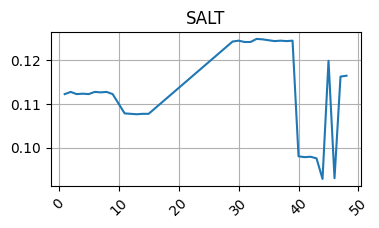

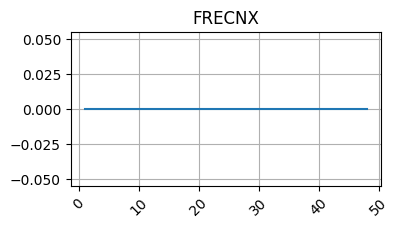

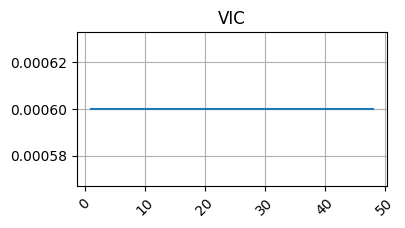

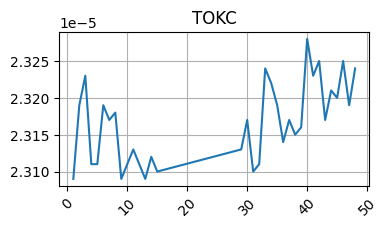

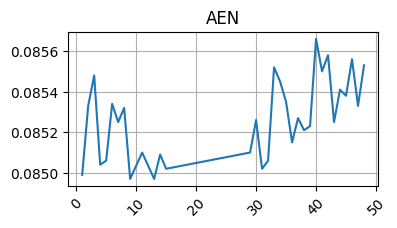

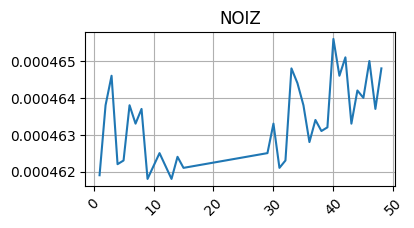

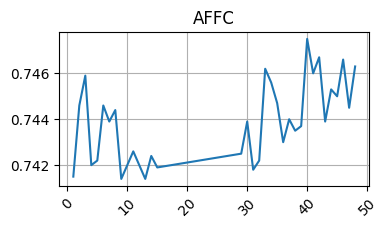

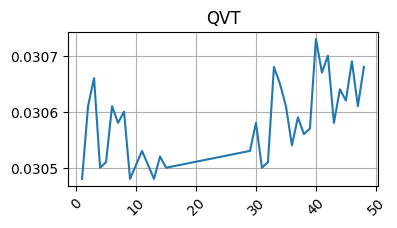

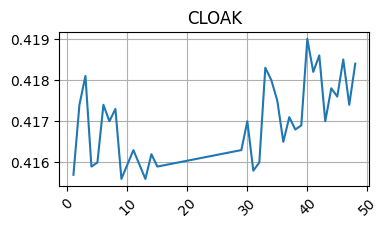

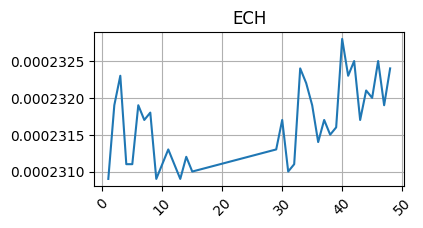

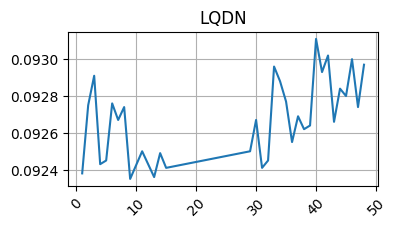

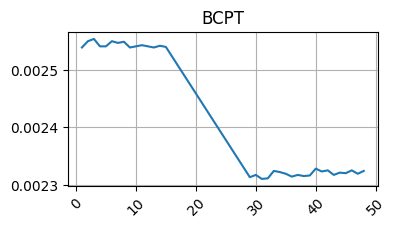

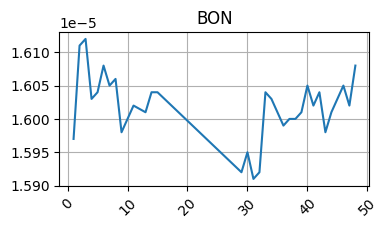

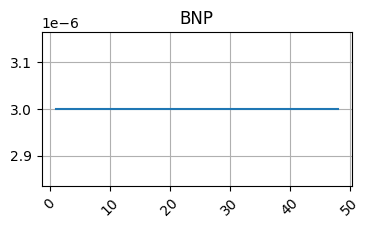

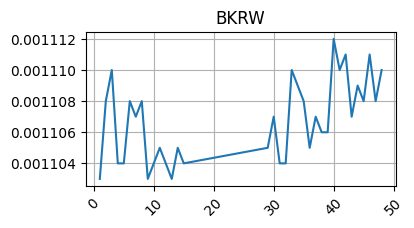

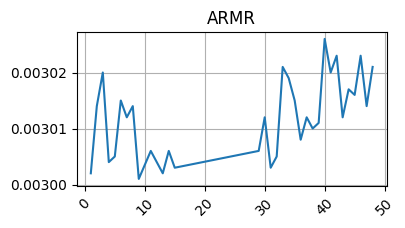

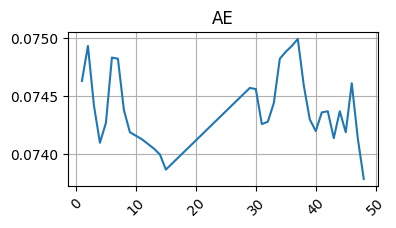

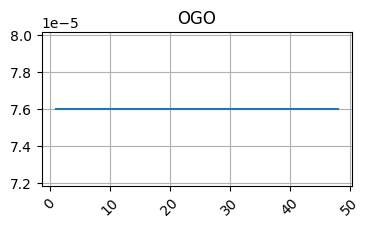

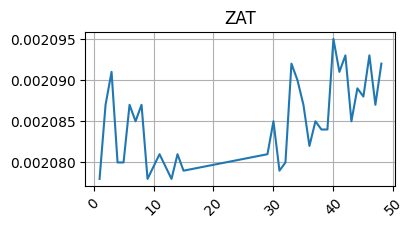

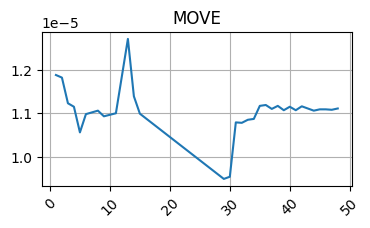

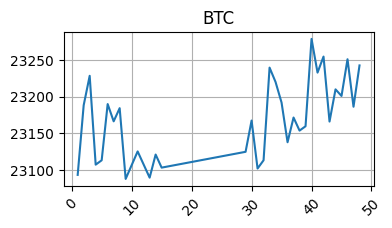

                          Cluster number: 1


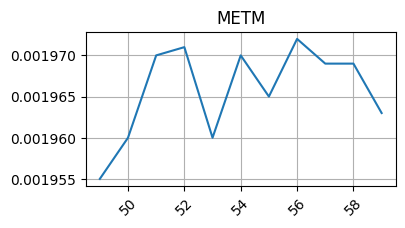

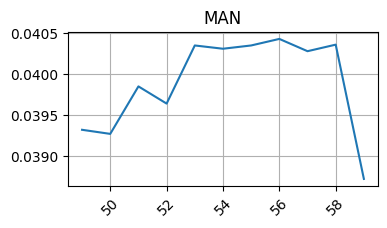

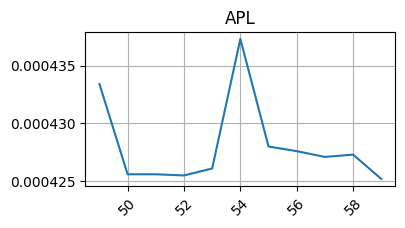

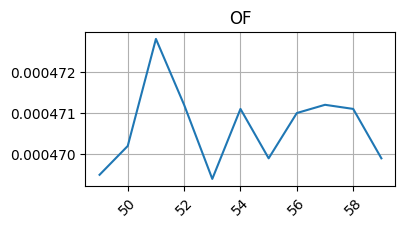

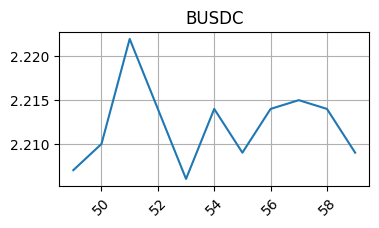

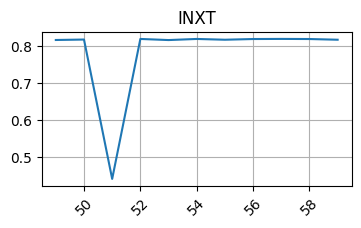

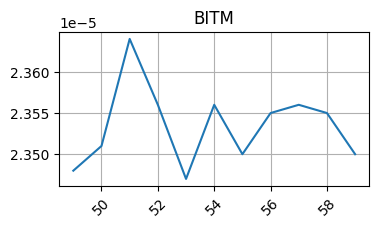

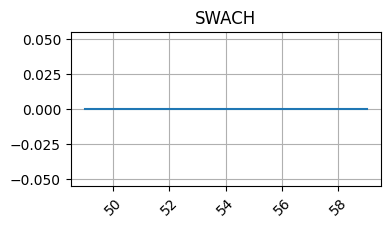

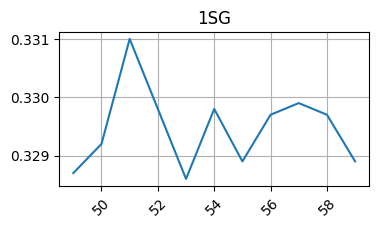

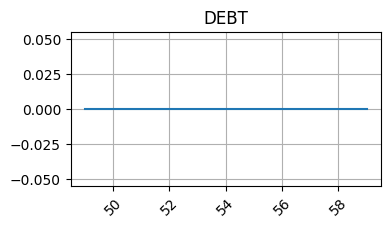

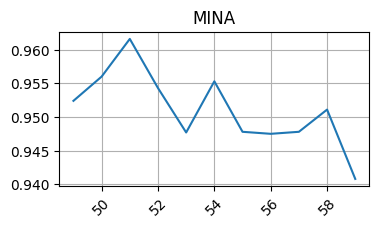

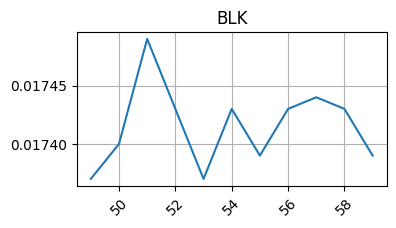

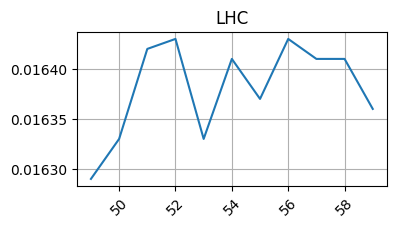

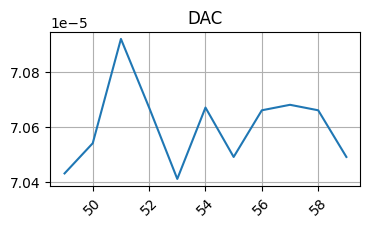

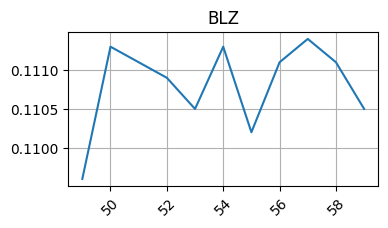

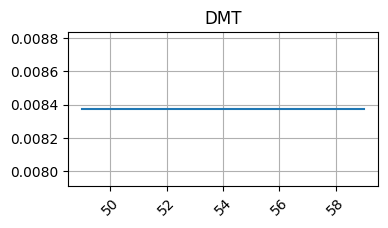

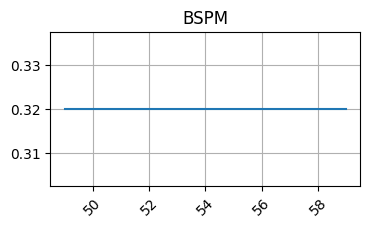

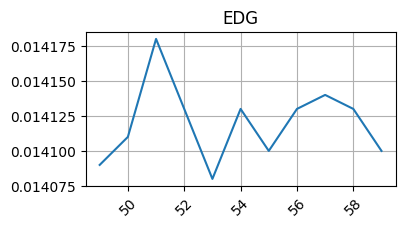

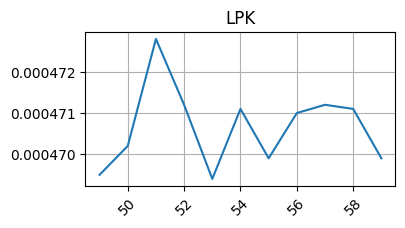

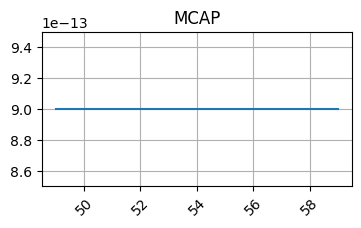

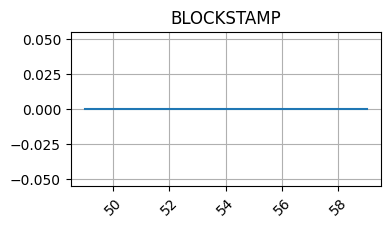

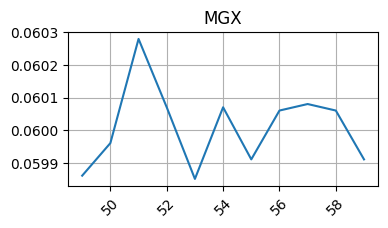

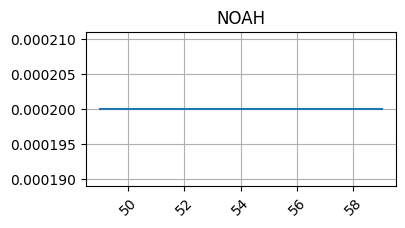

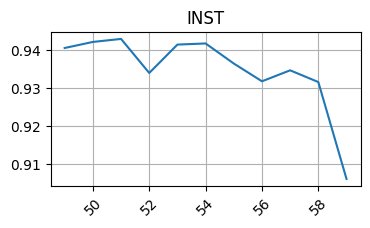

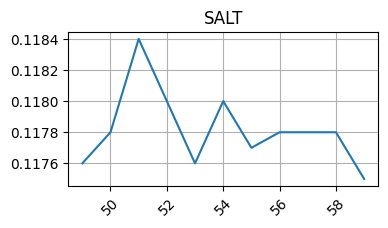

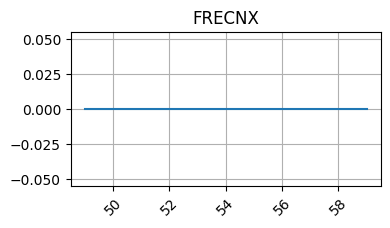

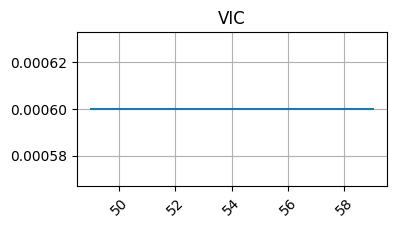

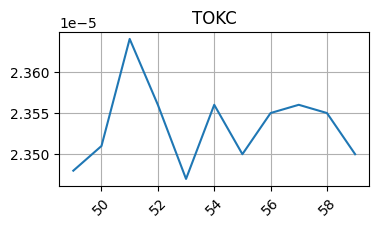

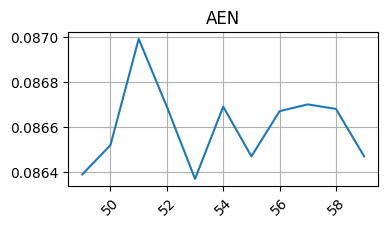

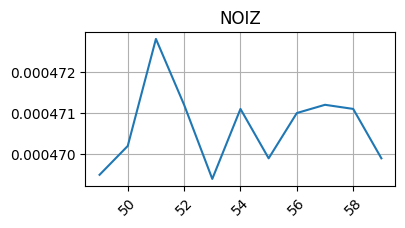

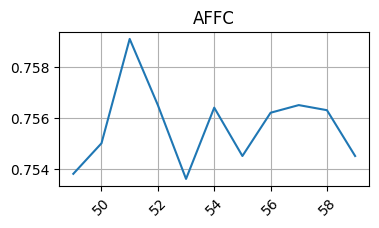

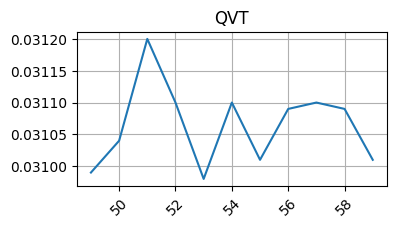

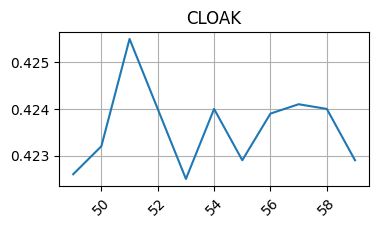

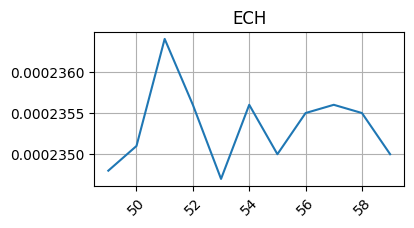

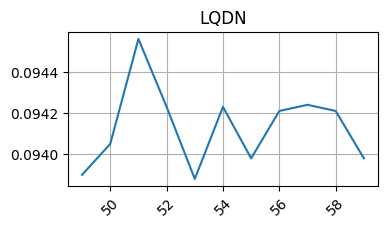

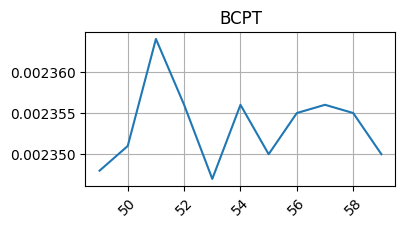

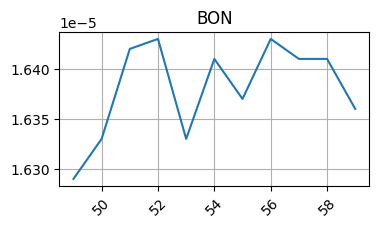

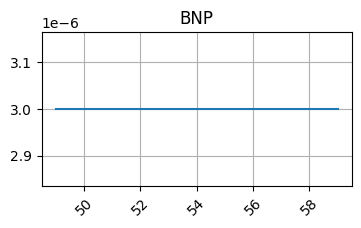

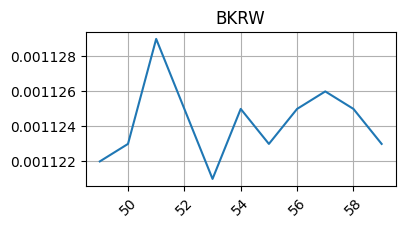

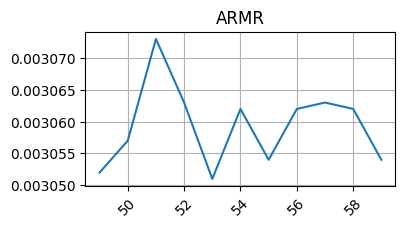

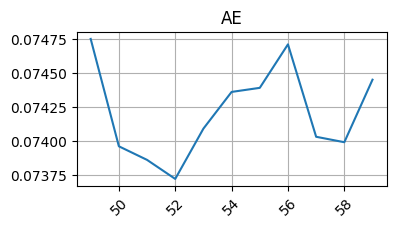

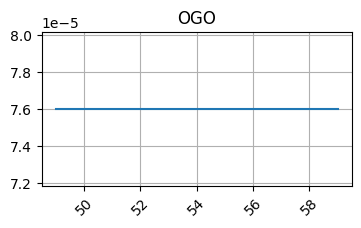

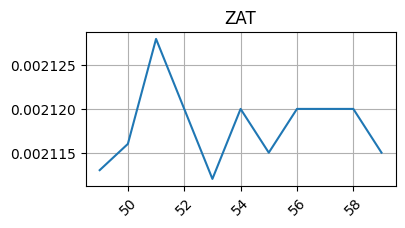

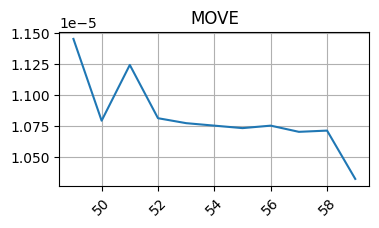

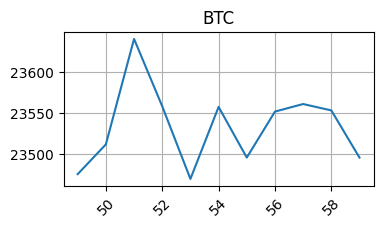

                          Cluster number: 2


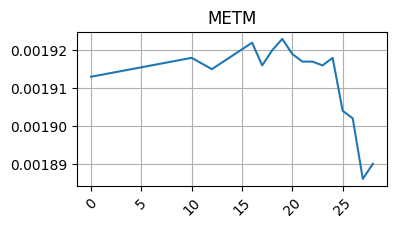

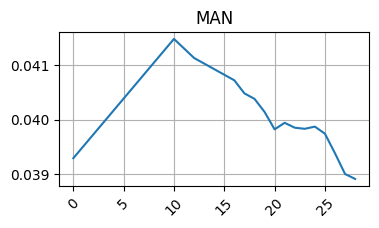

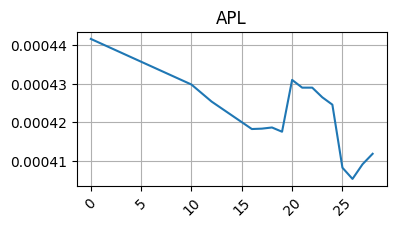

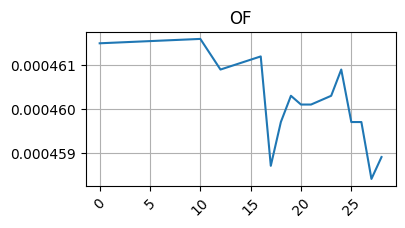

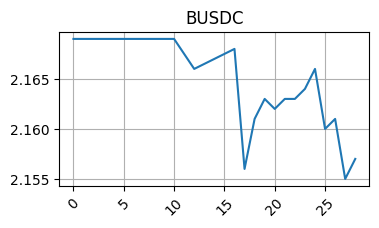

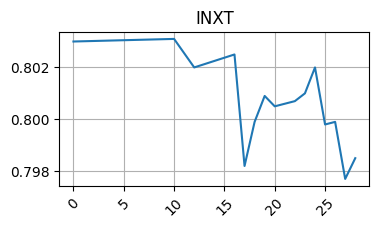

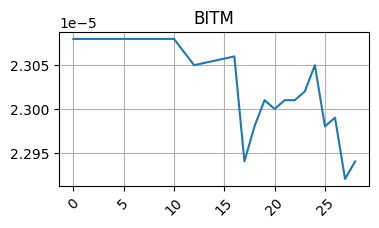

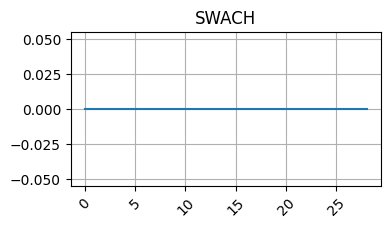

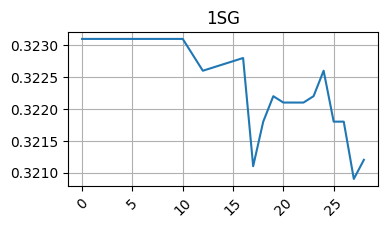

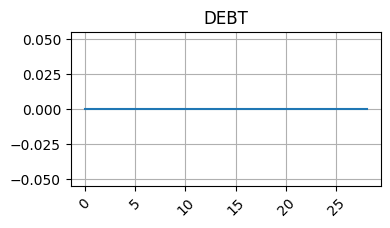

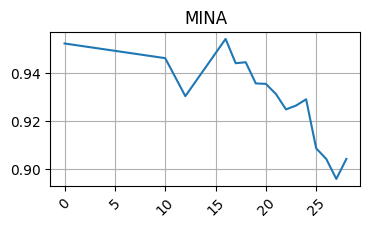

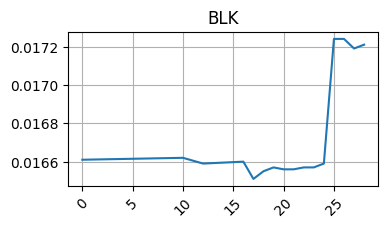

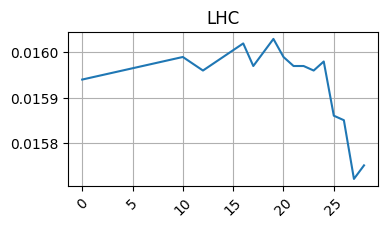

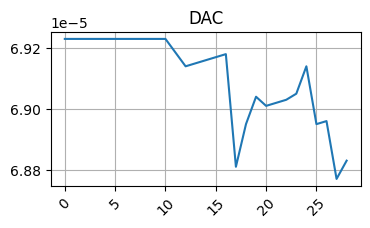

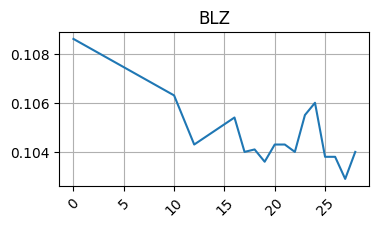

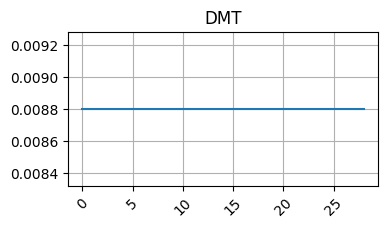

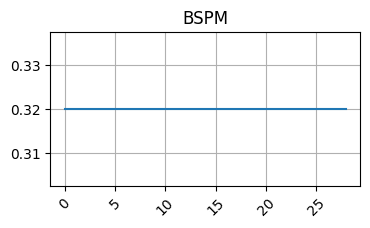

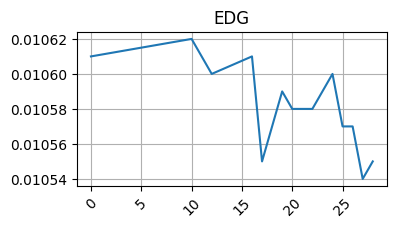

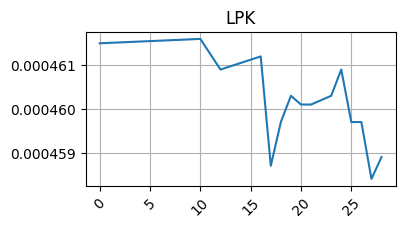

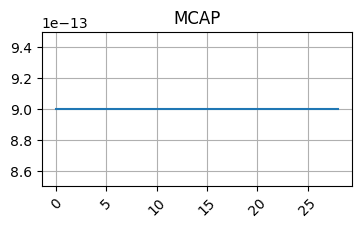

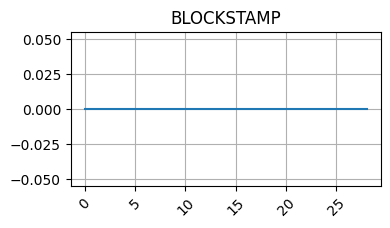

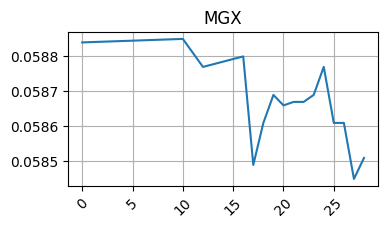

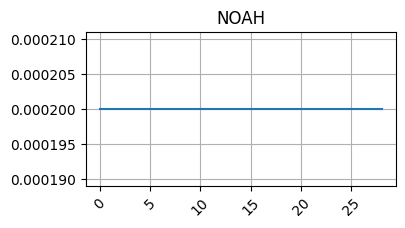

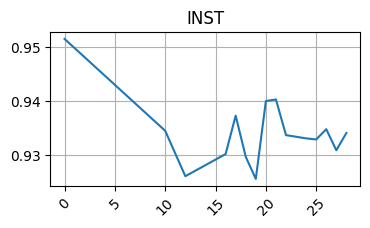

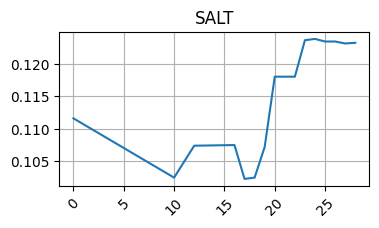

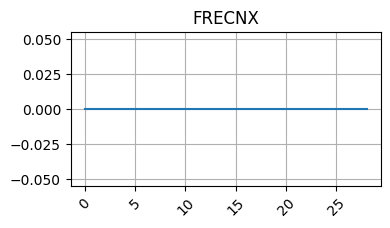

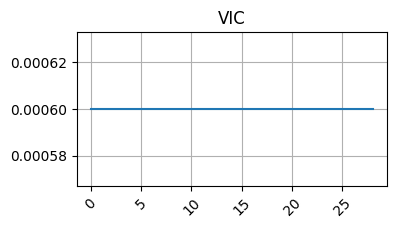

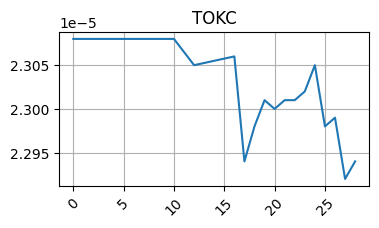

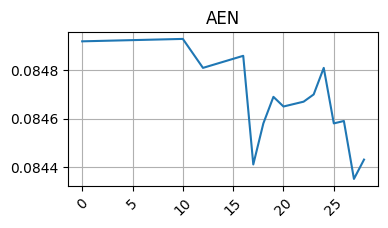

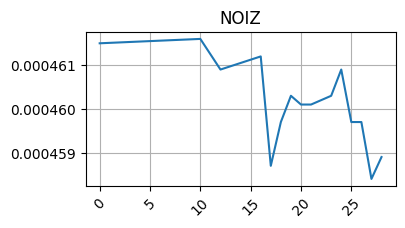

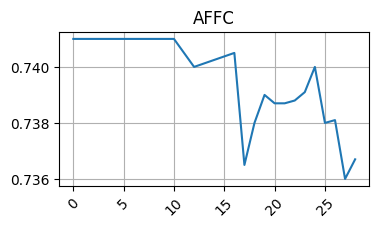

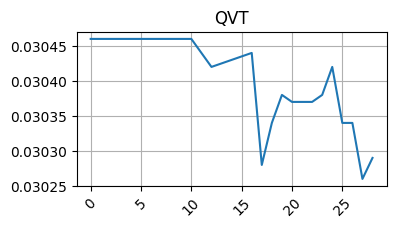

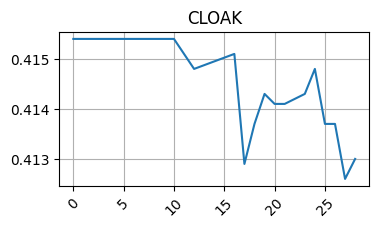

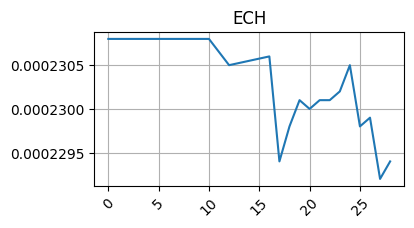

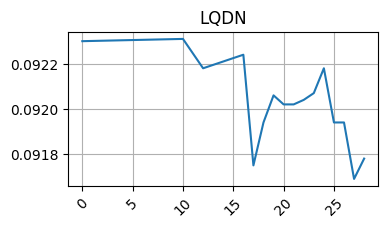

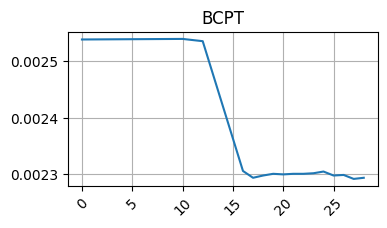

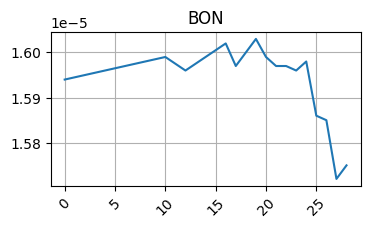

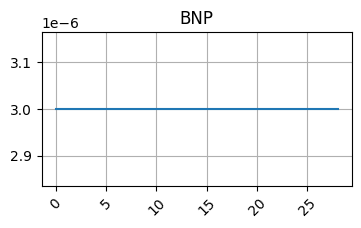

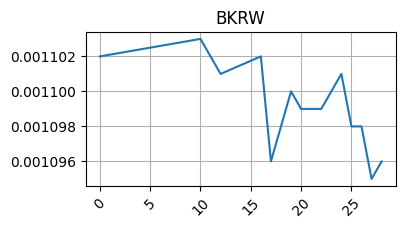

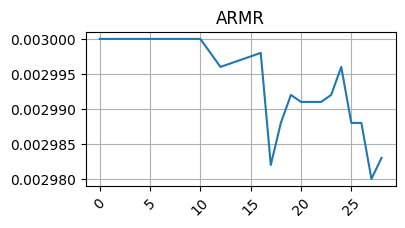

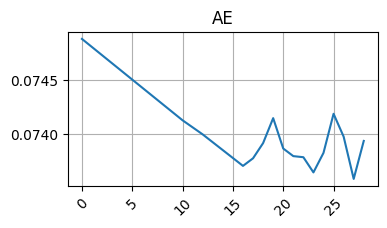

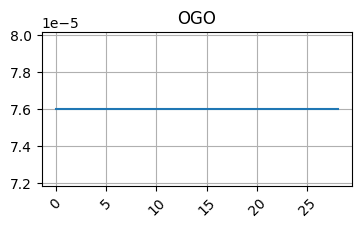

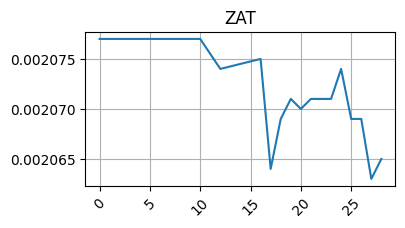

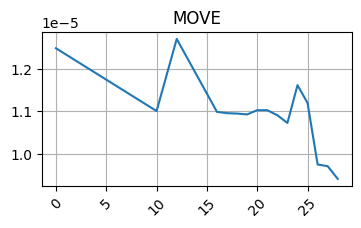

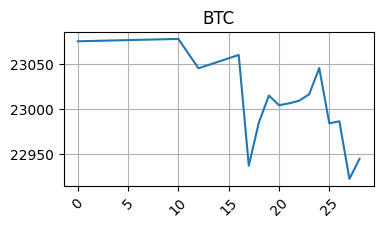

In [60]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")

    df_cluster = data[data.cluster==cluster]
    
    for i in range(len(data.columns)):
        if data.columns[i] != 'cluster':
            plt.figure(figsize=(4,2))
            plt.plot(df_cluster[data.columns[i]])
            plt.xticks(rotation=45)
            plt.title(data.columns[i])
            plt.grid(True)
            plt.show()